<a href="https://colab.research.google.com/github/FullPowerMore02/data-mining/blob/main/eth_singlevariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The order in which the model was created
# 1. BiLSTM
# 2. PCA-STACKED-LSTM
# 3. REGULAR STACKED-LSTM
# 4. SINGLE-LAYERED-LSTM
# 5. GRU
# 6. VOTING REGRESSOR

# 1. Data and Library Loading

In [ ]:
!pip install tensorflow pandas numpy matplotlib shap yfinance scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shap
import yfinance as yf
from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.layers import Bidirectional
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import shap
tf.compat.v1.disable_v2_behavior()

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

from itertools import cycle

# ! pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
#df = yf.download('^GSPC', start='2012-01-01', end='2022-12-31')
df = yf.download('ETH-USD', start='2012-01-01', end='2022-12-31')

#df = pd.read_csv("/Users/parkjs9416/Documents/Dissertation/Dissertation_project_code_and_data/Dataset/sp500_10year_data.csv")
df

[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-09   308.644989   329.451996   307.056000   320.884003   320.884003   
2017-11-10   320.670990   324.717987   294.541992   299.252991   299.252991   
2017-11-11   298.585999   319.453003   298.191986   314.681000   314.681000   
2017-11-12   314.690002   319.153015   298.513000   307.907990   307.907990   
2017-11-13   307.024994   328.415009   307.024994   316.716003   316.716003   
...                 ...          ...          ...          ...          ...   
2022-12-26  1218.920166  1226.974365  1214.335938  1226.974365  1226.974365   
2022-12-27  1226.987061  1230.418091  1205.895630  1212.791626  1212.791626   
2022-12-28  1212.736572  1213.128906  1185.702148  1189.986084  1189.986084   
2022-12-29  1190.010132  1204.141602  1188.360229  1201.595337  1201.595337   
2022-12-30  1201.569580  1202.034668  1187.462524  1199.232788  1199.232788   

                Volume  
Date                    
2017-11-09   893249984  
2017-11-10   885985984  
2017-11-11   842300992  
2017-11-12  1613479936  
2017-11-13  1041889984  
...                ...  
2022-12-26  3282098400  
2022-12-27  4091530737  
2022-12-28  4991669631  
2022-12-29  4132233940  
2022-12-30  4055668253  

[1878 rows x 6 columns]

In [ ]:
#df1 = yf.download('^GSPC', start='2012-01-01', end='2022-12-31')
df1 = yf.download('ETH-USD', start='2012-01-01', end='2022-12-31')
df1

[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-09   308.644989   329.451996   307.056000   320.884003   320.884003   
2017-11-10   320.670990   324.717987   294.541992   299.252991   299.252991   
2017-11-11   298.585999   319.453003   298.191986   314.681000   314.681000   
2017-11-12   314.690002   319.153015   298.513000   307.907990   307.907990   
2017-11-13   307.024994   328.415009   307.024994   316.716003   316.716003   
...                 ...          ...          ...          ...          ...   
2022-12-26  1218.920166  1226.974365  1214.335938  1226.974365  1226.974365   
2022-12-27  1226.987061  1230.418091  1205.895630  1212.791626  1212.791626   
2022-12-28  1212.736572  1213.128906  1185.702148  1189.986084  1189.986084   
2022-12-29  1190.010132  1204.141602  1188.360229  1201.595337  1201.595337   
2022-12-30  1201.569580  1202.034668  1187.462524  1199.232788  1199.232788   

                Volume  
Date                    
2017-11-09   893249984  
2017-11-10   885985984  
2017-11-11   842300992  
2017-11-12  1613479936  
2017-11-13  1041889984  
...                ...  
2022-12-26  3282098400  
2022-12-27  4091530737  
2022-12-28  4991669631  
2022-12-29  4132233940  
2022-12-30  4055668253  

[1878 rows x 6 columns]

In [ ]:
#This df1 has been made to visualise data together
#Making the percentage changes in each day
df1['Pct_change'] = df1['Close'].pct_change()
# data['Pct_change'] = np.log(1+data['Pct_change'])
df1['Pct_change'] = np.log1p(df1['Pct_change'])
# Choose the desired time periods for the moving averages
short_period = 12  # Short-term EMA period
long_period = 26  # Long-term EMA period
signal_period = 9  # Signal line EMA period

# Calculate the short-term EMA
df1['Short EMA'] = df1['Close'].ewm(span=short_period, adjust=False).mean()

# Calculate the long-term EMA
df1['Long EMA'] = df1['Close'].ewm(span=long_period, adjust=False).mean()

# Calculate the MACD line
df1['MACD'] = df1['Short EMA'] - df1['Long EMA']

# Calculate the signal line
df1['Signal Line'] = df1['MACD'].ewm(span=signal_period, adjust=False).mean()

# Calculate the MACD histogra
df1['MACD Histogram'] = df1['MACD'] - df1['Signal Line']
# Choose the desired time period for the moving average and standard deviation
window = 20  # Number of Trading days in a month
num_std = 2
# 2 standard deviations above and below the middle band provides
#a range that encompasses a large portion of typical price movements

# Calculate the logarithmic returns
df1['Log Returns'] = np.log(df1['Close'] / df1['Close'].shift(1))

# Calculate the volatility
df1['Volatility'] = df1['Log Returns'].rolling(window=20).std() * np.sqrt(252)

# Calculate the middle band (simple moving average)
df1['Middle Band'] = df1['Close'].rolling(window=window).mean()

# Calculate the standard deviation of the closing prices
df1['Std Dev'] = df1['Close'].rolling(window=window).std()

# Calculate the upper band and lower band
df1['Upper Band'] = df1['Middle Band'] + (num_std * df1['Std Dev'])
df1['Lower Band'] = df1['Middle Band'] - (num_std * df1['Std Dev'])

#Making Next day's close price column in each date.
df1['Next_day'] = df1['Close'].shift(-1)


# Display the updated DataFrame with the Bollinger Bands columns
df1 = df1.dropna()

# 2. Feature Engineering



In [ ]:
#Making the percentage changes in each day
df['Pct_change'] = df['Close'].pct_change()
# data['Pct_change'] = np.log(1+data['Pct_change'])
df['Pct_change'] = np.log1p(df['Pct_change'])
# Choose the desired time periods for the moving averages
short_period = 12  # Short-term EMA period
long_period = 26  # Long-term EMA period
signal_period = 9  # Signal line EMA period

# Calculate the short-term EMA
df['Short EMA'] = df['Close'].ewm(span=short_period, adjust=False).mean()

# Calculate the long-term EMA
df['Long EMA'] = df['Close'].ewm(span=long_period, adjust=False).mean()

# Calculate the MACD line
df['MACD'] = df['Short EMA'] - df['Long EMA']

# Calculate the signal line
df['Signal Line'] = df['MACD'].ewm(span=signal_period, adjust=False).mean()

# Calculate the MACD histogram
df['MACD Histogram'] = df['MACD'] - df['Signal Line']
# Choose the desired time period for the moving average and standard deviation
window = 20  # Number of Trading days in a month
num_std = 2
# 2 standard deviations above and below the middle band provides
#a range that encompasses a large portion of typical price movements

# Calculate the logarithmic returns
df['Log Returns'] = np.log(df['Close'] / df['Close'].shift(1))

# Calculate the volatility
df['Volatility'] = df['Log Returns'].rolling(window=20).std() * np.sqrt(252)

# Calculate the middle band (simple moving average)
df['Middle Band'] = df['Close'].rolling(window=window).mean()

# Calculate the standard deviation of the closing prices
df['Std Dev'] = df['Close'].rolling(window=window).std()

# Calculate the upper band and lower band
df['Upper Band'] = df['Middle Band'] + (num_std * df['Std Dev'])
df['Lower Band'] = df['Middle Band'] - (num_std * df['Std Dev'])

#Making Next day's close price column in each date.
df['Next_day'] = df['Close'].shift(-1)

# Display the updated DataFrame with the Created features
df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-09   308.644989   329.451996   307.056000   320.884003   320.884003   
2017-11-10   320.670990   324.717987   294.541992   299.252991   299.252991   
2017-11-11   298.585999   319.453003   298.191986   314.681000   314.681000   
2017-11-12   314.690002   319.153015   298.513000   307.907990   307.907990   
2017-11-13   307.024994   328.415009   307.024994   316.716003   316.716003   
...                 ...          ...          ...          ...          ...   
2022-12-26  1218.920166  1226.974365  1214.335938  1226.974365  1226.974365   
2022-12-27  1226.987061  1230.418091  1205.895630  1212.791626  1212.791626   
2022-12-28  1212.736572  1213.128906  1185.702148  1189.986084  1189.986084   
2022-12-29  1190.010132  1204.141602  1188.360229  1201.595337  1201.595337   
2022-12-30  1201.569580  1202.034668  1187.462524  1199.232788  1199.232788   

                Volume  Pct_change    Short EMA     Long EMA       MACD  \
Date                                                                      
2017-11-09   893249984         NaN   320.884003   320.884003   0.000000   
2017-11-10   885985984   -0.069790   317.556155   319.281706  -1.725551   
2017-11-11   842300992    0.050270   317.113823   318.940912  -1.827089   
2017-11-12  1613479936   -0.021758   315.697541   318.123659  -2.426118   
2017-11-13  1041889984    0.028204   315.854228   318.019388  -2.165161   
...                ...         ...          ...          ...        ...   
2022-12-26  3282098400    0.006552  1222.485810  1234.654119 -12.168309   
2022-12-27  4091530737   -0.011626  1220.994397  1233.034675 -12.040278   
2022-12-28  4991669631   -0.018983  1216.223888  1229.845890 -13.622003   
2022-12-29  4132233940    0.009709  1213.973341  1227.753257 -13.779915   
2022-12-30  4055668253   -0.001968  1211.705564  1225.640629 -13.935066   

            Signal Line  MACD Histogram  Log Returns  Volatility  Middle Band  \
Date                                                                            
2017-11-09     0.000000        0.000000          NaN         NaN          NaN   
2017-11-10    -0.345110       -1.380441    -0.069790         NaN          NaN   
2017-11-11    -0.641506       -1.185583     0.050270         NaN          NaN   
2017-11-12    -0.998428       -1.427690    -0.021758         NaN          NaN   
2017-11-13    -1.231775       -0.933386     0.028204         NaN          NaN   
...                 ...             ...          ...         ...          ...   
2022-12-26   -13.313787        1.145479     0.006552    0.430237  1236.220313   
2022-12-27   -13.059085        1.018808    -0.011626    0.417804  1235.238019   
2022-12-28   -13.171669       -0.450334    -0.018983    0.394964  1230.681506   
2022-12-29   -13.293318       -0.486597     0.009709    0.396009  1227.547034   
2022-12-30   -13.421668       -0.513398    -0.001968    0.395707  1224.189465   

              Std Dev   Upper Band   Lower Band     Next_day  
Date                                                          
2017-11-09        NaN          NaN          NaN   299.252991  
2017-11-10        NaN          NaN          NaN   314.681000  
2017-11-11        NaN          NaN          NaN   307.907990  
2017-11-12        NaN          NaN          NaN   316.716003  
2017-11-13        NaN          NaN          NaN   337.631012  
...               ...          ...          ...          ...  
2022-12-26  43.327745  1322.875803  1149.564822  1212.791626  
2022-12-27  43.639596  1322.517211  1147.958827  1189.986084  
2022-12-28  43.353841  1317.389188  1143.973825  1201.595337  
2022-12-29  43.061694  1313.670422  1141.423645  1199.232788  
2022-12-30  42.488258  1309.165982  1139.212949          NaN  

[1878 rows x 19 columns]

In [ ]:
df.isnull().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Pct_change         1
Short EMA          0
Long EMA           0
MACD               0
Signal Line        0
MACD Histogram     0
Log Returns        1
Volatility        20
Middle Band       19
Std Dev           19
Upper Band        19
Lower Band        19
Next_day           1
dtype: int64

In [ ]:
df = df.dropna()
df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-29   473.281006   522.307007   425.071014   427.523010   427.523010   
2017-11-30   431.214996   465.497009   401.243011   447.114014   447.114014   
2017-12-01   445.209015   472.609009   428.312012   466.540009   466.540009   
2017-12-02   466.851013   476.239014   456.653015   463.449005   463.449005   
2017-12-03   463.704987   482.813995   451.851990   465.852997   465.852997   
...                 ...          ...          ...          ...          ...   
2022-12-25  1221.171509  1223.517822  1203.719604  1218.962036  1218.962036   
2022-12-26  1218.920166  1226.974365  1214.335938  1226.974365  1226.974365   
2022-12-27  1226.987061  1230.418091  1205.895630  1212.791626  1212.791626   
2022-12-28  1212.736572  1213.128906  1185.702148  1189.986084  1189.986084   
2022-12-29  1190.010132  1204.141602  1188.360229  1201.595337  1201.595337   

                Volume  Pct_change    Short EMA     Long EMA       MACD  \
Date                                                                      
2017-11-29  2675940096   -0.100880   423.561942   386.376159  37.185784   
2017-11-30  1903040000    0.044806   427.185338   390.875259  36.310079   
2017-12-01  1247879936    0.042530   433.239903   396.480055  36.759847   
2017-12-02   943649984   -0.006647   437.887457   401.440718  36.446739   
2017-12-03   990556992    0.005174   442.189848   406.211998  35.977849   
...                ...         ...          ...          ...        ...   
2022-12-25  3942720070   -0.001792  1221.669709  1235.268499 -13.598790   
2022-12-26  3282098400    0.006552  1222.485810  1234.654119 -12.168309   
2022-12-27  4091530737   -0.011626  1220.994397  1233.034675 -12.040278   
2022-12-28  4991669631   -0.018983  1216.223888  1229.845890 -13.622003   
2022-12-29  4132233940    0.009709  1213.973341  1227.753257 -13.779915   

            Signal Line  MACD Histogram  Log Returns  Volatility  Middle Band  \
Date                                                                            
2017-11-29    28.226306        8.959477    -0.100880    0.846353   379.305402   
2017-11-30    29.843061        6.467018     0.044806    0.791214   386.698453   
2017-12-01    31.226418        5.533429     0.042530    0.787766   394.291403   
2017-12-02    32.270482        4.176256    -0.006647    0.778998   402.068454   
2017-12-03    33.011956        2.965894     0.005174    0.780244   409.525304   
...                 ...             ...          ...         ...          ...   
2022-12-25   -13.600157        0.001367    -0.001792    0.431109  1238.454285   
2022-12-26   -13.313787        1.145479     0.006552    0.430237  1236.220313   
2022-12-27   -13.059085        1.018808    -0.011626    0.417804  1235.238019   
2022-12-28   -13.171669       -0.450334    -0.018983    0.394964  1230.681506   
2022-12-29   -13.293318       -0.486597     0.009709    0.396009  1227.547034   

              Std Dev   Upper Band   Lower Band     Next_day  
Date                                                          
2017-11-29  63.888660   507.082721   251.528082   447.114014  
2017-11-30  62.681287   512.061027   261.335879   466.540009  
2017-12-01  62.696023   519.683448   268.899358   463.449005  
2017-12-02  61.041859   524.152173   279.984735   465.852997  
2017-12-03  59.146294   527.817892   291.232715   470.204010  
...               ...          ...          ...          ...  
2022-12-25  43.972964  1326.400212  1150.508357  1226.974365  
2022-12-26  43.327745  1322.875803  1149.564822  1212.791626  
2022-12-27  43.639596  1322.517211  1147.958827  1189.986084  
2022-12-28  43.353841  1317.389188  1143.973825  1201.595337  
2022-12-29  43.061694  1313.670422  1141.423645  1199.232788  

[1857 rows x 19 columns]

In [ ]:
df.isnull().sum()

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Pct_change        0
Short EMA         0
Long EMA          0
MACD              0
Signal Line       0
MACD Histogram    0
Log Returns       0
Volatility        0
Middle Band       0
Std Dev           0
Upper Band        0
Lower Band        0
Next_day          0
dtype: int64

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Pct_change',
       'Short EMA', 'Long EMA', 'MACD', 'Signal Line', 'MACD Histogram',
       'Log Returns', 'Volatility', 'Middle Band', 'Std Dev', 'Upper Band',
       'Lower Band', 'Next_day'],
      dtype='object')

## 2.1 Checking the Correlation of each variables

In [ ]:
import seaborn as sns

<Axes: >

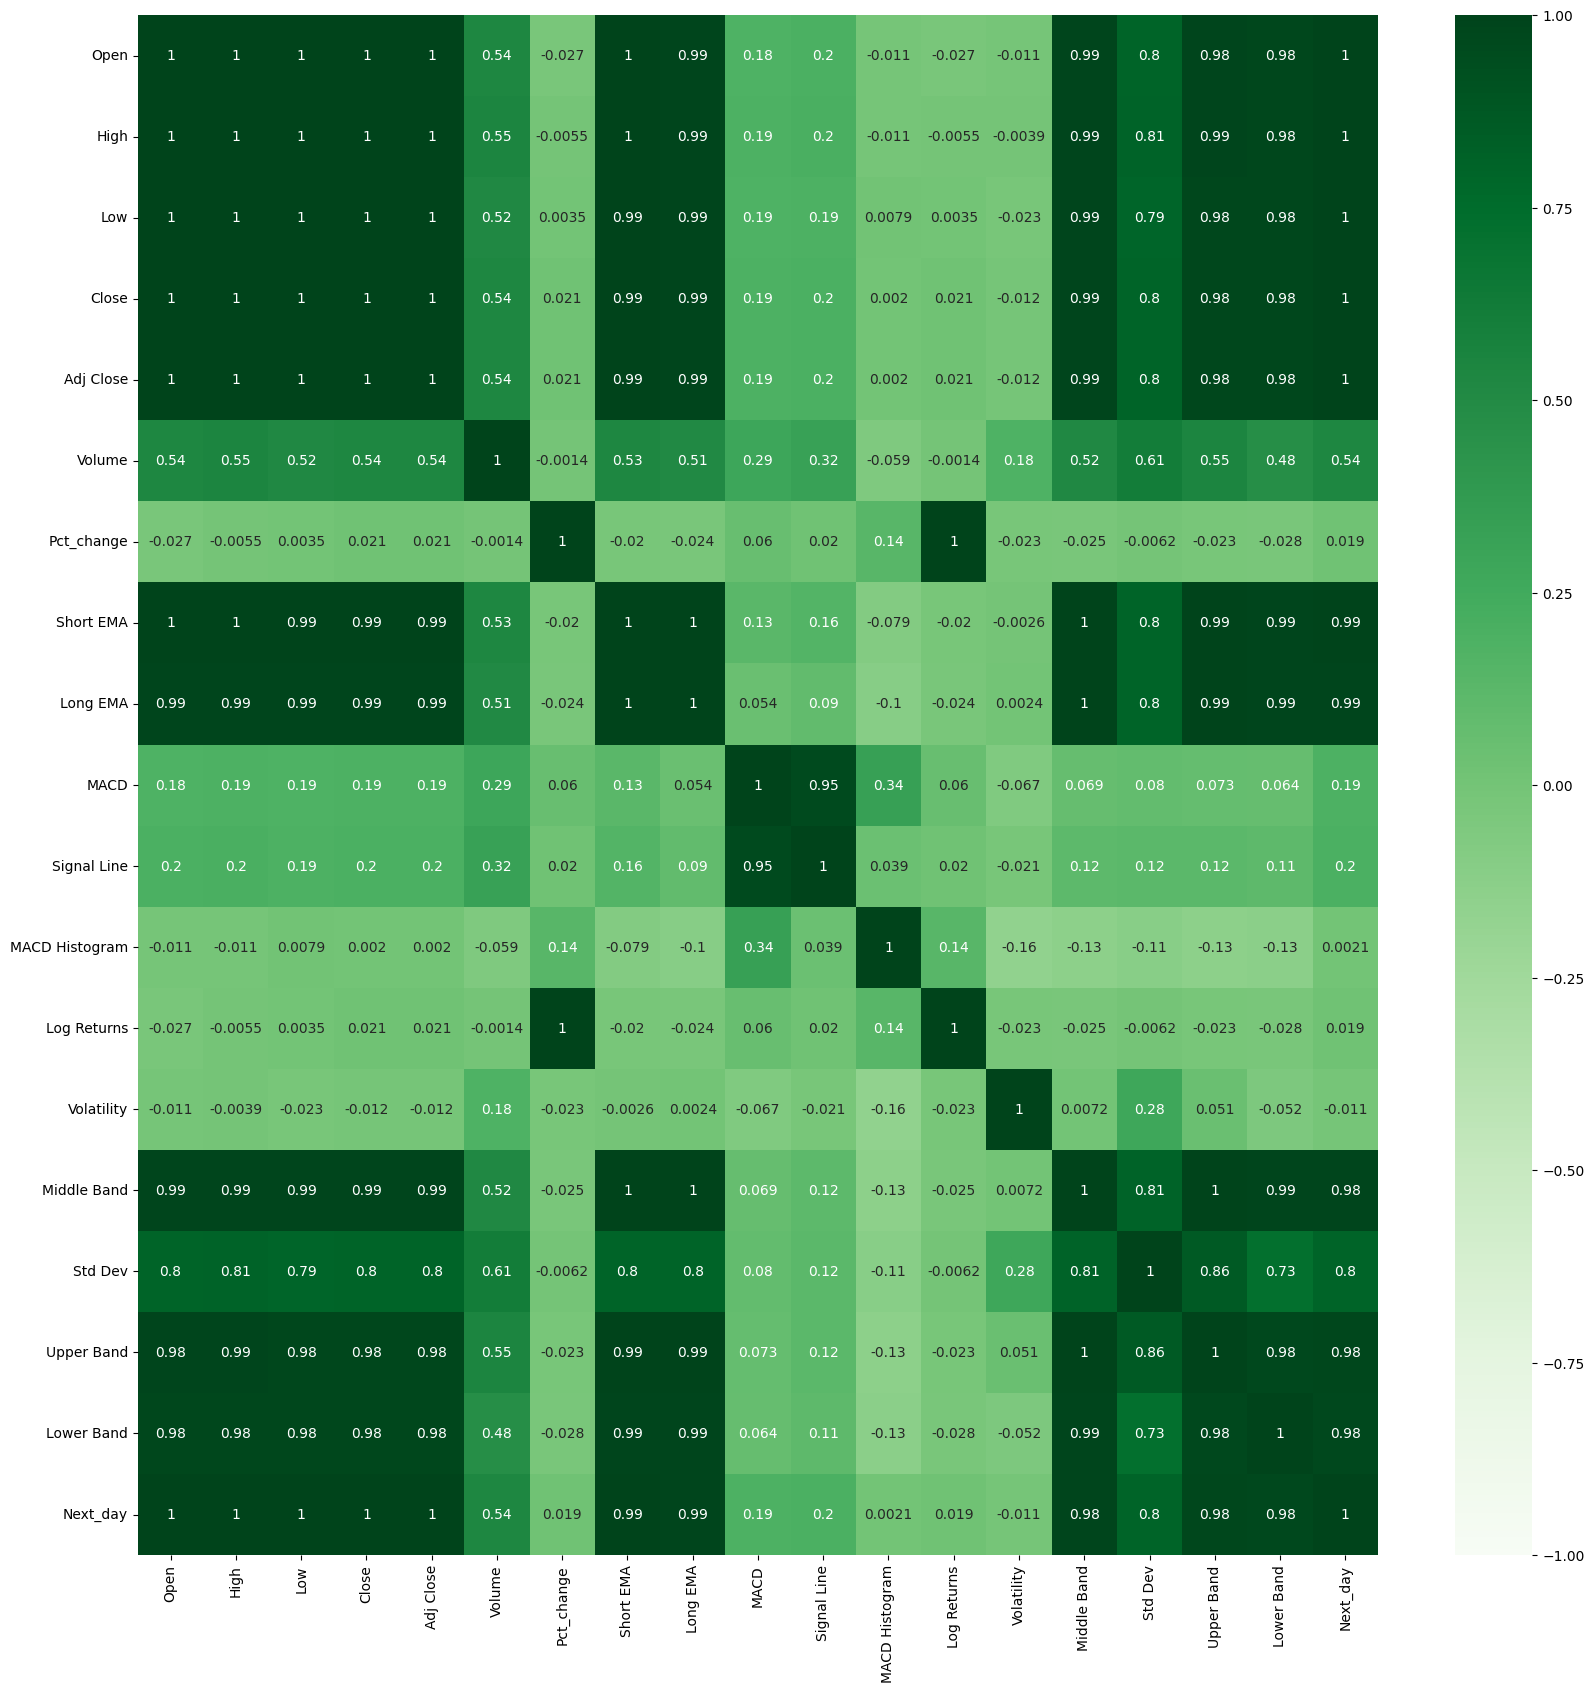

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
sns.heatmap(df.corr(),
           annot = True, #Vaue on the heatmap
           cmap = 'Greens', #Colour
           vmin = -1, vmax=1 , #Boundary of Colour chart -1 ~ +1
          )

In [ ]:
df1.corr()

Open      High       Low     Close  Adj Close    Volume  \
Open            1.000000  0.999203  0.998244  0.997754   0.997754  0.539013   
High            0.999203  1.000000  0.998086  0.998862   0.998862  0.548548   
Low             0.998244  0.998086  1.000000  0.998905   0.998905  0.520741   
Close           0.997754  0.998862  0.998905  1.000000   1.000000  0.536242   
Adj Close       0.997754  0.998862  0.998905  1.000000   1.000000  0.536242   
Volume          0.539013  0.548548  0.520741  0.536242   0.536242  1.000000   
Pct_change     -0.026598 -0.005540  0.003487  0.020556   0.020556 -0.001424   
Short EMA       0.996092  0.996008  0.994172  0.994632   0.994632  0.532180   
Long EMA        0.989006  0.988579  0.986999  0.987175   0.987175  0.514240   
MACD            0.184847  0.189419  0.185834  0.189664   0.189664  0.287564   
Signal Line     0.199496  0.204496  0.194607  0.200529   0.200529  0.323564   
MACD Histogram -0.010900 -0.011377  0.007874  0.001993   0.001993 -0.058744   
Log Returns    -0.026598 -0.005540  0.003487  0.020556   0.020556 -0.001424   
Volatility     -0.011144 -0.003940 -0.023155 -0.011711  -0.011711  0.182792   
Middle Band     0.988646  0.988454  0.986172  0.986733   0.986733  0.521341   
Std Dev         0.799438  0.806005  0.789671  0.799617   0.799617  0.614578   
Upper Band      0.984435  0.985324  0.980726  0.982808   0.982808  0.550100   
Lower Band      0.980239  0.978596  0.979466  0.977970   0.977970  0.475183   
Next_day        0.995835  0.996815  0.996593  0.997780   0.997780  0.538342   

                Pct_change  Short EMA  Long EMA      MACD  Signal Line  \
Open             -0.026598   0.996092  0.989006  0.184847     0.199496   
High             -0.005540   0.996008  0.988579  0.189419     0.204496   
Low               0.003487   0.994172  0.986999  0.185834     0.194607   
Close             0.020556   0.994632  0.987175  0.189664     0.200529   
Adj Close         0.020556   0.994632  0.987175  0.189664     0.200529   
Volume           -0.001424   0.532180  0.514240  0.287564     0.323564   
Pct_change        1.000000  -0.019802 -0.024469  0.060456     0.020212   
Short EMA        -0.019802   1.000000  0.997232  0.127603     0.160389   
Long EMA         -0.024469   0.997232  1.000000  0.053503     0.089915   
MACD              0.060456   0.127603  0.053503  1.000000     0.954607   
Signal Line       0.020212   0.160389  0.089915  0.954607     1.000000   
MACD Histogram    0.138876  -0.079241 -0.104913  0.335255     0.039408   
Log Returns       1.000000  -0.019802 -0.024469  0.060456     0.020212   
Volatility       -0.022575  -0.002613  0.002365 -0.066643    -0.021252   
Middle Band      -0.024874   0.997480  0.999057  0.069412     0.115692   
Std Dev          -0.006243   0.804520  0.804013  0.079710     0.119515   
Upper Band       -0.022541   0.992901  0.994185  0.072901     0.119367   
Lower Band       -0.027660   0.989444  0.991393  0.063724     0.109095   
Next_day          0.018504   0.992495  0.985025  0.189637     0.200472   

                MACD Histogram  Log Returns  Volatility  Middle Band  \
Open                 -0.010900    -0.026598   -0.011144     0.988646   
High                 -0.011377    -0.005540   -0.003940     0.988454   
Low                   0.007874     0.003487   -0.023155     0.986172   
Close                 0.001993     0.020556   -0.011711     0.986733   
Adj Close             0.001993     0.020556   -0.011711     0.986733   
Volume               -0.058744    -0.001424    0.182792     0.521341   
Pct_change            0.138876     1.000000   -0.022575    -0.024874   
Short EMA            -0.079241    -0.019802   -0.002613     0.997480   
Long EMA             -0.104913    -0.024469    0.002365     0.999057   
MACD                  0.335255     0.060456   -0.066643     0.069412   
Signal Line           0.039408     0.020212   -0.021252     0.115692   
MACD Histogram        1.000000     0.138876   -0.156342    -0.133075   
Log Returns           

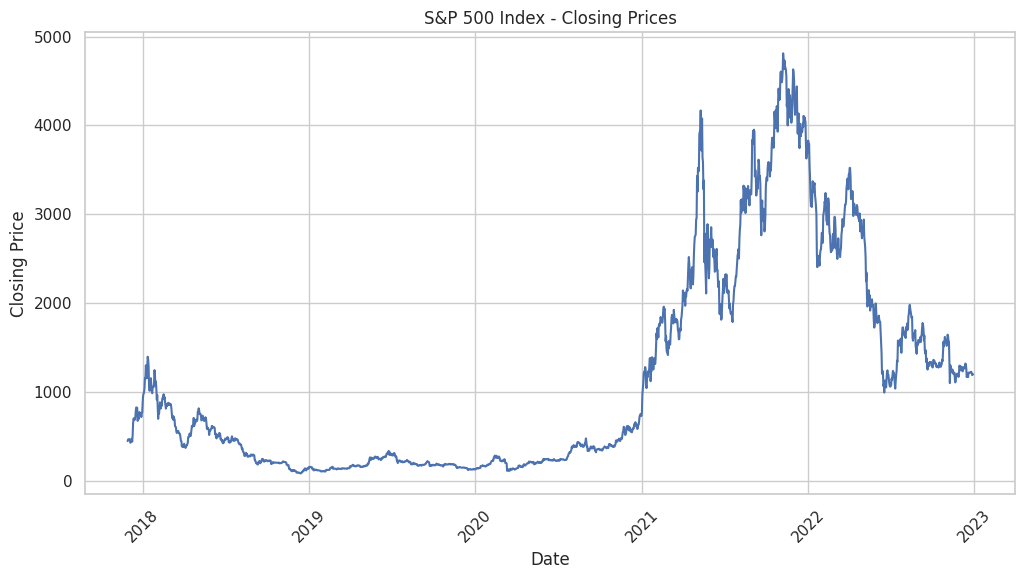

In [ ]:
# Sort the DataFrame by date in ascending order
data = df.sort_values('Next_day')

# Set the Seaborn style
sns.set(style='whitegrid')

# Create the line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
sns.lineplot(data=data, x='Date', y='Next_day')

# Set the plot title and axis labels
plt.title('S&P 500 Index - Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

<Axes: xlabel='Date'>

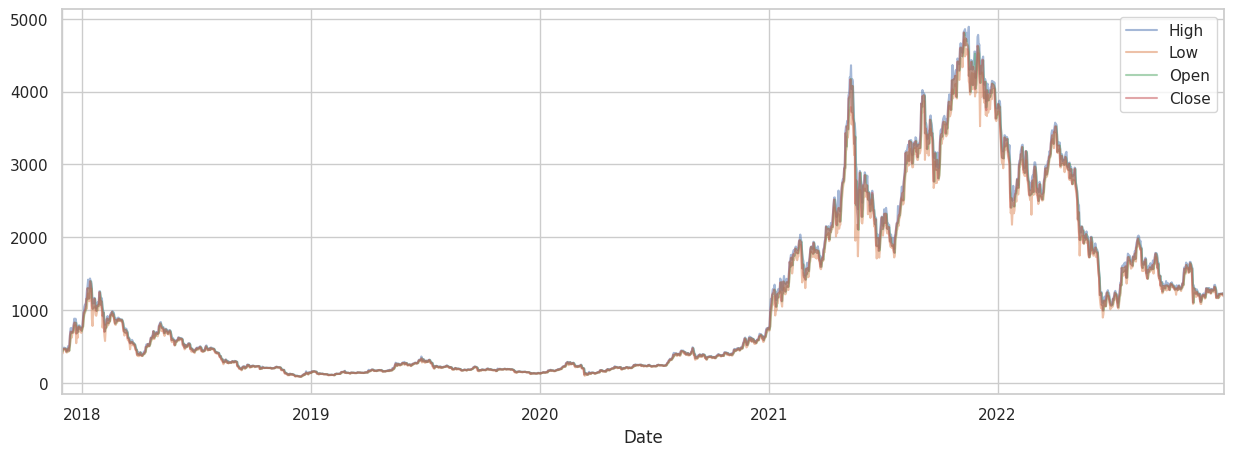

In [ ]:
df[['High','Low','Open','Close']].plot(figsize = (15, 5), alpha = 0.5)

<Axes: xlabel='Date'>

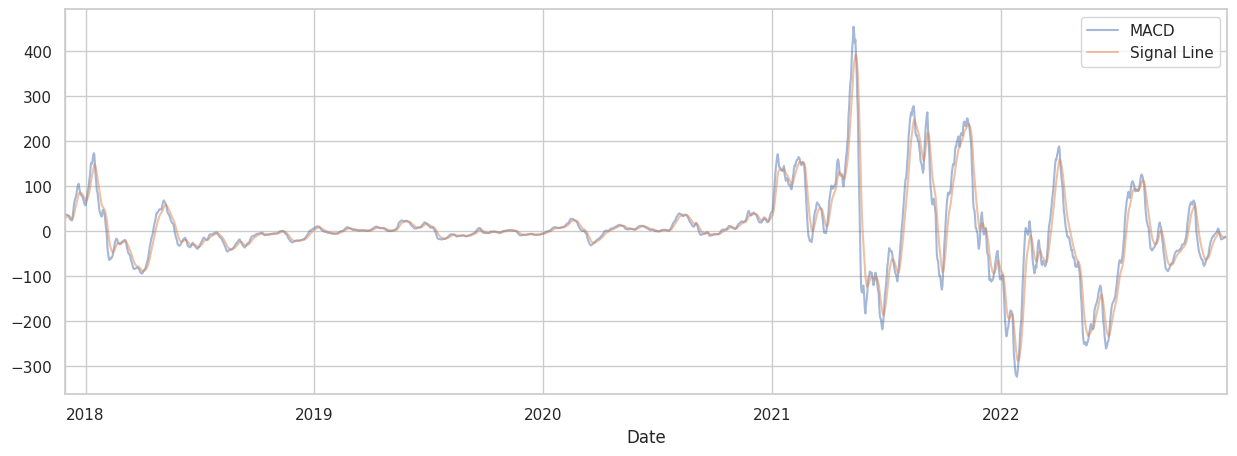

In [ ]:
df[['MACD','Signal Line']].plot(figsize = (15, 5), alpha = 0.5)

Text(0.5, 1.0, 'Close Price trend with BollingerBand and the EMA')

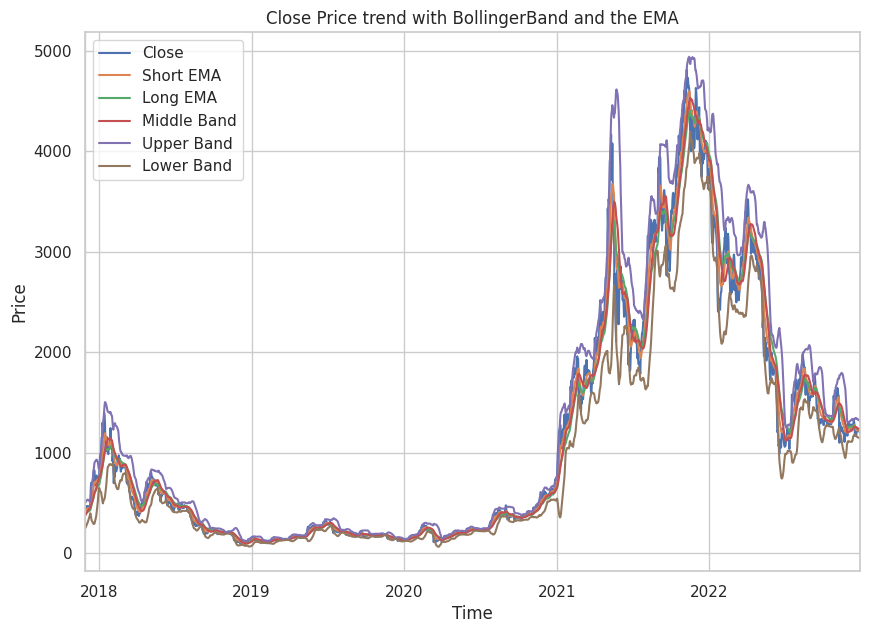

In [ ]:
df[["Close","Short EMA", "Long EMA","Middle Band", 'Upper Band', 'Lower Band']].plot(figsize=(10,7))
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Close Price trend with BollingerBand and the EMA")

In [ ]:
## Ensure the DataFrame's index is datetime
#df.index = pd.to_datetime(df.index)

## Filter the data for the required range
#mask = (df.index >= '2012-01-01') & (df.index <= '2012-12-31')
#filtered_df = df.loc[mask]

## Plotting using seaborn
#plt.figure(figsize=(14, 8))

## Plotting each column
#sns.lineplot(data=filtered_df, x=filtered_df.index, y='Next_day', label='Closing Price')
#sns.lineplot(data=filtered_df, x=filtered_df.index, y='Upper Band', label='Upper Band')
#ns.lineplot(data=filtered_df, x=filtered_df.index, y='Middle Band', label='Middle Band')
#sns.lineplot(data=filtered_df, x=filtered_df.index, y='Lower Band', label='Lower Band')

#plt.title('S&P 500 Close Prices and Bollinger Bands in 2012')
#plt.xlabel('Date')
#plt.ylabel('Value')
#plt.legend()
#plt.show()

In [ ]:
## Ensure the DataFrame's index is datetime
#df.index = pd.to_datetime(df.index)

## Filter the data for the required range
#mask = (df.index >= '2012-01-01') & (df.index <= '2012-12-31')
#filtered_df = df.loc[mask]

## Plotting using seaborn
#plt.figure(figsize=(14, 8))

## Plotting each column
#sns.lineplot(data=filtered_df, x=filtered_df.index, y='Next_day', label='Closing Price')
#sns.lineplot(data=filtered_df, x=filtered_df.index, y='Long EMA', label='Long EMA')
#sns.lineplot(data=filtered_df, x=filtered_df.index, y='Short EMA', label='Short EMA')

#plt.title('S&P 500 Close Prices and EMA in 2012')
#plt.xlabel('Date')
#plt.ylabel('Value')
#plt.legend()
#plt.show()

In [ ]:
## Ensure the DataFrame's index is datetime
#df.index = pd.to_datetime(df.index)

## Filter the data for the required range
#mask = (df.index >= '2012-01-01') & (df.index <= '2012-12-31')
#filtered_df1 = df1.loc[mask]

## Plotting using seaborn
#plt.figure(figsize=(14, 8))

## Plotting each column
#sns.lineplot(data=filtered_df, x=filtered_df.index, y='Next_day', label='Closing Price')
#sns.lineplot(data=filtered_df, x=filtered_df.index, y='Long EMA', label='Long EMA')
#ns.lineplot(data=filtered_df, x=filtered_df.index, y='Short EMA', label='Short EMA')
#ns.lineplot(data=filtered_df, x=filtered_df.index, y='Upper Band', label='Upper Band')
#sns.lineplot(data=filtered_df, x=filtered_df.index, y='Middle Band', label='Middle Band')
#sns.lineplot(data=filtered_df, x=filtered_df.index, y='Lower Band', label='Lower Band')

#plt.title('S&P 500 Close Prices Trend in 2012')
#plt.xlabel('Date')
#plt.ylabel('Value')
#plt.legend()
#plt.show()

In [ ]:
## Ensure the DataFrame's index is datetime
#df.index = pd.to_datetime(df.index)

## Filter the data for the required range
#mask = (df.index >= '2012-01-01') & (df.index <= '2012-12-31')
#filtered_df = df.loc[mask]

## Plotting using seaborn
#plt.figure(figsize=(14, 8))

## Plotting each column
#sns.lineplot(data=filtered_df, x=filtered_df.index, y='MACD', label='MACD')
#sns.lineplot(data=filtered_df, x=filtered_df.index, y='Signal Line', label='Signal line')

#plt.title('S&P 500 MACD and Signal Line in 2012')
#plt.xlabel('Date')
#plt.ylabel('Value')
#plt.legend()
#plt.show()

# 2019

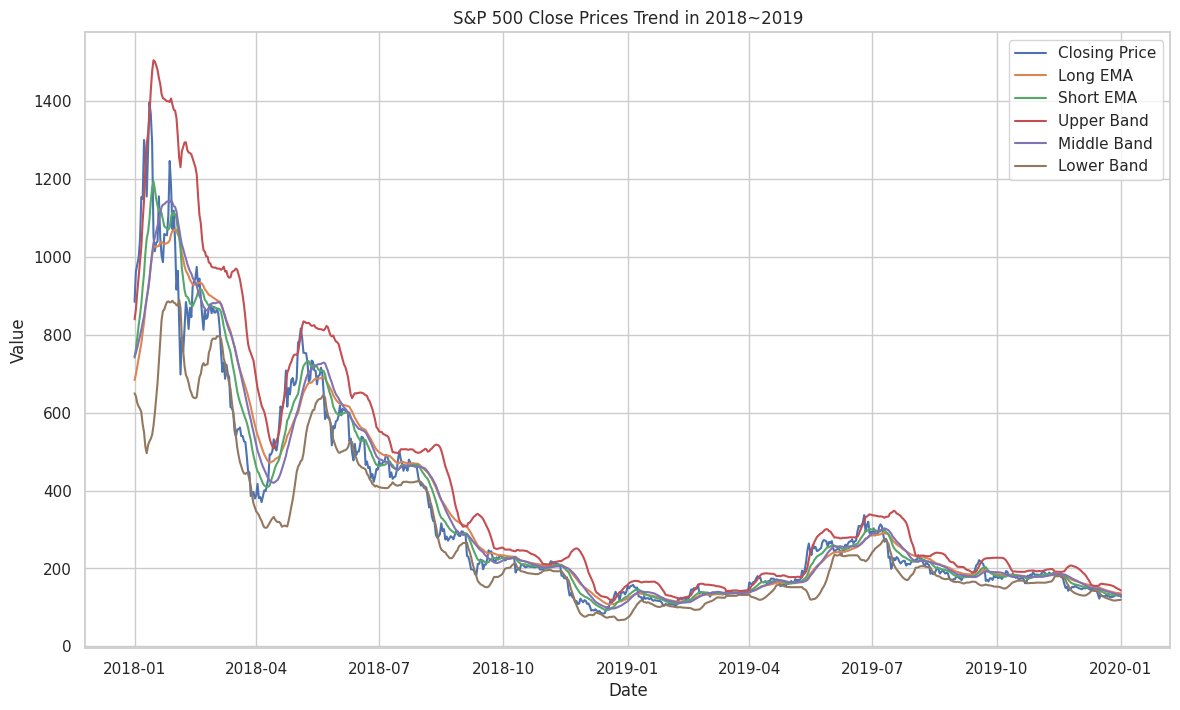

In [ ]:
# Ensure the DataFrame's index is datetime
df1.index = pd.to_datetime(df.index)

# Filter the data for the required range
mask = (df.index >= '2018-01-01') & (df.index <= '2020-01-01')
filtered_df = df.loc[mask]

# Plotting using seaborn
plt.figure(figsize=(14, 8))

# Plotting each column
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Next_day', label='Closing Price')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Long EMA', label='Long EMA')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Short EMA', label='Short EMA')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Upper Band', label='Upper Band')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Middle Band', label='Middle Band')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Lower Band', label='Lower Band')



plt.title('S&P 500 Close Prices Trend in 2018~2019')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

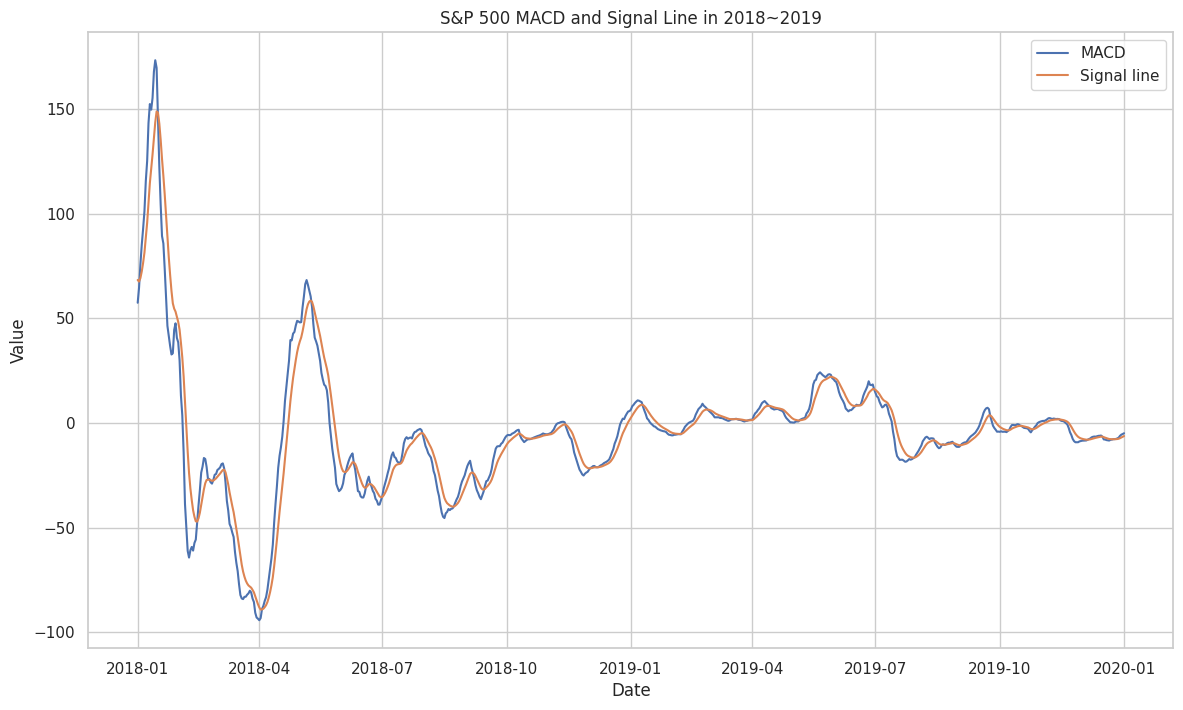

In [ ]:
# Ensure the DataFrame's index is datetime
df.index = pd.to_datetime(df.index)

# Filter the data for the required range
mask = (df.index >= '2018-01-01') & (df.index <= '2020-01-01')
filtered_df = df.loc[mask]

# Plotting using seaborn
plt.figure(figsize=(14, 8))

# Plotting each column
sns.lineplot(data=filtered_df, x=filtered_df.index, y='MACD', label='MACD')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Signal Line', label='Signal line')

plt.title('S&P 500 MACD and Signal Line in 2018~2019')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# August 2019 to June 2020 Graphs

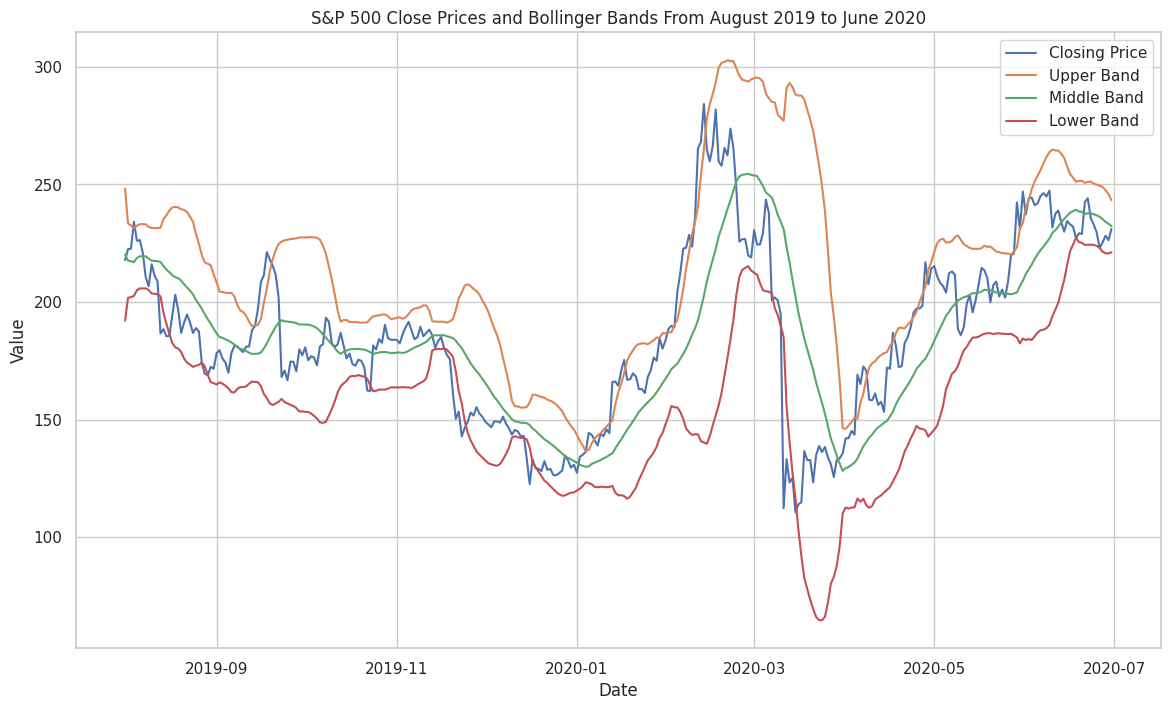

In [ ]:
# Ensure the DataFrame's index is datetime
df.index = pd.to_datetime(df.index)

# Filter the data for the required range
mask = (df.index >= '2019-08-01') & (df.index <= '2020-06-30')
filtered_df = df.loc[mask]

# Plotting using seaborn
plt.figure(figsize=(14, 8))

# Plotting each column
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Next_day', label='Closing Price')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Upper Band', label='Upper Band')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Middle Band', label='Middle Band')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Lower Band', label='Lower Band')

plt.title('S&P 500 Close Prices and Bollinger Bands From August 2019 to June 2020')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

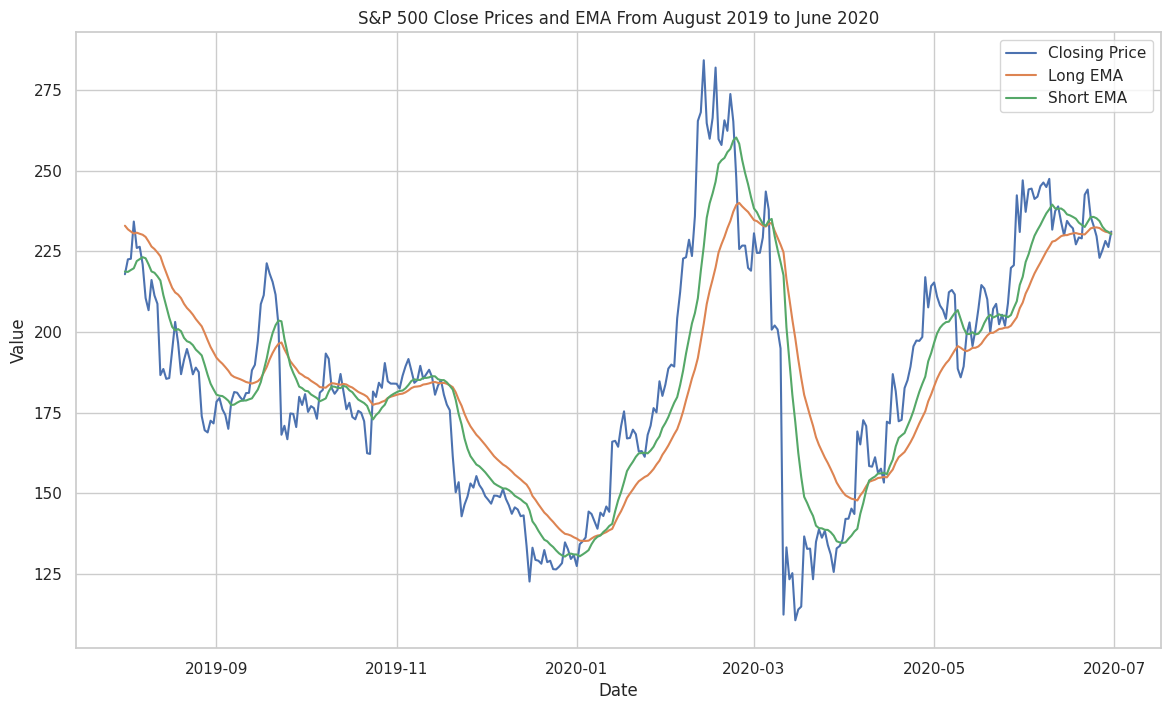

In [ ]:
# Ensure the DataFrame's index is datetime
df1.index = pd.to_datetime(df.index)

# Filter the data for the required range
mask = (df.index >= '2019-08-01') & (df.index <= '2020-06-30')
filtered_df = df.loc[mask]

# Plotting using seaborn
plt.figure(figsize=(14, 8))

# Plotting each column
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Next_day', label='Closing Price')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Long EMA', label='Long EMA')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Short EMA', label='Short EMA')

plt.title('S&P 500 Close Prices and EMA From August 2019 to June 2020')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

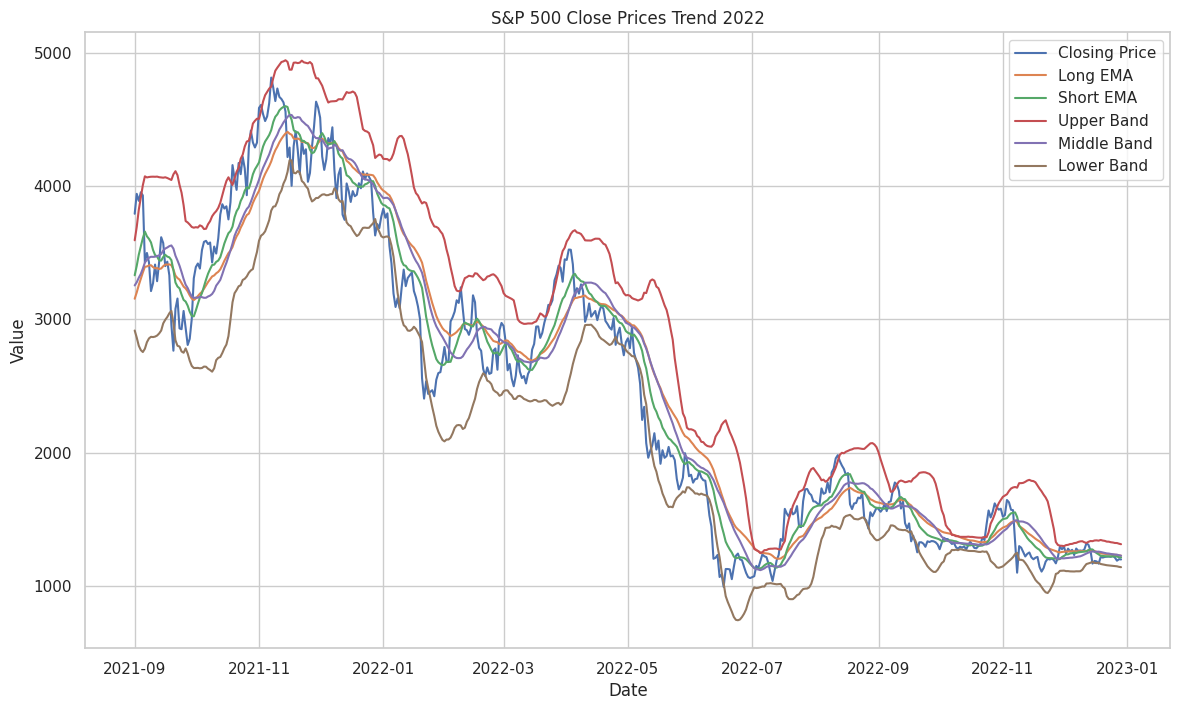

In [ ]:
# Ensure the DataFrame's index is datetime
df1.index = pd.to_datetime(df.index)

# Filter the data for the required range
mask = (df.index >= '2021-09-01') & (df.index <= '2022-12-31')
filtered_df = df.loc[mask]

# Plotting using seaborn
plt.figure(figsize=(14, 8))

# Plotting each column
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Next_day', label='Closing Price')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Long EMA', label='Long EMA')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Short EMA', label='Short EMA')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Upper Band', label='Upper Band')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Middle Band', label='Middle Band')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Lower Band', label='Lower Band')



plt.title('S&P 500 Close Prices Trend 2022')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

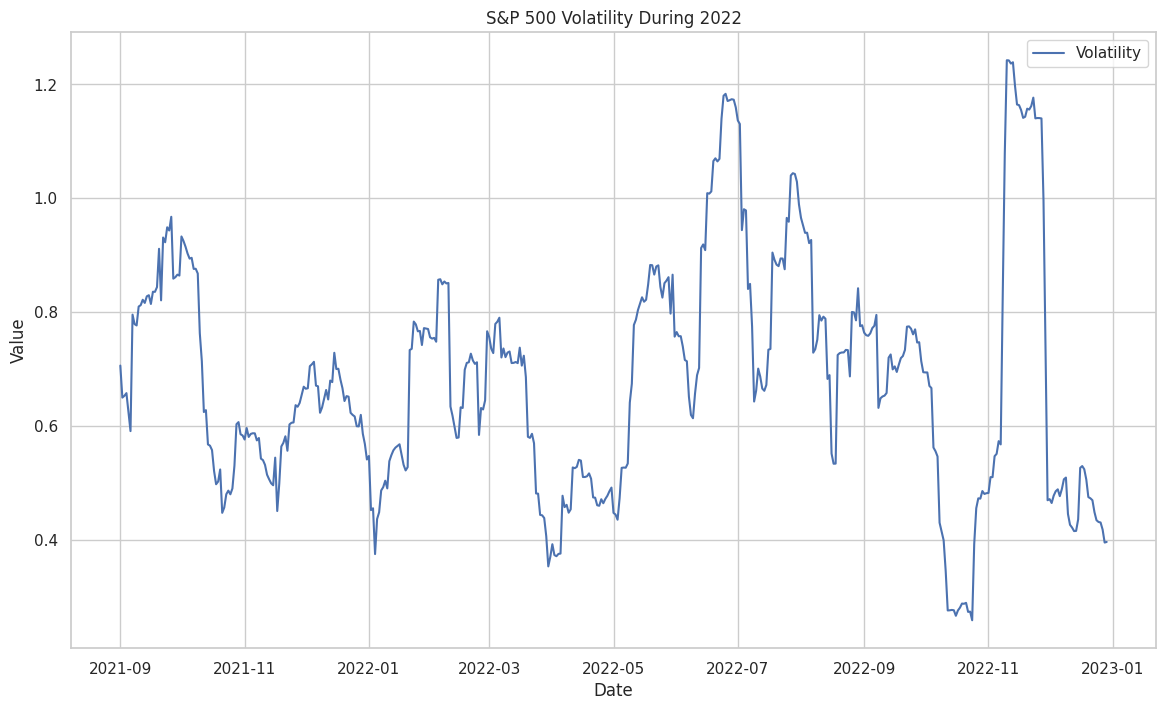

In [ ]:
# Ensure the DataFrame's index is datetime
df.index = pd.to_datetime(df.index)

# Filter the data for the required range
mask = (df.index >= '2021-09-01') & (df.index <= '2022-12-31')
filtered_df = df.loc[mask]

# Plotting using seaborn
plt.figure(figsize=(14, 8))

# Plotting each column
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Volatility', label='Volatility')

plt.title('S&P 500 Volatility During 2022')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

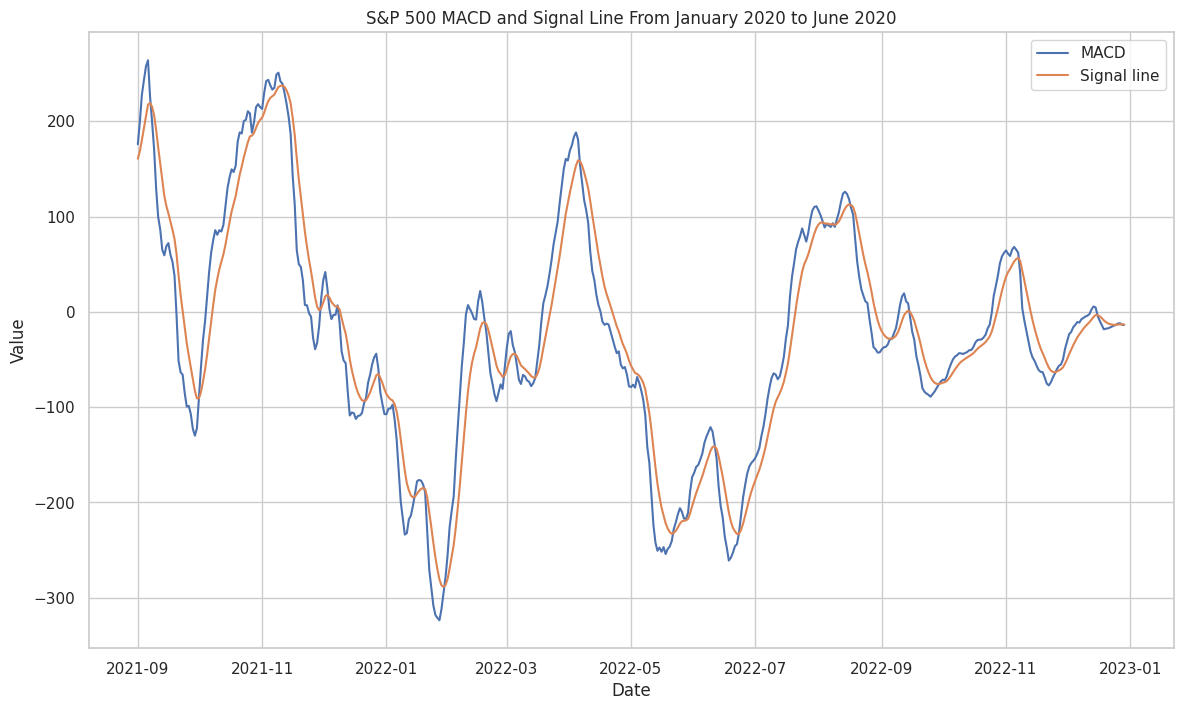

In [ ]:
# Ensure the DataFrame's index is datetime
df.index = pd.to_datetime(df.index)

# Filter the data for the required range
mask = (df.index >= '2021-09-01') & (df.index <= '2022-12-31')
filtered_df = df.loc[mask]

# Plotting using seaborn
plt.figure(figsize=(14, 8))

# Plotting each column
sns.lineplot(data=filtered_df, x=filtered_df.index, y='MACD', label='MACD')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Signal Line', label='Signal line')

plt.title('S&P 500 MACD and Signal Line From January 2020 to June 2020')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Graph during 2020

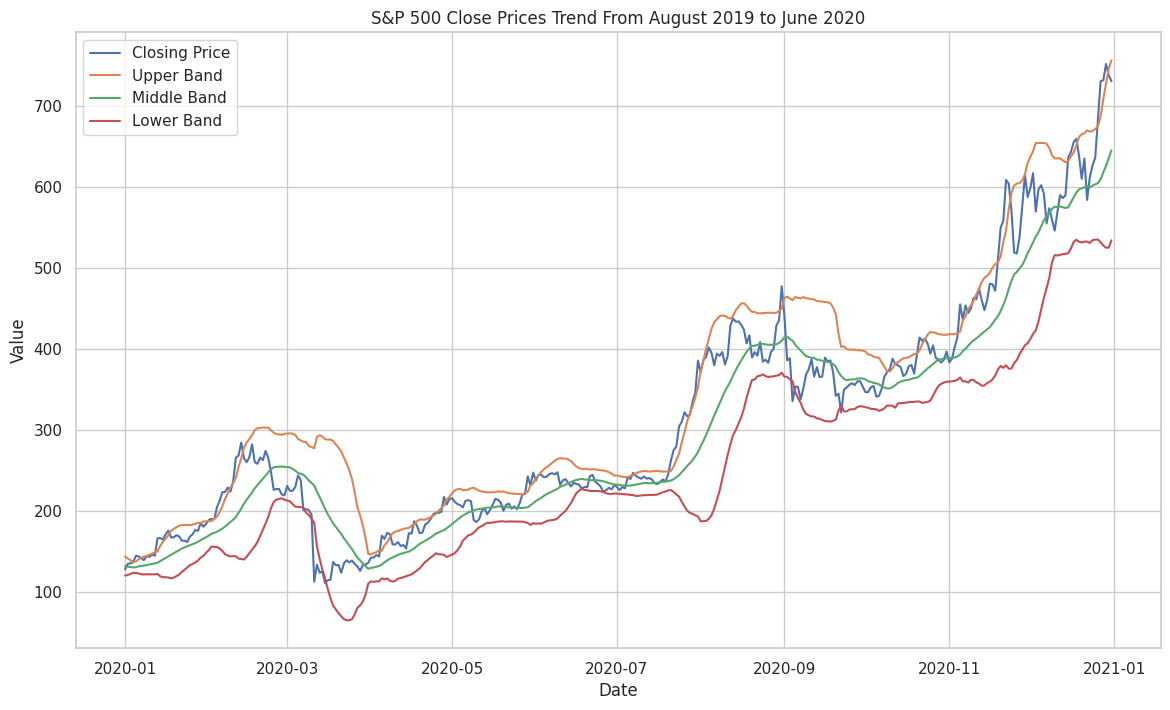

In [ ]:
# Ensure the DataFrame's index is datetime
df.index = pd.to_datetime(df.index)

# Filter the data for the required range
mask = (df.index >= '2020-01-01') & (df.index <= '2020-12-31')
filtered_df = df.loc[mask]

# Plotting using seaborn
plt.figure(figsize=(14, 8))

# Plotting each column
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Next_day', label='Closing Price')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Upper Band', label='Upper Band')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Middle Band', label='Middle Band')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Lower Band', label='Lower Band')

plt.title('S&P 500 Close Prices Trend From August 2019 to June 2020')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


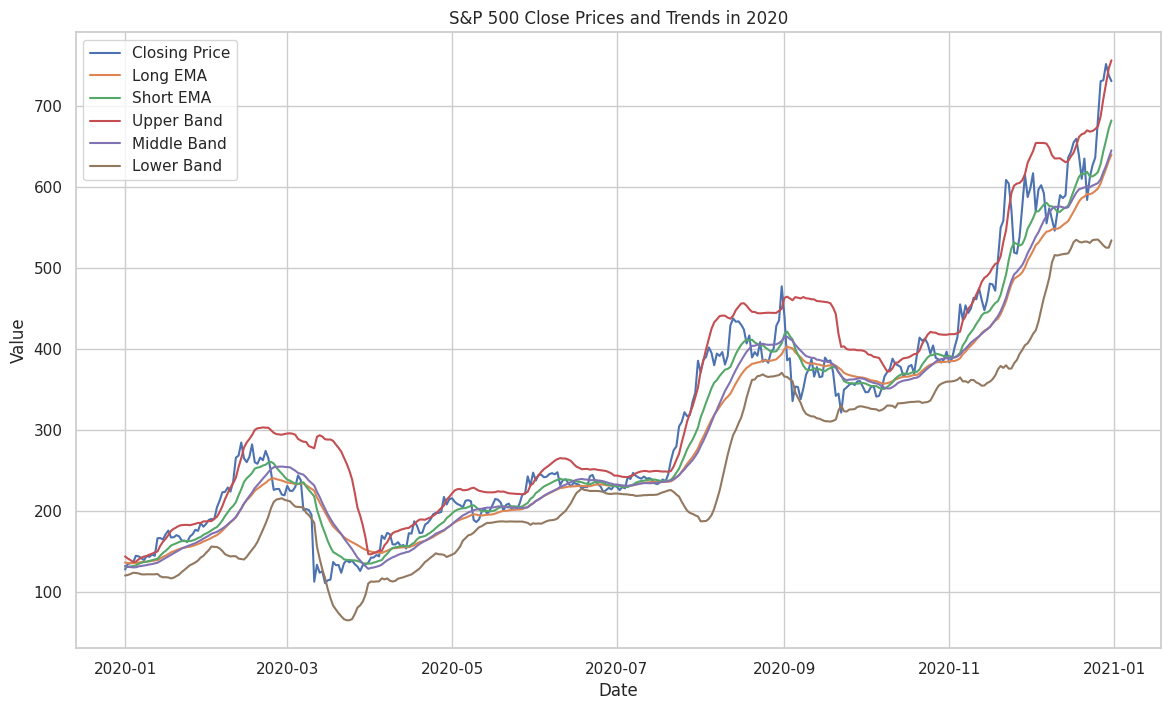

In [ ]:
# Ensure the DataFrame's index is datetime
df.index = pd.to_datetime(df.index)

# Filter the data for the required range
mask = (df.index >= '2020-01-01') & (df.index <= '2020-12-31')
filtered_df = df.loc[mask]

# Plotting using seaborn
plt.figure(figsize=(14, 8))

# Plotting each column
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Next_day', label='Closing Price')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Long EMA', label='Long EMA')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Short EMA', label='Short EMA')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Upper Band', label='Upper Band')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Middle Band', label='Middle Band')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Lower Band', label='Lower Band')



plt.title('S&P 500 Close Prices and Trends in 2020')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

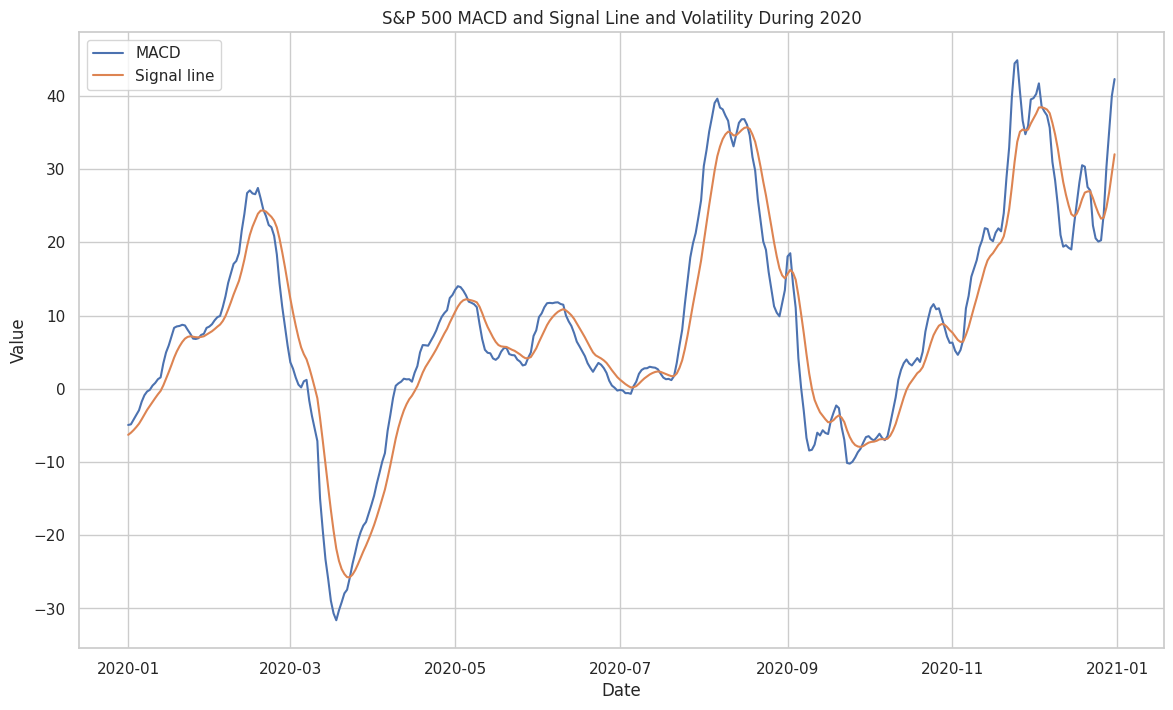

In [ ]:
# Ensure the DataFrame's index is datetime
df.index = pd.to_datetime(df.index)

# Filter the data for the required range
mask = (df.index >= '2020-01-01') & (df.index <= '2020-12-31')
filtered_df = df.loc[mask]

# Plotting using seaborn
plt.figure(figsize=(14, 8))

# Plotting each column
sns.lineplot(data=filtered_df, x=filtered_df.index, y='MACD', label='MACD')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Signal Line', label='Signal line')

plt.title('S&P 500 MACD and Signal Line and Volatility During 2020')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

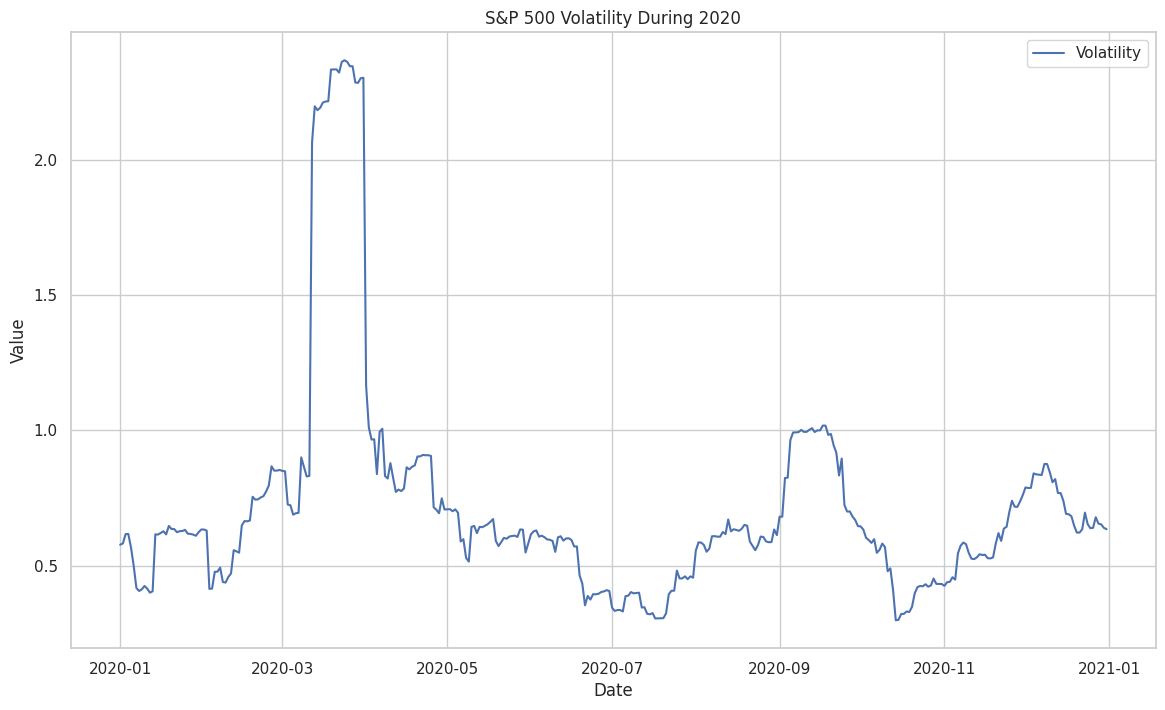

In [ ]:
# Ensure the DataFrame's index is datetime
df.index = pd.to_datetime(df.index)

# Filter the data for the required range
mask = (df.index >= '2020-01-01') & (df.index <= '2020-12-31')
filtered_df = df.loc[mask]

# Plotting using seaborn
plt.figure(figsize=(14, 8))

# Plotting each column
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Volatility', label='Volatility')

plt.title('S&P 500 Volatility During 2020')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Graph During 2020 APR~2021

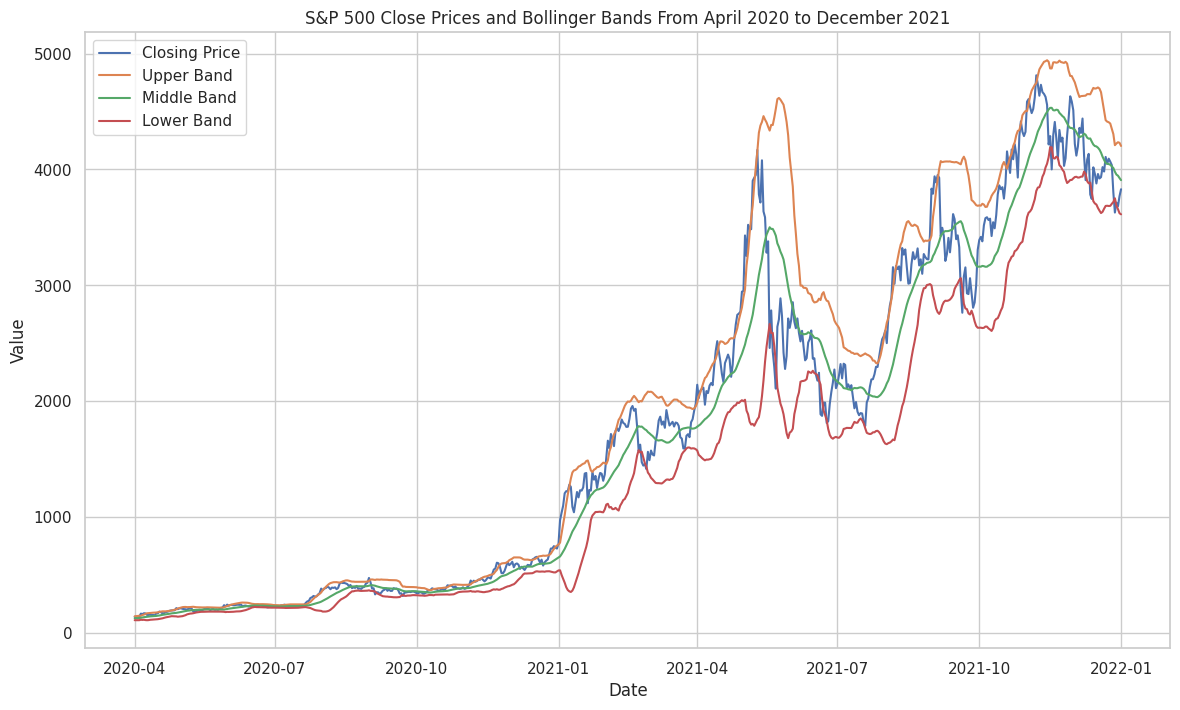

In [ ]:
# Ensure the DataFrame's index is datetime
df.index = pd.to_datetime(df.index)

# Filter the data for the required range
mask = (df.index >= '2020-04-01') & (df.index <= '2022-01-01')
filtered_df = df.loc[mask]

# Plotting using seaborn
plt.figure(figsize=(14, 8))

# Plotting each column
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Next_day', label='Closing Price')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Upper Band', label='Upper Band')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Middle Band', label='Middle Band')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Lower Band', label='Lower Band')

plt.title('S&P 500 Close Prices and Bollinger Bands From April 2020 to December 2021')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

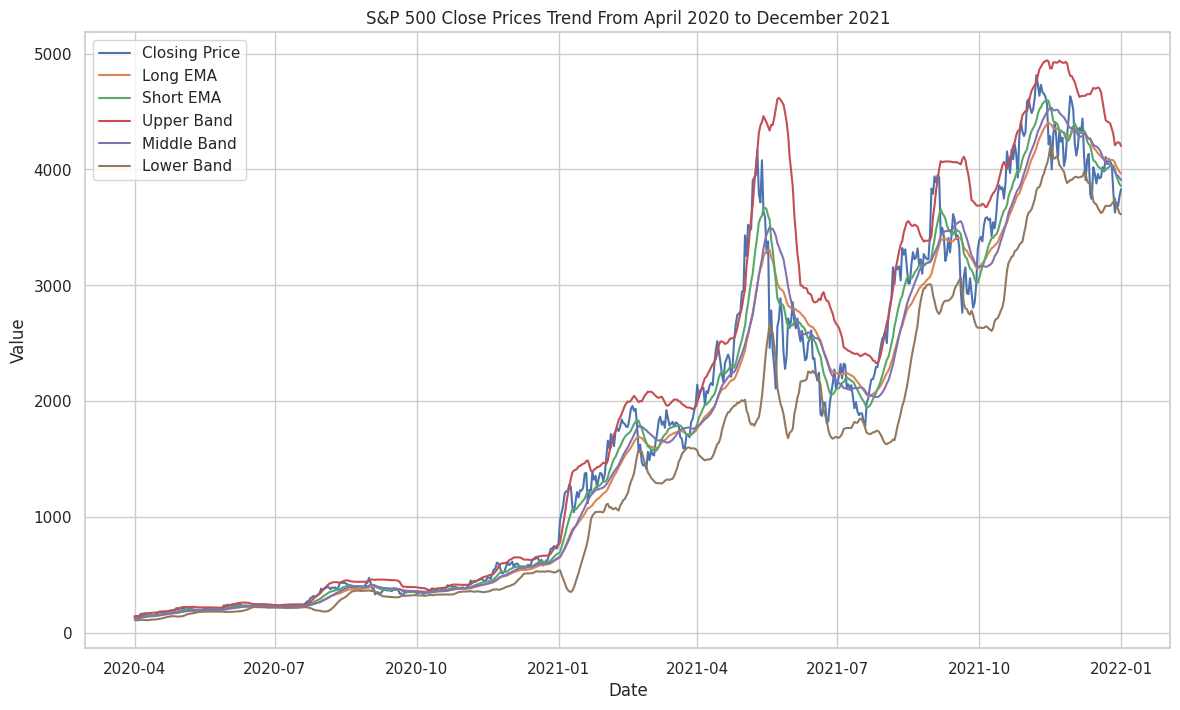

In [ ]:
# Ensure the DataFrame's index is datetime
df.index = pd.to_datetime(df.index)

# Filter the data for the required range
mask = (df.index >= '2020-04-01') & (df.index <= '2022-01-01')
filtered_df = df.loc[mask]

# Plotting using seaborn
plt.figure(figsize=(14, 8))

# Plotting each column
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Next_day', label='Closing Price')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Long EMA', label='Long EMA')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Short EMA', label='Short EMA')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Upper Band', label='Upper Band')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Middle Band', label='Middle Band')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Lower Band', label='Lower Band')



plt.title('S&P 500 Close Prices Trend From April 2020 to December 2021')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

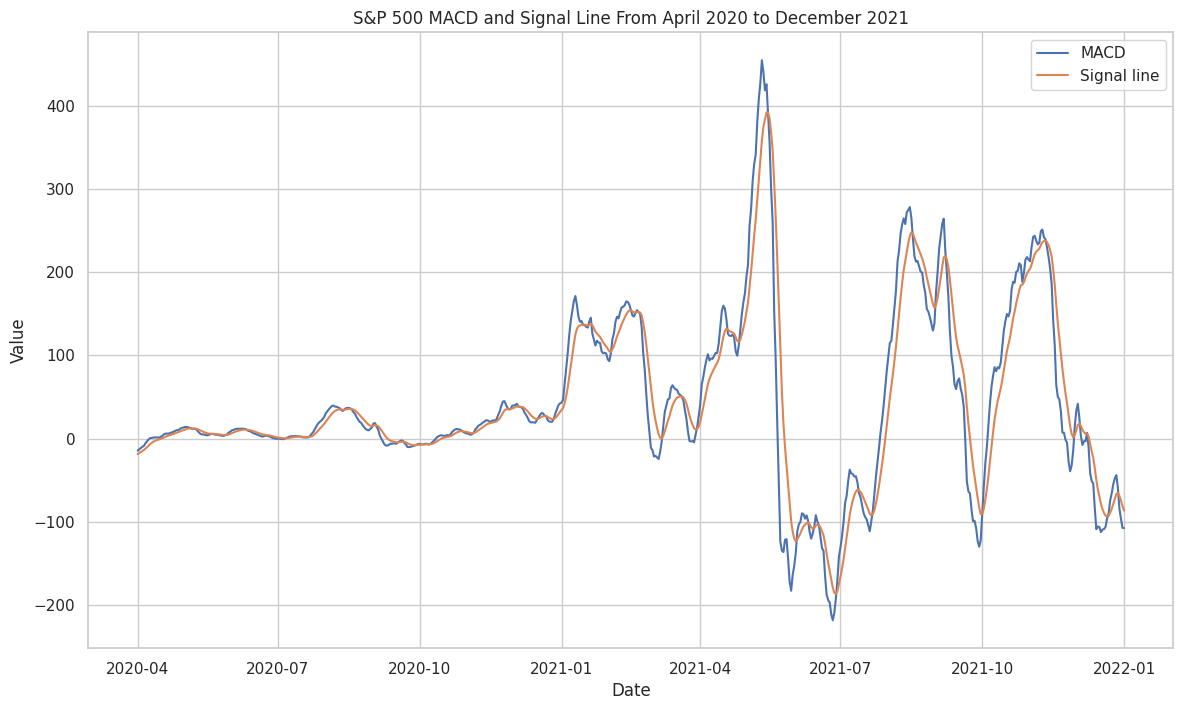

In [ ]:
# Ensure the DataFrame's index is datetime
df.index = pd.to_datetime(df.index)

# Filter the data for the required range
mask = (df.index >= '2020-04-01') & (df.index <= '2022-01-01')
filtered_df = df.loc[mask]

# Plotting using seaborn
plt.figure(figsize=(14, 8))

# Plotting each column
sns.lineplot(data=filtered_df, x=filtered_df.index, y='MACD', label='MACD')
sns.lineplot(data=filtered_df, x=filtered_df.index, y='Signal Line', label='Signal line')

plt.title('S&P 500 MACD and Signal Line From April 2020 to December 2021')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
df

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-29   473.281006   522.307007   425.071014   427.523010   427.523010   
2017-11-30   431.214996   465.497009   401.243011   447.114014   447.114014   
2017-12-01   445.209015   472.609009   428.312012   466.540009   466.540009   
2017-12-02   466.851013   476.239014   456.653015   463.449005   463.449005   
2017-12-03   463.704987   482.813995   451.851990   465.852997   465.852997   
...                 ...          ...          ...          ...          ...   
2022-12-25  1221.171509  1223.517822  1203.719604  1218.962036  1218.962036   
2022-12-26  1218.920166  1226.974365  1214.335938  1226.974365  1226.974365   
2022-12-27  1226.987061  1230.418091  1205.895630  1212.791626  1212.791626   
2022-12-28  1212.736572  1213.128906  1185.702148  1189.986084  1189.986084   
2022-12-29  1190.010132  1204.141602  1188.360229  1201.595337  1201.595337   

                Volume  Pct_change    Short EMA     Long EMA       MACD  \
Date                                                                      
2017-11-29  2675940096   -0.100880   423.561942   386.376159  37.185784   
2017-11-30  1903040000    0.044806   427.185338   390.875259  36.310079   
2017-12-01  1247879936    0.042530   433.239903   396.480055  36.759847   
2017-12-02   943649984   -0.006647   437.887457   401.440718  36.446739   
2017-12-03   990556992    0.005174   442.189848   406.211998  35.977849   
...                ...         ...          ...          ...        ...   
2022-12-25  3942720070   -0.001792  1221.669709  1235.268499 -13.598790   
2022-12-26  3282098400    0.006552  1222.485810  1234.654119 -12.168309   
2022-12-27  4091530737   -0.011626  1220.994397  1233.034675 -12.040278   
2022-12-28  4991669631   -0.018983  1216.223888  1229.845890 -13.622003   
2022-12-29  4132233940    0.009709  1213.973341  1227.753257 -13.779915   

            Signal Line  MACD Histogram  Log Returns  Volatility  Middle Band  \
Date                                                                            
2017-11-29    28.226306        8.959477    -0.100880    0.846353   379.305402   
2017-11-30    29.843061        6.467018     0.044806    0.791214   386.698453   
2017-12-01    31.226418        5.533429     0.042530    0.787766   394.291403   
2017-12-02    32.270482        4.176256    -0.006647    0.778998   402.068454   
2017-12-03    33.011956        2.965894     0.005174    0.780244   409.525304   
...                 ...             ...          ...         ...          ...   
2022-12-25   -13.600157        0.001367    -0.001792    0.431109  1238.454285   
2022-12-26   -13.313787        1.145479     0.006552    0.430237  1236.220313   
2022-12-27   -13.059085        1.018808    -0.011626    0.417804  1235.238019   
2022-12-28   -13.171669       -0.450334    -0.018983    0.394964  1230.681506   
2022-12-29   -13.293318       -0.486597     0.009709    0.396009  1227.547034   

              Std Dev   Upper Band   Lower Band     Next_day  
Date                                                          
2017-11-29  63.888660   507.082721   251.528082   447.114014  
2017-11-30  62.681287   512.061027   261.335879   466.540009  
2017-12-01  62.696023   519.683448   268.899358   463.449005  
2017-12-02  61.041859   524.152173   279.984735   465.852997  
2017-12-03  59.146294   527.817892   291.232715   470.204010  
...               ...          ...          ...          ...  
2022-12-25  43.972964  1326.400212  1150.508357  1226.974365  
2022-12-26  43.327745  1322.875803  1149.564822  1212.791626  
2022-12-27  43.639596  1322.517211  1147.958827  1189.986084  
2022-12-28  43.353841  1317.389188  1143.973825  1201.595337  
2022-12-29  43.061694  1313.670422  1141.423645  1199.232788  

[1857 rows x 19 columns]

Text(0.5, 1.0, 'Close Price trend with Bollinger Bands')

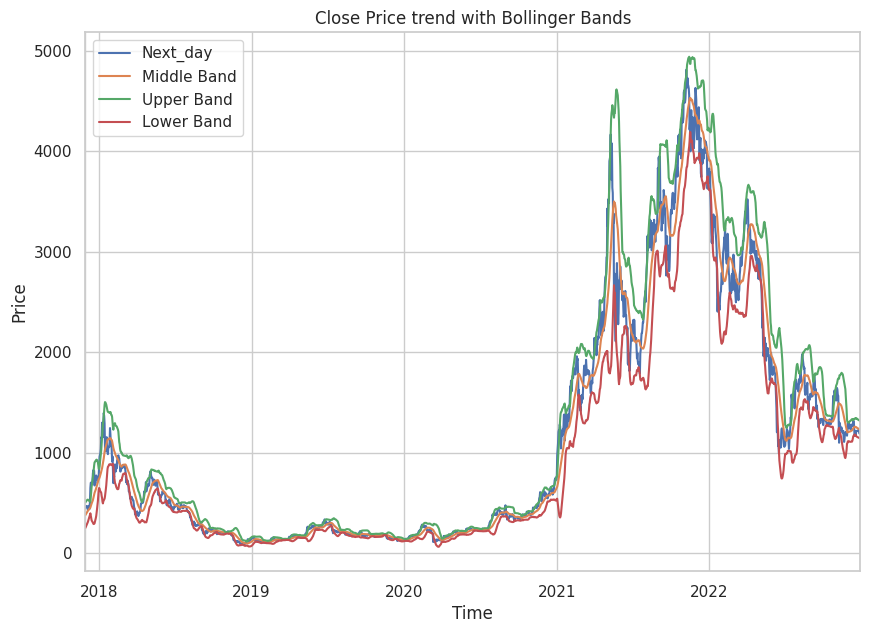

In [ ]:
df[["Next_day","Middle Band", 'Upper Band', 'Lower Band']].plot(figsize=(10,7))
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Close Price trend with Bollinger Bands")

# 3. Data Scaling and Split to build LSTM
### Feature Engineering is done, Next_day column indicates the next day's close price of S&P 500, then this variable will be the target to predict.In next section, there will be an attempt to scale the original data and split this into test and train dataset for making LSTM model.

### Two methods.

### ==> Scale whole original dataset (df) and split into X and y and then split into test and train
### ==> Split and Scale X data only --> How does It work?


### 3.1 Data Dropping

In [ ]:
df = df.drop(["Adj Close","Volume","Close",'Short EMA', 'Log Returns','Long EMA', 'MACD Histogram'],axis = 1)

In [ ]:
df

Open         High          Low  Pct_change       MACD  \
Date                                                                       
2017-11-29   473.281006   522.307007   425.071014   -0.100880  37.185784   
2017-11-30   431.214996   465.497009   401.243011    0.044806  36.310079   
2017-12-01   445.209015   472.609009   428.312012    0.042530  36.759847   
2017-12-02   466.851013   476.239014   456.653015   -0.006647  36.446739   
2017-12-03   463.704987   482.813995   451.851990    0.005174  35.977849   
...                 ...          ...          ...         ...        ...   
2022-12-25  1221.171509  1223.517822  1203.719604   -0.001792 -13.598790   
2022-12-26  1218.920166  1226.974365  1214.335938    0.006552 -12.168309   
2022-12-27  1226.987061  1230.418091  1205.895630   -0.011626 -12.040278   
2022-12-28  1212.736572  1213.128906  1185.702148   -0.018983 -13.622003   
2022-12-29  1190.010132  1204.141602  1188.360229    0.009709 -13.779915   

            Signal Line  Volatility  Middle Band    Std Dev   Upper Band  \
Date                                                                       
2017-11-29    28.226306    0.846353   379.305402  63.888660   507.082721   
2017-11-30    29.843061    0.791214   386.698453  62.681287   512.061027   
2017-12-01    31.226418    0.787766   394.291403  62.696023   519.683448   
2017-12-02    32.270482    0.778998   402.068454  61.041859   524.152173   
2017-12-03    33.011956    0.780244   409.525304  59.146294   527.817892   
...                 ...         ...          ...        ...          ...   
2022-12-25   -13.600157    0.431109  1238.454285  43.972964  1326.400212   
2022-12-26   -13.313787    0.430237  1236.220313  43.327745  1322.875803   
2022-12-27   -13.059085    0.417804  1235.238019  43.639596  1322.517211   
2022-12-28   -13.171669    0.394964  1230.681506  43.353841  1317.389188   
2022-12-29   -13.293318    0.396009  1227.547034  43.061694  1313.670422   

             Lower Band     Next_day  
Date                                  
2017-11-29   251.528082   447.114014  
2017-11-30   261.335879   466.540009  
2017-12-01   268.899358   463.449005  
2017-12-02   279.984735   465.852997  
2017-12-03   291.232715   470.204010  
...                 ...          ...  
2022-12-25  1150.508357  1226.974365  
2022-12-26  1149.564822  1212.791626  
2022-12-27  1147.958827  1189.986084  
2022-12-28  1143.973825  1201.595337  
2022-12-29  1141.423645  1199.232788  

[1857 rows x 12 columns]

In [ ]:
## normalize the dataset
#scaler = StandardScaler()
#scaler = scaler.fit(df)
#scaled_data = scaler.transform(df)

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Pct_change', 'MACD', 'Signal Line',
       'Volatility', 'Middle Band', 'Std Dev', 'Upper Band', 'Lower Band',
       'Next_day'],
      dtype='object')

### 3.2 Min-Max Scaling

In [ ]:
scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Pct_change', 'MACD','Signal Line','Volatility','Middle Band', 'Std Dev',
       'Upper Band', 'Lower Band', 'Next_day']

scaled_df = scaler.fit_transform(df[scale_cols])

scaled_df = pd.DataFrame(scaled_df, columns=scale_cols)

print(scaled_df)

          Open      High       Low  Pct_change      MACD  Signal Line  \
0     0.082315  0.090914  0.073835    0.572715  0.463765     0.465773   
1     0.073413  0.079094  0.068694    0.758190  0.462639     0.468150   
2     0.076374  0.080574  0.074534    0.755293  0.463217     0.470183   
3     0.080954  0.081329  0.080649    0.692684  0.462815     0.471717   
4     0.080288  0.082697  0.079613    0.707734  0.462212     0.472807   
...        ...       ...       ...         ...       ...          ...   
1852  0.240572  0.236806  0.241821    0.698866  0.398494     0.404301   
1853  0.240095  0.237525  0.244111    0.709488  0.400333     0.404722   
1854  0.241802  0.238242  0.242290    0.686345  0.400497     0.405096   
1855  0.238787  0.234644  0.237934    0.676979  0.398464     0.404931   
1856  0.233978  0.232775  0.238507    0.713507  0.398261     0.404752   

      Volatility  Middle Band   Std Dev  Upper Band  Lower Band  Next_day  
0       0.290080     0.063604  0.091845    0.08

### 3.3 Data Scaling

In [ ]:
features  = df.columns[:-1]

### 3.4 Making Sequence Data

In [ ]:
df.shape

(1857, 12)

In [ ]:
# Split original data into input sequences and target values
lookback = 10 # Using past 10 days' daily data of below columns' data to predict the 'Next_day' price
data_columns = ['Open', 'High', 'Low', 'Pct_change', 'MACD', 'Signal Line', 'Volatility', 'Middle Band', 'Std Dev',
                'Upper Band', 'Lower Band']
target_columns = ['Next_day']

df_reset = df.reset_index(drop=True)

X = []
y = []

for i in range(len(df_reset) - lookback):
    X.append(df_reset.loc[i:i+lookback-1, data_columns].values)  # to select only the columns specified in data_columns
    y.append(df_reset.loc[i+lookback, target_columns].values[0])  # select the target value

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)


In [ ]:
# Scale the input sequences (X)
scaler = MinMaxScaler()
#X = scaler.fit_transform(X_pca.reshape(X.shape[0], -1))
X = scaler.fit_transform(X.reshape(X.shape[0], -1))

# Scale the target variable (y)
y_scaler = MinMaxScaler()
y = y_scaler.fit_transform(y.reshape(-1, 1))

In [ ]:
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=100)
for train_index, test_index in tscv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
X_train = X_train.reshape((X_train.shape[0], lookback, -1))
X_test = X_test.reshape((X_test.shape[0], lookback, -1))

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1747, 10, 11) (100, 10, 11)
(1747, 1) (100, 1)


# Building an LSTM Model

In [ ]:
def build_bilstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(128, return_sequences=False), input_shape=input_shape))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2])
bilstm_model = build_bilstm_model(input_shape)

#Setup Early stopping
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

# Train the model
history = bilstm_model.fit(X_train, y_train, epochs=50, batch_size=32,
                           validation_data=(X_test, y_test), callbacks=[early_stopping])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 1747 samples, validate on 100 samples
Epoch 1/50
1747/1747 [==============================] - 2s 1ms/sample - loss: 0.0160 - val_loss: 9.4758e-04
Epoch 2/50
  32/1747 [..............................] - ETA: 1s - loss: 8.6401e-04

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1747/1747 [==============================] - 1s 702us/sample - loss: 0.0016 - val_loss: 5.7514e-04
Epoch 3/50
1747/1747 [==============================] - 1s 710us/sample - loss: 0.0016 - val_loss: 6.1332e-04
Epoch 4/50
1747/1747 [==============================] - 1s 706us/sample - loss: 0.0013 - val_loss: 4.1140e-04
Epoch 5/50
1747/1747 [==============================] - 1s 694us/sample - loss: 0.0012 - val_loss: 4.8680e-04
Epoch 6/50
1747/1747 [==============================] - 2s 970us/sample - loss: 0.0011 - val_loss: 4.2491e-04
Epoch 7/50
1747/1747 [==============================] - 2s 1ms/sample - loss: 0.0011 - val_loss: 4.1285e-04
Epoch 8/50
1747/1747 [==============================] - 1s 704us/sample - loss: 9.8885e-04 - val_loss: 4.8400e-04
Epoch 9/50
1747/1747 [==============================] - 1s 721us/sample - loss: 8.5909e-04 - val_loss: 6.7213e-04
Epoch 10/50
1747/1747 [==============================] - 1s 696us/sample - loss: 9.6340e-04 - val_loss: 0.0012
Epoch 11/50
17

In [ ]:
bilstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 256)               143360    
 al)                                                             
                                                                 
 dense (Dense)               (None, 25)                6425      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 149811 (585.20 KB)
Trainable params: 149811 (585.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


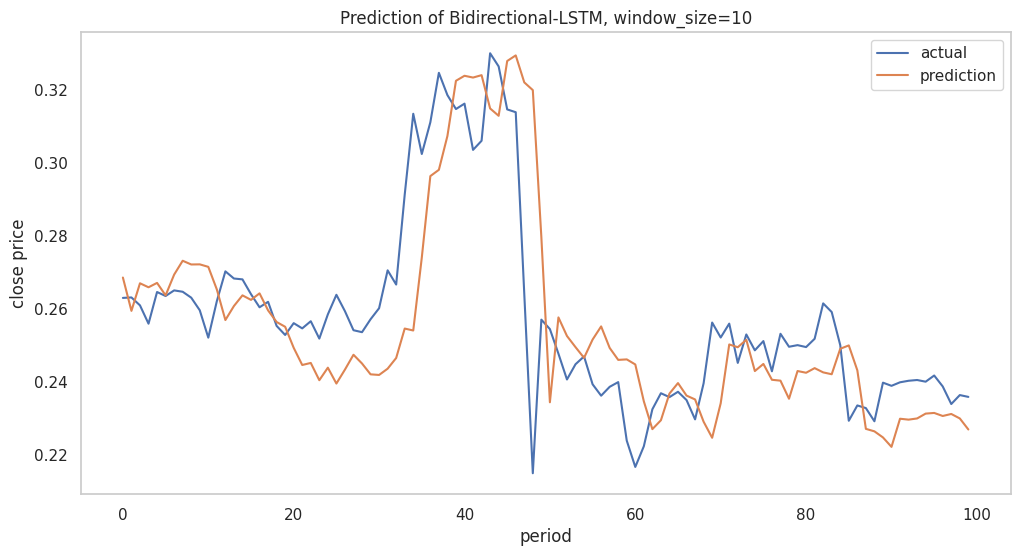

In [ ]:
pred = bilstm_model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.title('Prediction of Bidirectional-LSTM, window_size=10')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()
#Graph with scaled X and y

In [ ]:
# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)
mape = mean_absolute_percentage_error(y_test, pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE :", mape)

RMSE: 0.018775662050615295
MAE: 0.012861867310055806
MAPE : 0.04996608166988267


In [ ]:
#Inverse transformation to extract the real value from the scaled value
y_pred_original = y_scaler.inverse_transform(pred)
y_test_original = y_scaler.inverse_transform(y_test)

In [ ]:
y_pred_original

array([[1354.1   ],
       [1310.8633],
       [1346.658 ],
       [1341.4452],
       [1347.1371],
       [1330.9556],
       [1357.8754],
       [1375.8724],
       [1371.038 ],
       [1371.2002],
       [1367.9612],
       [1338.6327],
       [1298.9469],
       [1317.1179],
       [1330.9738],
       [1325.1078],
       [1333.5743],
       [1311.4884],
       [1296.4058],
       [1290.2252],
       [1262.9098],
       [1240.6184],
       [1243.2886],
       [1220.8907],
       [1237.1455],
       [1216.5464],
       [1234.6453],
       [1253.9078],
       [1242.5659],
       [1228.5021],
       [1227.7068],
       [1235.8333],
       [1249.7269],
       [1287.8986],
       [1285.3865],
       [1379.998 ],
       [1485.7059],
       [1493.8499],
       [1537.7639],
       [1609.3578],
       [1615.8647],
       [1613.5635],
       [1616.664 ],
       [1573.4479],
       [1563.9331],
       [1635.0236],
       [1642.3094],
       [1607.3011],
       [1597.2638],
       [1406.4952],


In [ ]:
y_test_original

array([[1327.68017578],
       [1328.25952148],
       [1317.99328613],
       [1294.21679688],
       [1335.32019043],
       [1330.12768555],
       [1337.41088867],
       [1335.65234375],
       [1327.9786377 ],
       [1311.64440918],
       [1276.09350586],
       [1323.43920898],
       [1362.12658691],
       [1352.8371582 ],
       [1351.70947266],
       [1332.51696777],
       [1315.50048828],
       [1322.60424805],
       [1291.33764648],
       [1279.57568359],
       [1294.90637207],
       [1288.12390137],
       [1297.42211914],
       [1274.8717041 ],
       [1306.29663086],
       [1331.71362305],
       [1310.44702148],
       [1285.7442627 ],
       [1283.20092773],
       [1299.94641113],
       [1314.29919434],
       [1363.44702148],
       [1344.99853516],
       [1461.66540527],
       [1566.56665039],
       [1514.37487793],
       [1555.47790527],
       [1619.69848633],
       [1590.7833252 ],
       [1572.71447754],
       [1579.70458984],
       [1519.711

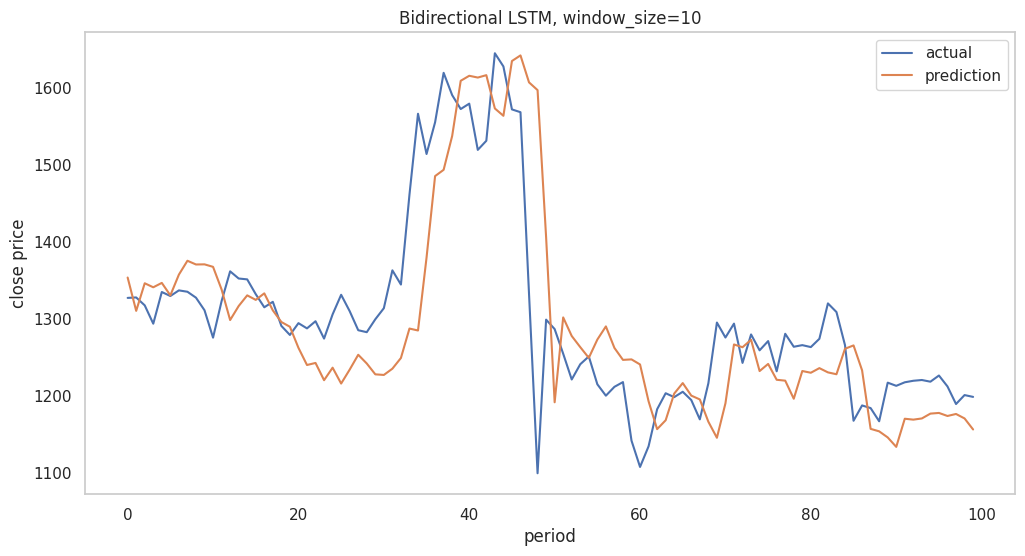

In [ ]:
#Real values of prediction
plt.figure(figsize=(12, 6))
plt.title('Bidirectional LSTM, window_size=10')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(y_test_original, label='actual')
plt.plot(y_pred_original, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [ ]:
# Calculate metrics with the real number value
real_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
real_mae = mean_absolute_error(y_test_original, y_pred_original)
real_mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
#Print each value
print("RMSE:", real_rmse)
print("MAE:",real_mae)
print("MAPE :", real_mape)

RMSE: 88.76718568176402
MAE: 60.808076171874994
MAPE : 0.04669170141632491


In [ ]:
df_reset = df.reset_index()

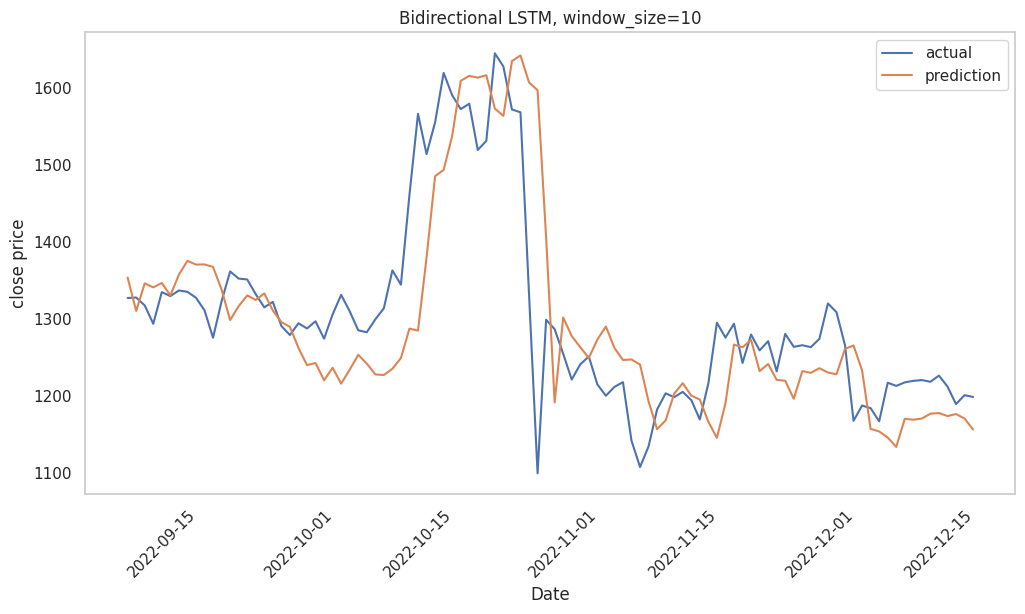

In [ ]:
# 4. Extract the "Date" values for the test set
date_values_bi = df_reset['Date'].iloc[test_index].values

# Plotting
plt.figure(figsize=(12, 6))
plt.title('Bidirectional LSTM, window_size=10')
plt.ylabel('close price')
plt.xlabel('Date')
plt.plot(date_values_bi, y_test_original, label='actual')
plt.plot(date_values_bi, y_pred_original, label='prediction')
plt.xticks(rotation=45)  # Rotate date values for better visualization
plt.grid()
plt.legend(loc='best')
plt.show()


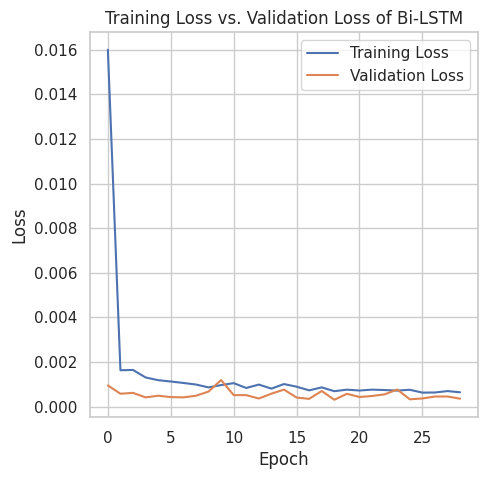

In [ ]:
# Plot the training loss and validation loss over the epochs when X,y scaled
plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs. Validation Loss of Bi-LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# 5. SHAP

In [ ]:
# Use the training data for deep explainer => can use fewer instances
explainer_stock = shap.DeepExplainer(bilstm_model, X_train)
shap_values_stock = explainer_stock.shap_values(X_test)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
shap.initjs()

In [ ]:
shap_values_stock[0][0].shape

(10, 11)

In [ ]:
X_test.shape

(100, 10, 11)

In [ ]:
shap_values_2D = shap_values_stock[0].reshape(-1,11)
X_test_2D = X_test.reshape(-1,11)


shap_values_2D.shape, X_test_2D.shape

((1000, 11), (1000, 11))

In [ ]:
features  = df.columns[:-1]
#features = df.columns
XX = df[features]

In [ ]:
mapping_dict = {f: column_name for f, column_name in zip(features, XX.columns)}

actual_column_names = [mapping_dict[feature_name] for feature_name in features]

In [ ]:
x_test_2d = pd.DataFrame(data=X_test_2D, columns = actual_column_names)

In [ ]:
x_test_2d.corr()

Open      High       Low  Pct_change      MACD  Signal Line  \
Open         1.000000  0.962245  0.935187   -0.260639  0.660641     0.545055   
High         0.962245  1.000000  0.926883   -0.060551  0.676207     0.570411   
Low          0.935187  0.926883  1.000000    0.024745  0.651512     0.459041   
Pct_change  -0.260639 -0.060551  0.024745    1.000000 -0.050731    -0.156214   
MACD         0.660641  0.676207  0.651512   -0.050731  1.000000     0.879508   
Signal Line  0.545055  0.570411  0.459041   -0.156214  0.879508     1.000000   
Volatility  -0.296841 -0.270793 -0.390350   -0.092431 -0.394536    -0.067678   
Middle Band  0.487649  0.509854  0.363970   -0.181290 -0.047959     0.239248   
Std Dev      0.092048  0.120750  0.014118   -0.087845 -0.215873     0.072372   
Upper Band   0.317847  0.345921  0.206944   -0.147920 -0.146024     0.171041   
Lower Band   0.465865  0.457701  0.413131   -0.108921  0.202059     0.195947   

             Volatility  Middle Band   Std Dev  Upper Band  Lower Band  
Open          -0.296841     0.487649  0.092048    0.317847    0.465865  
High          -0.270793     0.509854  0.120750    0.345921    0.457701  
Low           -0.390350     0.363970  0.014118    0.206944    0.413131  
Pct_change    -0.092431    -0.181290 -0.087845   -0.147920   -0.108921  
MACD          -0.394536    -0.047959 -0.215873   -0.146024    0.202059  
Signal Line   -0.067678     0.239248  0.072372    0.171041    0.195947  
Volatility     1.000000     0.347519  0.776987    0.621262   -0.520613  
Middle Band    0.347519     1.000000  0.647021    0.906085    0.406095  
Std Dev        0.776987     0.647021  1.000000    0.908855   -0.434018  
Upper Band     0.621262     0.906085  0.908855    1.000000   -0.018682  
Lower Band    -0.520613     0.406095 -0.434018   -0.018682    1.000000

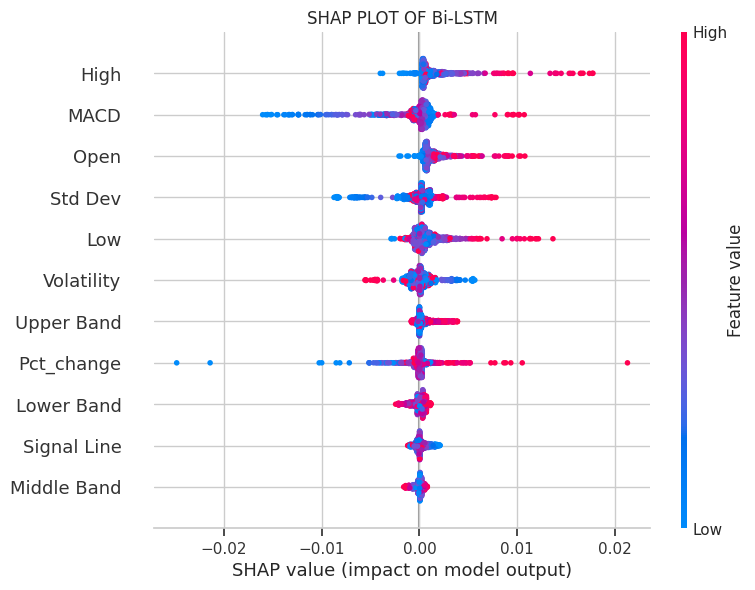

In [ ]:
shap.summary_plot(shap_values_2D, x_test_2d, show = False)
plt.title("SHAP PLOT OF Bi-LSTM", loc='center')
plt.show()

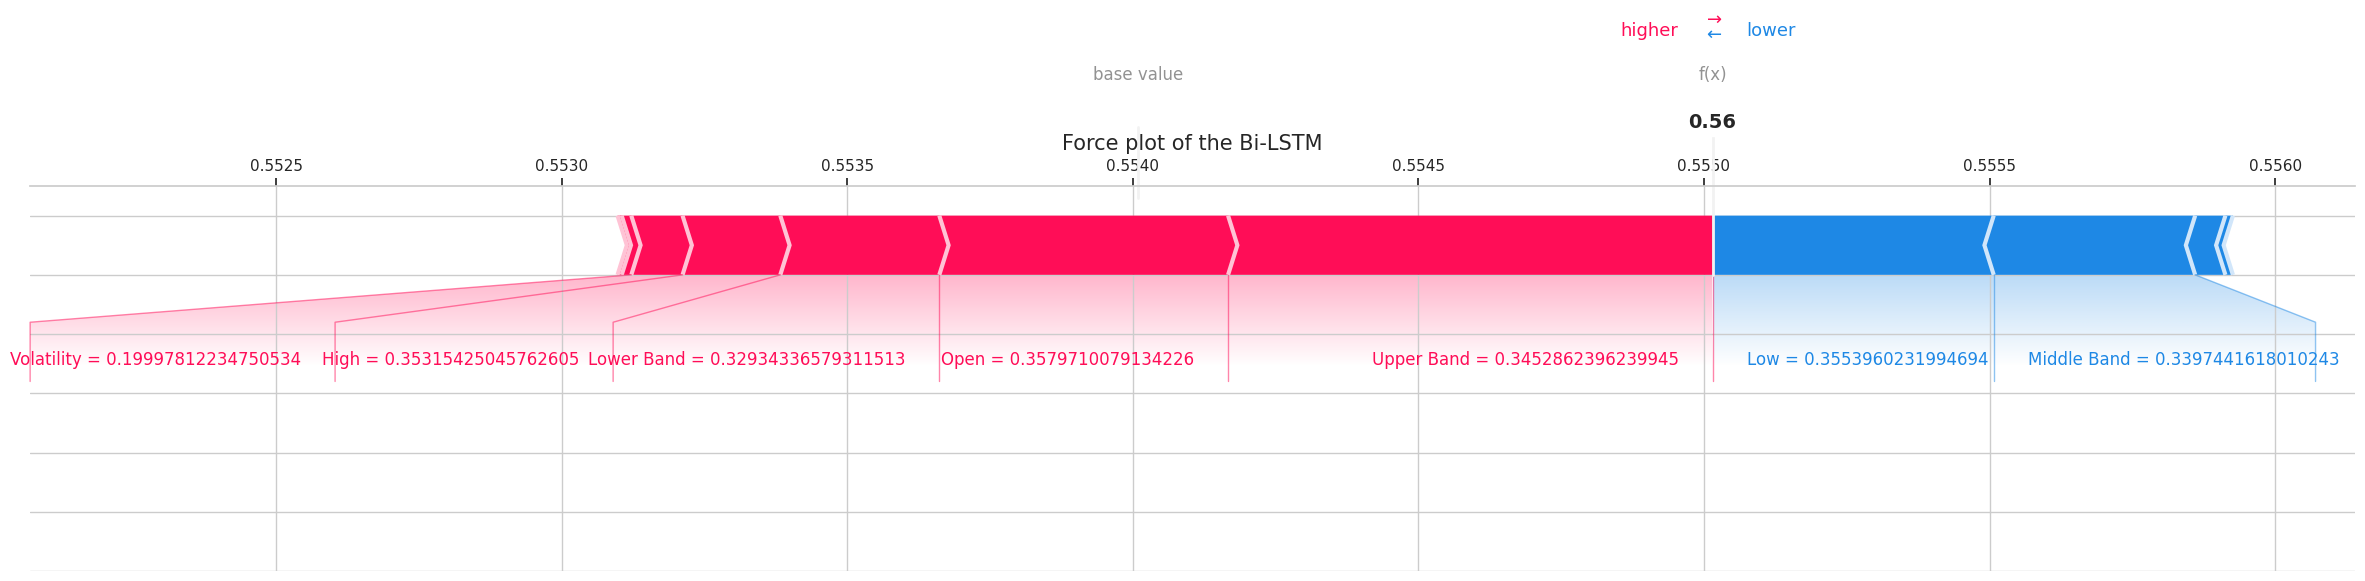

In [ ]:
#Obtain Force Plot
expected_value_bi = explainer_stock.expected_value[0]

instance_index = 0

shap.force_plot(expected_value_bi, shap_values_2D[instance_index], x_test_2d.iloc[instance_index],
                link='logit', matplotlib=True, show = False,figsize=(30,5))

plt.title("Force plot of the Bi-LSTM",fontsize=15)
plt.show()

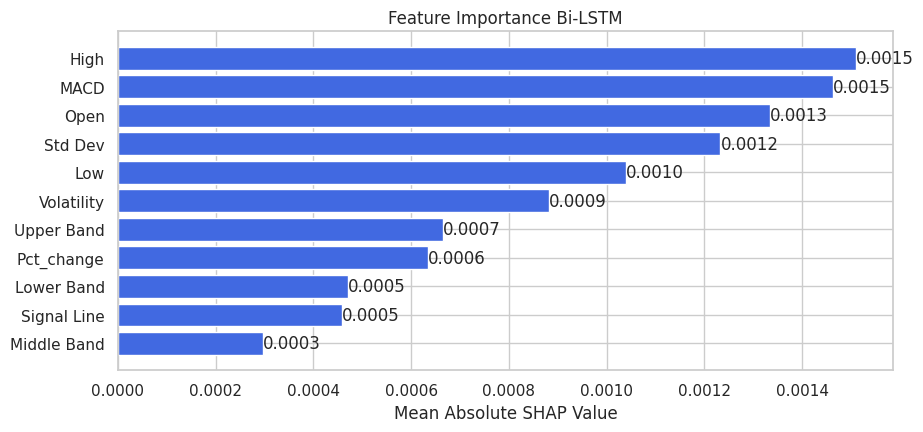

In [ ]:
# Compute the mean absolute SHAP values for each feature
mean_shap_values_bi = np.abs(shap_values_2D).mean(axis=0)

# Sorting the features based on their mean absolute SHAP values
sorted_indices_bi = np.argsort(mean_shap_values_bi)[::-1]
sorted_features_bi = x_test_2d.columns[sorted_indices_bi]
sorted_shap_values_bi = mean_shap_values_bi[sorted_indices_bi]

# Create the bar plot
plt.figure(figsize=(10, len(sorted_features_bi) * 0.4))
plt.barh(sorted_features_bi, sorted_shap_values_bi, color='royalblue')
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance Bi-LSTM')

# Annotate each bar with its exact value
for index, value in enumerate(sorted_shap_values_bi):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Building Single Layered LSTM model

In [ ]:
def build_single_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape= input_shape))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2])
single_lstm_model = build_single_lstm_model(input_shape)
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
# Train the model

single_history = single_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

Train on 1747 samples, validate on 100 samples
Epoch 1/50
1747/1747 [==============================] - 1s 722us/sample - loss: 0.0038 - val_loss: 6.4454e-04
Epoch 2/50
  32/1747 [..............................] - ETA: 1s - loss: 0.0019

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1747/1747 [==============================] - 1s 442us/sample - loss: 0.0011 - val_loss: 3.8845e-04
Epoch 3/50
1747/1747 [==============================] - 1s 439us/sample - loss: 0.0011 - val_loss: 3.8565e-04
Epoch 4/50
1747/1747 [==============================] - 1s 424us/sample - loss: 0.0014 - val_loss: 3.5384e-04
Epoch 5/50
1747/1747 [==============================] - 1s 430us/sample - loss: 9.5714e-04 - val_loss: 4.0198e-04
Epoch 6/50
1747/1747 [==============================] - 1s 550us/sample - loss: 9.5965e-04 - val_loss: 0.0011
Epoch 7/50
1747/1747 [==============================] - 1s 807us/sample - loss: 8.2753e-04 - val_loss: 3.8302e-04
Epoch 8/50
1747/1747 [==============================] - 1s 615us/sample - loss: 8.3502e-04 - val_loss: 4.2642e-04
Epoch 9/50
1747/1747 [==============================] - 1s 432us/sample - loss: 7.2765e-04 - val_loss: 7.7370e-04
Epoch 10/50
1747/1747 [==============================] - 1s 438us/sample - loss: 8.2870e-04 - val_loss: 3.2617e-04


In [ ]:
single_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               71680     
                                                                 
 dense_2 (Dense)             (None, 25)                3225      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 74931 (292.70 KB)
Trainable params: 74931 (292.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


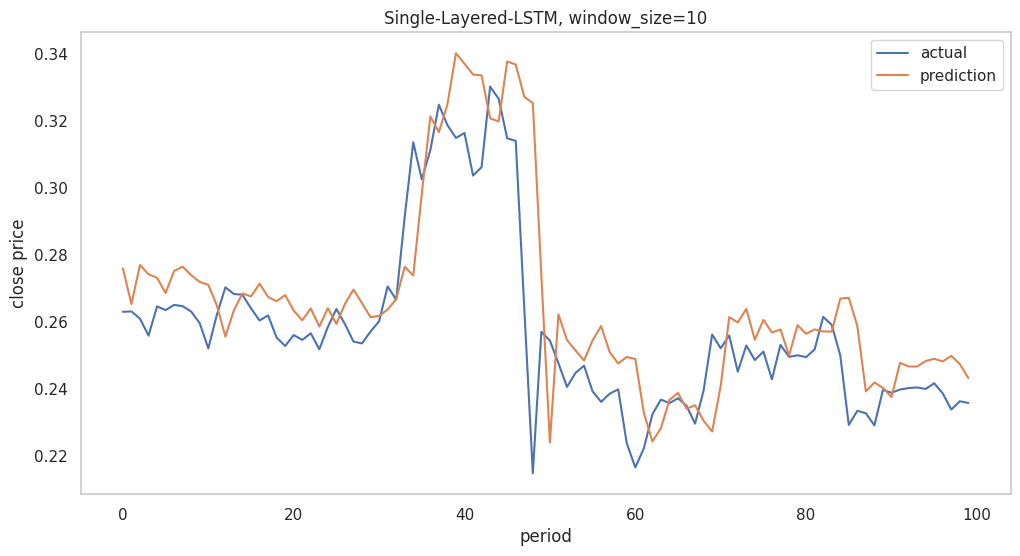

In [ ]:
single_pred = single_lstm_model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.title('Single-Layered-LSTM, window_size=10')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(single_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()


In [ ]:
y_single_pred_original = y_scaler.inverse_transform(single_pred)
y_single_test_original = y_scaler.inverse_transform(y_test)

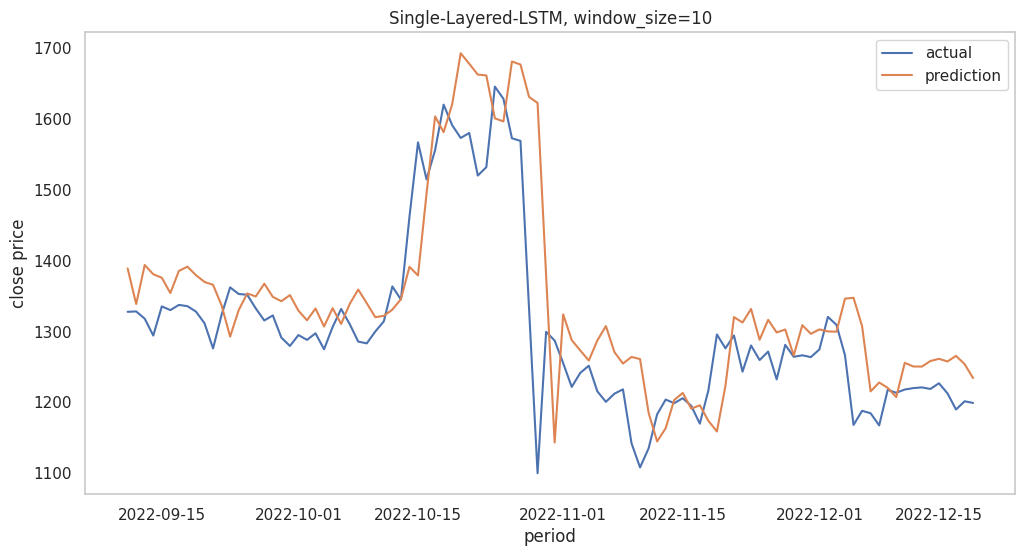

In [ ]:
## Real values of prediction
plt.figure(figsize=(12, 6))
plt.title('Single-Layered-LSTM, window_size=10')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(date_values_bi,y_single_test_original, label='actual')
plt.plot(date_values_bi,y_single_pred_original, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [ ]:
# Calculate error metrics
real_rmse_single = np.sqrt(mean_squared_error(y_single_test_original, y_single_pred_original))
real_mae_single = mean_absolute_error(y_single_test_original, y_single_pred_original)
real_mape_single = mean_absolute_percentage_error(y_single_test_original, y_single_pred_original)

# Print each value
print("RMSE of Single-Layered-LSTM :", real_rmse_single)
print("MAE of Single-Layered-LSTM :", real_mae_single)
print("MAPE of Single-Layered-LSTM :", real_mape_single)

RMSE of Single-Layered-LSTM : 88.685034818599
MAE of Single-Layered-LSTM : 59.65566772460937
MAPE of Single-Layered-LSTM : 0.04637761381057635


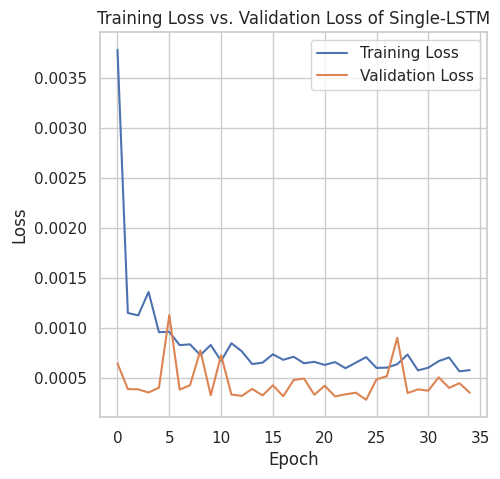

In [ ]:
# Plot the training loss and validation loss over the epochs
plt.figure(figsize=(5, 5))
plt.plot(single_history.history['loss'])
plt.plot(single_history.history['val_loss'])
plt.title('Training Loss vs. Validation Loss of Single-LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# SHAP for Single Layer

In [ ]:
# Use the training data for deep explainer
explainer_stock_single = shap.DeepExplainer(single_lstm_model, X_train)
shap_values_stock_single = explainer_stock_single.shap_values(X_test)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
shap_values_stock_single[0][0].shape

(10, 11)

In [ ]:
shap_values_single_2D = shap_values_stock_single[0].reshape(-1,11)
X_test_single_2D = X_test.reshape(-1,11)

shap_values_single_2D.shape, X_test_single_2D.shape

((1000, 11), (1000, 11))

In [ ]:
X_test_single_2D

array([[0.35797101, 0.35315425, 0.35539602, ..., 0.13084514, 0.34528624,
        0.32934337],
       [0.35503156, 0.35220418, 0.3485201 , ..., 0.13450902, 0.34683021,
        0.32877431],
       [0.34484865, 0.34546636, 0.3195545 , ..., 0.13356395, 0.34577774,
        0.32815641],
       ...,
       [0.24009533, 0.23752511, 0.24411111, ..., 0.06108601, 0.24975689,
        0.26287719],
       [0.24180232, 0.2382416 , 0.2422902 , ..., 0.06155254, 0.24968255,
        0.26248805],
       [0.23878685, 0.23464446, 0.23793366, ..., 0.06112505, 0.24861952,
        0.26152246]])

In [ ]:
features  = df.columns[:-1]
#features = df.columns
XX = df[features]

In [ ]:
mapping_dict = {f: column_name for f, column_name in zip(features, XX.columns)}
actual_column_names = [mapping_dict[feature_name] for feature_name in features]

In [ ]:
x_test_single_2d = pd.DataFrame(data=X_test_single_2D, columns = actual_column_names)

In [ ]:
actual_column_names

['Open',
 'High',
 'Low',
 'Pct_change',
 'MACD',
 'Signal Line',
 'Volatility',
 'Middle Band',
 'Std Dev',
 'Upper Band',
 'Lower Band']

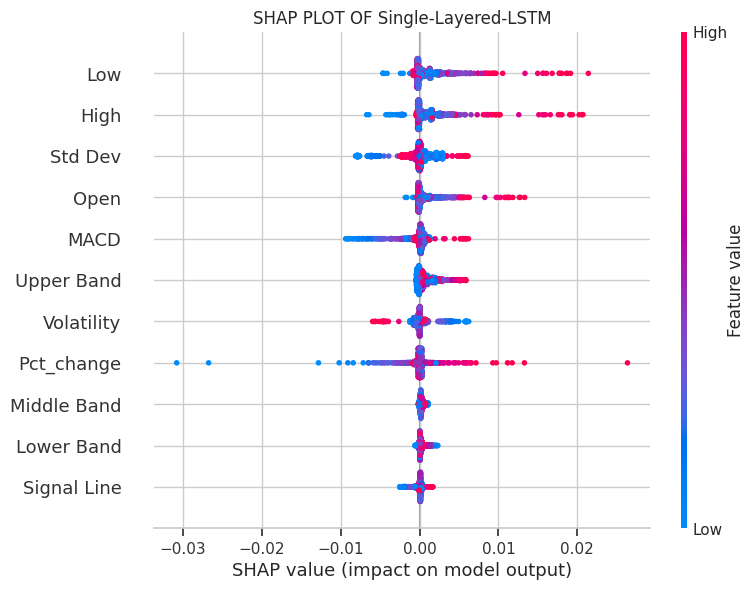

In [ ]:
shap.summary_plot(shap_values_single_2D, x_test_single_2d, show = False)
plt.title("SHAP PLOT OF Single-Layered-LSTM", loc='center')
plt.show()

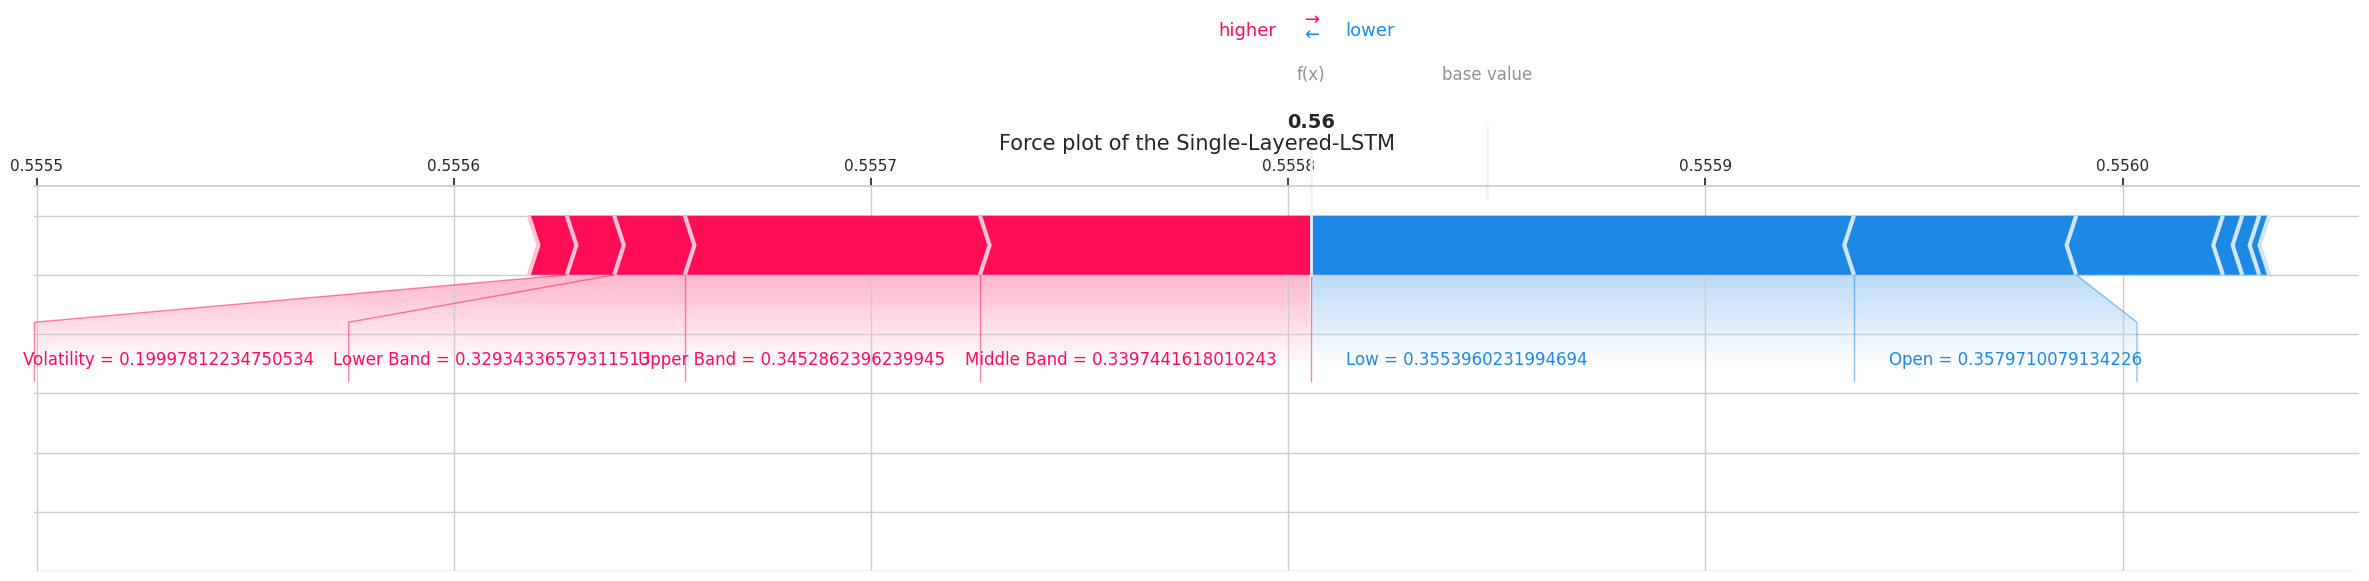

In [ ]:
#Obtain Force Plot
expected_value_single = explainer_stock_single.expected_value[0]

instance_index = 0

shap.force_plot(expected_value_single, shap_values_single_2D[instance_index], x_test_single_2d.iloc[instance_index],
                link='logit', matplotlib=True, show = False,figsize=(30,5))

plt.title("Force plot of the Single-Layered-LSTM", fontsize=15)
plt.show()

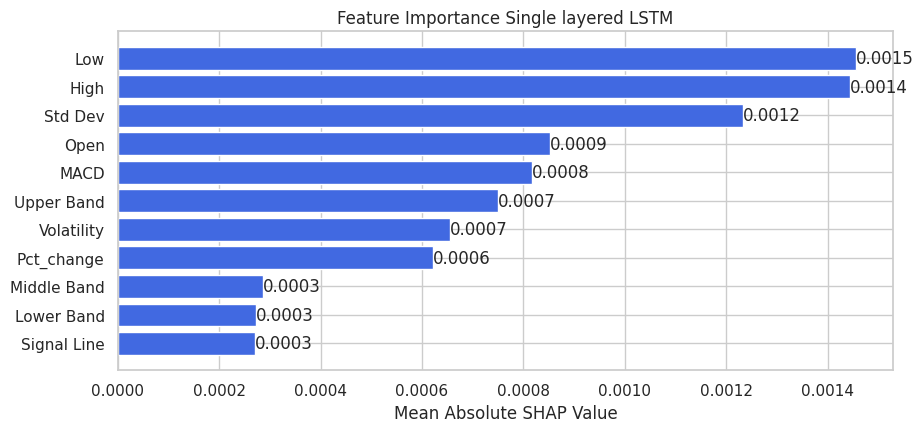

In [ ]:
# Compute the mean absolute SHAP values for each feature
mean_shap_values_sin = np.abs(shap_values_single_2D).mean(axis=0)

# Sorting the features based on their mean absolute SHAP values
sorted_indices_sin = np.argsort(mean_shap_values_sin)[::-1]
sorted_features_sin = x_test_single_2d.columns[sorted_indices_sin]
sorted_shap_values_sin = mean_shap_values_sin[sorted_indices_sin]

# Create the bar plot
plt.figure(figsize=(10, len(sorted_features_sin) * 0.4))
plt.barh(sorted_features_sin, sorted_shap_values_sin, color='royalblue')
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance Single layered LSTM')

# Annotate each bar with its exact value
for index, value in enumerate(sorted_shap_values_sin):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Testing with PCA data

In [ ]:
df_pca = yf.download('ETH-USD', start='2012-01-01', end='2022-12-31')
#df = pd.read_csv("/Users/parkjs9416/Documents/Dissertation/Dissertation_project_code_and_data/Dataset/sp500_10year_data.csv")
df_pca

[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-09   308.644989   329.451996   307.056000   320.884003   320.884003   
2017-11-10   320.670990   324.717987   294.541992   299.252991   299.252991   
2017-11-11   298.585999   319.453003   298.191986   314.681000   314.681000   
2017-11-12   314.690002   319.153015   298.513000   307.907990   307.907990   
2017-11-13   307.024994   328.415009   307.024994   316.716003   316.716003   
...                 ...          ...          ...          ...          ...   
2022-12-26  1218.920166  1226.974365  1214.335938  1226.974365  1226.974365   
2022-12-27  1226.987061  1230.418091  1205.895630  1212.791626  1212.791626   
2022-12-28  1212.736572  1213.128906  1185.702148  1189.986084  1189.986084   
2022-12-29  1190.010132  1204.141602  1188.360229  1201.595337  1201.595337   
2022-12-30  1201.569580  1202.034668  1187.462524  1199.232788  1199.232788   

                Volume  
Date                    
2017-11-09   893249984  
2017-11-10   885985984  
2017-11-11   842300992  
2017-11-12  1613479936  
2017-11-13  1041889984  
...                ...  
2022-12-26  3282098400  
2022-12-27  4091530737  
2022-12-28  4991669631  
2022-12-29  4132233940  
2022-12-30  4055668253  

[1878 rows x 6 columns]

In [ ]:
df_pca_reset = df_pca.reset_index()

In [ ]:
#Making the percentage changes in each day
df_pca['Pct_change'] = df_pca['Close'].pct_change()
# data['Pct_change'] = np.log(1+data['Pct_change'])
df_pca['Pct_change'] = np.log1p(df_pca['Pct_change'])
# Choose the desired time periods for the moving averages
short_period = 12  # Short-term EMA period
long_period = 26  # Long-term EMA period
signal_period = 9  # Signal line EMA period

# Calculate the short-term EMA
df_pca['Short EMA'] = df_pca['Close'].ewm(span=short_period, adjust=False).mean()

# Calculate the long-term EMA
df_pca['Long EMA'] = df_pca['Close'].ewm(span=long_period, adjust=False).mean()

# Calculate the MACD line
df_pca['MACD'] = df_pca['Short EMA'] - df_pca['Long EMA']

# Calculate the signal line
df_pca['Signal Line'] = df_pca['MACD'].ewm(span=signal_period, adjust=False).mean()

# Calculate the MACD histogram
df_pca['MACD Histogram'] = df_pca['MACD'] - df_pca['Signal Line']
# Choose the desired time period for the moving average and standard deviation
window = 20  # Number of Trading days in a month
num_std = 2
# 2 standard deviations above and below the middle band provides
#a range that encompasses a large portion of typical price movements

# Calculate the logarithmic returns
df_pca['Log Returns'] = np.log(df_pca['Close'] / df_pca['Close'].shift(1))

# Calculate the volatility
df_pca['Volatility'] = df_pca['Log Returns'].rolling(window=20).std() * np.sqrt(252)

# Calculate the middle band (simple moving average)
df_pca['Middle Band'] = df_pca['Close'].rolling(window=window).mean()

# Calculate the standard deviation of the closing prices
df_pca['Std Dev'] = df_pca['Close'].rolling(window=window).std()

# Calculate the upper band and lower band
df_pca['Upper Band'] = df_pca['Middle Band'] + (num_std * df_pca['Std Dev'])
df_pca['Lower Band'] = df_pca['Middle Band'] - (num_std * df_pca['Std Dev'])

#Making Next day's close price column in each date.
df_pca['Next_day'] = df_pca['Close'].shift(-1)


# Display the updated DataFrame with the Bollinger Bands columns
df_pca

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-09   308.644989   329.451996   307.056000   320.884003   320.884003   
2017-11-10   320.670990   324.717987   294.541992   299.252991   299.252991   
2017-11-11   298.585999   319.453003   298.191986   314.681000   314.681000   
2017-11-12   314.690002   319.153015   298.513000   307.907990   307.907990   
2017-11-13   307.024994   328.415009   307.024994   316.716003   316.716003   
...                 ...          ...          ...          ...          ...   
2022-12-26  1218.920166  1226.974365  1214.335938  1226.974365  1226.974365   
2022-12-27  1226.987061  1230.418091  1205.895630  1212.791626  1212.791626   
2022-12-28  1212.736572  1213.128906  1185.702148  1189.986084  1189.986084   
2022-12-29  1190.010132  1204.141602  1188.360229  1201.595337  1201.595337   
2022-12-30  1201.569580  1202.034668  1187.462524  1199.232788  1199.232788   

                Volume  Pct_change    Short EMA     Long EMA       MACD  \
Date                                                                      
2017-11-09   893249984         NaN   320.884003   320.884003   0.000000   
2017-11-10   885985984   -0.069790   317.556155   319.281706  -1.725551   
2017-11-11   842300992    0.050270   317.113823   318.940912  -1.827089   
2017-11-12  1613479936   -0.021758   315.697541   318.123659  -2.426118   
2017-11-13  1041889984    0.028204   315.854228   318.019388  -2.165161   
...                ...         ...          ...          ...        ...   
2022-12-26  3282098400    0.006552  1222.485810  1234.654119 -12.168309   
2022-12-27  4091530737   -0.011626  1220.994397  1233.034675 -12.040278   
2022-12-28  4991669631   -0.018983  1216.223888  1229.845890 -13.622003   
2022-12-29  4132233940    0.009709  1213.973341  1227.753257 -13.779915   
2022-12-30  4055668253   -0.001968  1211.705564  1225.640629 -13.935066   

            Signal Line  MACD Histogram  Log Returns  Volatility  Middle Band  \
Date                                                                            
2017-11-09     0.000000        0.000000          NaN         NaN          NaN   
2017-11-10    -0.345110       -1.380441    -0.069790         NaN          NaN   
2017-11-11    -0.641506       -1.185583     0.050270         NaN          NaN   
2017-11-12    -0.998428       -1.427690    -0.021758         NaN          NaN   
2017-11-13    -1.231775       -0.933386     0.028204         NaN          NaN   
...                 ...             ...          ...         ...          ...   
2022-12-26   -13.313787        1.145479     0.006552    0.430237  1236.220313   
2022-12-27   -13.059085        1.018808    -0.011626    0.417804  1235.238019   
2022-12-28   -13.171669       -0.450334    -0.018983    0.394964  1230.681506   
2022-12-29   -13.293318       -0.486597     0.009709    0.396009  1227.547034   
2022-12-30   -13.421668       -0.513398    -0.001968    0.395707  1224.189465   

              Std Dev   Upper Band   Lower Band     Next_day  
Date                                                          
2017-11-09        NaN          NaN          NaN   299.252991  
2017-11-10        NaN          NaN          NaN   314.681000  
2017-11-11        NaN          NaN          NaN   307.907990  
2017-11-12        NaN          NaN          NaN   316.716003  
2017-11-13        NaN          NaN          NaN   337.631012  
...               ...          ...          ...          ...  
2022-12-26  43.327745  1322.875803  1149.564822  1212.791626  
2022-12-27  43.639596  1322.517211  1147.958827  1189.986084  
2022-12-28  43.353841  1317.389188  1143.973825  1201.595337  
2022-12-29  43.061694  1313.670422  1141.423645  1199.232788  
2022-12-30  42.488258  1309.165982  1139.212949          NaN  

[1878 rows x 19 columns]

In [ ]:
df_pca.isnull().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Pct_change         1
Short EMA          0
Long EMA           0
MACD               0
Signal Line        0
MACD Histogram     0
Log Returns        1
Volatility        20
Middle Band       19
Std Dev           19
Upper Band        19
Lower Band        19
Next_day           1
dtype: int64

In [ ]:
df_pca=df_pca.dropna()

# Making PCA dataset

In [ ]:
scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Pct_change', 'MACD','Signal Line','Volatility','Middle Band', 'Std Dev',
       'Upper Band', 'Lower Band', 'Next_day']

scaled_df_pca = scaler.fit_transform(df_pca[scale_cols])

scaled_df_pca = pd.DataFrame(scaled_df_pca, columns=scale_cols)

print(scaled_df_pca)

          Open      High       Low  Pct_change      MACD  Signal Line  \
0     0.082315  0.090914  0.073835    0.572715  0.463765     0.465773   
1     0.073413  0.079094  0.068694    0.758190  0.462639     0.468150   
2     0.076374  0.080574  0.074534    0.755293  0.463217     0.470183   
3     0.080954  0.081329  0.080649    0.692684  0.462815     0.471717   
4     0.080288  0.082697  0.079613    0.707734  0.462212     0.472807   
...        ...       ...       ...         ...       ...          ...   
1852  0.240572  0.236806  0.241821    0.698866  0.398494     0.404301   
1853  0.240095  0.237525  0.244111    0.709488  0.400333     0.404722   
1854  0.241802  0.238242  0.242290    0.686345  0.400497     0.405096   
1855  0.238787  0.234644  0.237934    0.676979  0.398464     0.404931   
1856  0.233978  0.232775  0.238507    0.713507  0.398261     0.404752   

      Volatility  Middle Band   Std Dev  Upper Band  Lower Band  Next_day  
0       0.290080     0.063604  0.091845    0.08

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaled_df_pca

Open      High       Low  Pct_change      MACD  Signal Line  \
0     0.082315  0.090914  0.073835    0.572715  0.463765     0.465773   
1     0.073413  0.079094  0.068694    0.758190  0.462639     0.468150   
2     0.076374  0.080574  0.074534    0.755293  0.463217     0.470183   
3     0.080954  0.081329  0.080649    0.692684  0.462815     0.471717   
4     0.080288  0.082697  0.079613    0.707734  0.462212     0.472807   
...        ...       ...       ...         ...       ...          ...   
1852  0.240572  0.236806  0.241821    0.698866  0.398494     0.404301   
1853  0.240095  0.237525  0.244111    0.709488  0.400333     0.404722   
1854  0.241802  0.238242  0.242290    0.686345  0.400497     0.405096   
1855  0.238787  0.234644  0.237934    0.676979  0.398464     0.404931   
1856  0.233978  0.232775  0.238507    0.713507  0.398261     0.404752   

      Volatility  Middle Band   Std Dev  Upper Band  Lower Band  Next_day  
0       0.290080     0.063604  0.091845    0.080644    0.045277  0.076739  
1       0.264364     0.065271  0.090039    0.081676    0.047654  0.080848  
2       0.262756     0.066983  0.090061    0.083256    0.049486  0.080194  
3       0.258667     0.068737  0.087586    0.084182    0.052172  0.080703  
4       0.259248     0.070419  0.084750    0.084942    0.054898  0.081623  
...          ...          ...       ...         ...         ...       ...  
1852    0.096422     0.257356  0.062051    0.250487    0.263106  0.241692  
1853    0.096015     0.256852  0.061086    0.249757    0.262877  0.238692  
1854    0.090217     0.256630  0.061553    0.249683    0.262488  0.233868  
1855    0.079565     0.255603  0.061125    0.248620    0.261522  0.236324  
1856    0.080052     0.254896  0.060688    0.247849    0.260905  0.235824  

[1857 rows x 12 columns]

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(scaled_df_pca)
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

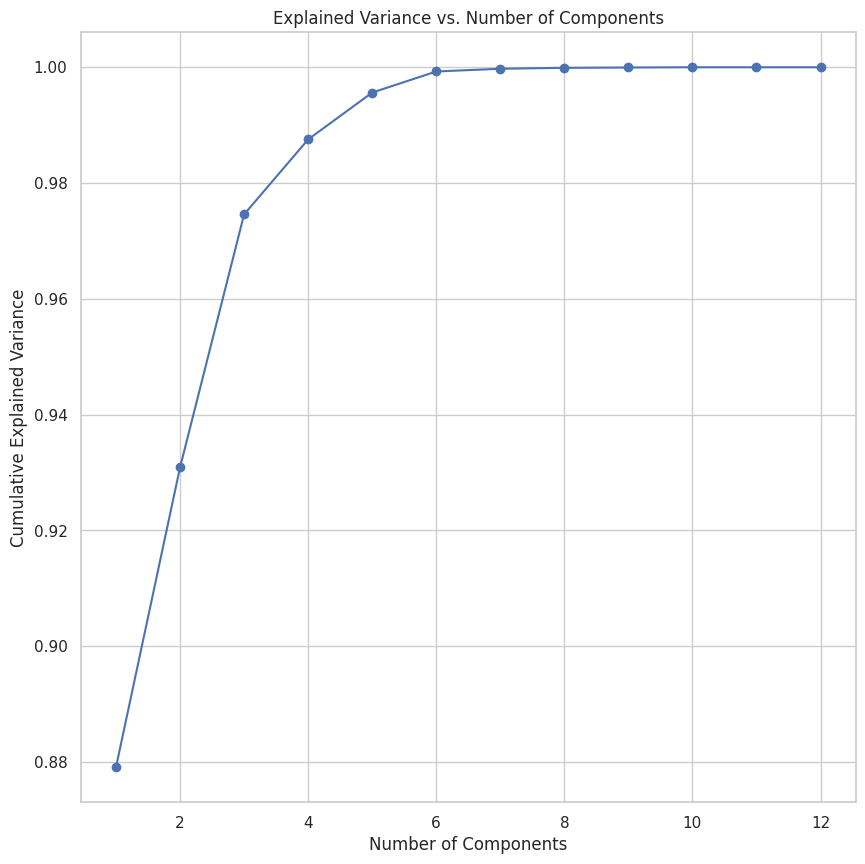

In [ ]:
# Plot the cumulative explained variance against the number of components
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
n_components = 6
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(scaled_df_pca)

In [ ]:
features = df_pca.columns[:-1]

In [ ]:
features = df.columns[:-1]

In [ ]:
# Access the principal components
principal_components = pca.components_

# Access the explained variance of each principal component
explained_variances = pca.explained_variance_ratio_

# Print the explained variance of each principal component
for i, explained_variance in enumerate(explained_variances):
    print(f"Principal Component {i+1}: {explained_variance:.4f}")

# Print the loadings of the original features on each principal component
for i, pc in enumerate(principal_components):
    print(f"Principal Component {i+1} Loadings:")
    for feature, loading in zip(features, pc):
        print(f"{feature}: {loading:.4f}")

Principal Component 1: 0.8791
Principal Component 2: 0.0518
Principal Component 3: 0.0437
Principal Component 4: 0.0130
Principal Component 5: 0.0081
Principal Component 6: 0.0036
Principal Component 1 Loadings:
Open: 0.3632
High: 0.3682
Low: 0.3566
Pct_change: -0.0012
MACD: 0.0232
Signal Line: 0.0301
Volatility: 0.0020
Middle Band: 0.3839
Std Dev: 0.1946
Upper Band: 0.4068
Lower Band: 0.3494
Principal Component 2 Loadings:
Open: -0.0672
High: -0.0712
Low: -0.0717
Pct_change: -0.0240
MACD: -0.6381
Signal Line: -0.6661
Volatility: 0.2815
Middle Band: 0.0967
Std Dev: 0.1417
Upper Band: 0.1281
Lower Band: 0.0579
Principal Component 3 Loadings:
Open: -0.0215
High: -0.0042
Low: -0.0441
Pct_change: 0.0003
MACD: 0.1981
Signal Line: 0.2456
Volatility: 0.8364
Middle Band: -0.0524
Std Dev: 0.3967
Upper Band: 0.0618
Lower Band: -0.1848
Principal Component 4 Loadings:
Open: -0.0600
High: -0.0383
Low: -0.0731
Pct_change: 0.0598
MACD: 0.0021
Signal Line: -0.0181
Volatility: -0.4663
Middle Band: -0.0

In [ ]:
X_pca_df = pd.DataFrame(X_pca)
X_pca_df

0         1         2         3         4         5
0    -0.405471 -0.051304  0.076213  0.002900  0.126120 -0.037455
1    -0.412085 -0.062170  0.054344  0.024974 -0.052369  0.008520
2    -0.406599 -0.064474  0.052973  0.024429 -0.049321  0.007866
3    -0.400685 -0.065635  0.047937  0.018974  0.011555 -0.005018
4    -0.399102 -0.066203  0.046944  0.016470 -0.002916  0.000276
...        ...       ...       ...       ...       ...       ...
1852  0.035235 -0.022565 -0.179757 -0.013687  0.003221  0.004512
1853  0.034341 -0.024643 -0.180028 -0.013686 -0.007028  0.005987
1854  0.032699 -0.025742 -0.184374 -0.011676  0.016592  0.003026
1855  0.028304 -0.026871 -0.193503 -0.006851  0.026018  0.003236
1856  0.024955 -0.027173 -0.193142 -0.004770 -0.009714  0.011257

[1857 rows x 6 columns]

From this, PCA transformation has been done, based on Elbow plot, it shows that 6 of PCA components can be sufficient amount
# Making as a sequence data and split test and train

In [ ]:
# Split x_pca into input sequences and target values
lookback = 10 #Using past 10 days'daily data of below columns'data to predict the 'Next_day' price
data_columns = [ 'Open', 'High', 'Low', 'Pct_change', 'MACD','Signal Line','Volatility' ,'Middle Band', 'Std Dev',
                'Upper Band', 'Lower Band']
target_columns = ['Next_day']

X_p = []
y_p = []
for i in range(len(X_pca) - lookback):
    X_p.append(X_pca[i:i+lookback])
    y_p.append(df_pca['Next_day'].values[i+lookback])

# Convert to numpy arrays
X_p = np.array(X_p)
y_p = np.array(y_p)

In [ ]:
# Scale the input sequences (X)
scaler = MinMaxScaler()
X_p = scaler.fit_transform(X_p.reshape(X_p.shape[0], -1))

# Scale the target variable (y)
y_scaler = MinMaxScaler()
y_p = y_scaler.fit_transform(y_p.reshape(-1, 1))

In [ ]:
# Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=100)
for train_index, test_index in tscv.split(X_p, y_p):
    X_p_train, X_p_test = X_p[train_index], X_p[test_index]
    y_p_train, y_p_test = y_p[train_index], y_p[test_index]

In [ ]:
X_p_train = X_p_train.reshape((X_p_train.shape[0], lookback, -1))
X_p_test = X_p_test.reshape((X_p_test.shape[0], lookback, -1))

In [ ]:
print(X_p_train.shape, X_p_test.shape)
print(y_p_train.shape, y_p_test.shape)

(1747, 10, 6) (100, 10, 6)
(1747, 1) (100, 1)


From this result, it shows that Splitting the dataset has been finished to make the dataset to build the PCA-Stacked-LSTM model.

# Building PCA-Stacked LSTM

In [ ]:
def build_stacked_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
input_shape = (X_p_train.shape[1], X_p_train.shape[2])  # Assuming X_p_train has the correct shape
stacked_lstm_model = build_stacked_lstm_model(input_shape)

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
# Train the model
#
history_pb = stacked_lstm_model.fit(X_p_train, y_p_train, epochs=50, batch_size=32,
                    validation_data=(X_p_test, y_p_test), callbacks=[early_stopping])


Train on 1747 samples, validate on 100 samples
Epoch 1/50
1747/1747 [==============================] - ETA: 0s - loss: 0.0088

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1747/1747 [==============================] - 2s 1ms/sample - loss: 0.0088 - val_loss: 7.9467e-04
Epoch 2/50
1747/1747 [==============================] - 1s 652us/sample - loss: 0.0018 - val_loss: 7.2344e-04
Epoch 3/50
1747/1747 [==============================] - 1s 647us/sample - loss: 0.0013 - val_loss: 7.3095e-04
Epoch 4/50
1747/1747 [==============================] - 1s 658us/sample - loss: 0.0012 - val_loss: 6.0502e-04
Epoch 5/50
1747/1747 [==============================] - 2s 1ms/sample - loss: 0.0010 - val_loss: 9.6702e-04
Epoch 6/50
1747/1747 [==============================] - 2s 872us/sample - loss: 0.0010 - val_loss: 6.6293e-04
Epoch 7/50
1747/1747 [==============================] - 1s 692us/sample - loss: 9.2171e-04 - val_loss: 5.2273e-04
Epoch 8/50
1747/1747 [==============================] - 2s 1ms/sample - loss: 8.6640e-04 - val_loss: 6.7352e-04
Epoch 9/50
1747/1747 [==============================] - 1s 742us/sample - loss: 9.0286e-04 - val_loss: 5.7875e-04
Epoch 10/50
174

In [ ]:
stacked_lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 128)           69120     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 120179 (469.45 KB)
Trainable params: 120179 (469.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
stacked_pred = stacked_lstm_model.predict(X_p_test)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


In [ ]:
y_pca_pred_original = y_scaler.inverse_transform(stacked_pred)
y_pca_test_original = y_scaler.inverse_transform(y_p_test)

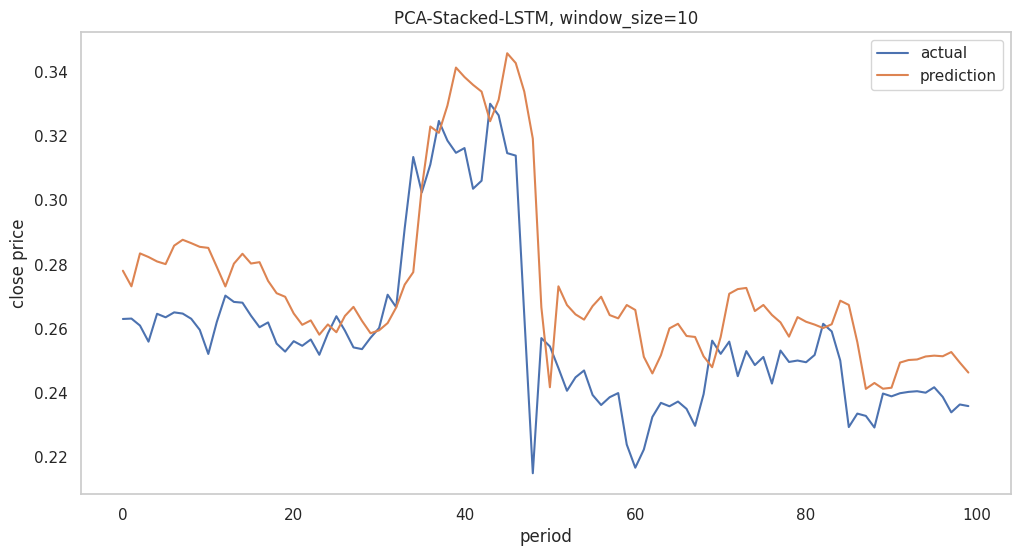

In [ ]:
#stacked_pred = stacked_lstm_model.predict(X_p_test)
plt.figure(figsize=(12, 6))
plt.title('PCA-Stacked-LSTM, window_size=10')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(y_p_test, label='actual')
plt.plot(stacked_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()
#Graph with scaled X and y

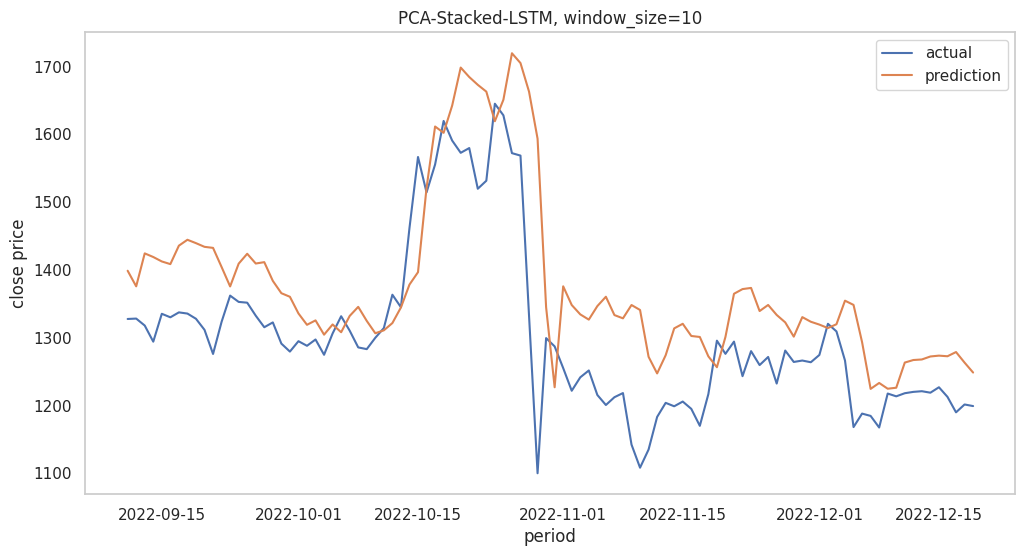

In [ ]:
#Real values of prediction
plt.figure(figsize=(12, 6))
plt.title('PCA-Stacked-LSTM, window_size=10')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(date_values_bi,y_pca_test_original, label='actual')
plt.plot(date_values_bi,y_pca_pred_original, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [ ]:
# Calculate error metrics
real_rmse_stacked = np.sqrt(mean_squared_error(y_pca_test_original, y_pca_pred_original))
real_mae_stacked = mean_absolute_error(y_pca_test_original, y_pca_pred_original)
real_mape_stacked = mean_absolute_percentage_error(y_pca_test_original, y_pca_pred_original)

# Print each value
print("RMSE of PCA-Stacked-LSTM :", real_rmse_stacked)
print("MAE of PCA-Stacked-LSTM :", real_mae_stacked)
print("MAPE of PCA-Stacked-LSTM :", real_mape_stacked)

RMSE of PCA-Stacked-LSTM : 106.70180657698542
MAE of PCA-Stacked-LSTM : 82.65448486328125
MAPE of PCA-Stacked-LSTM : 0.06487013844200461


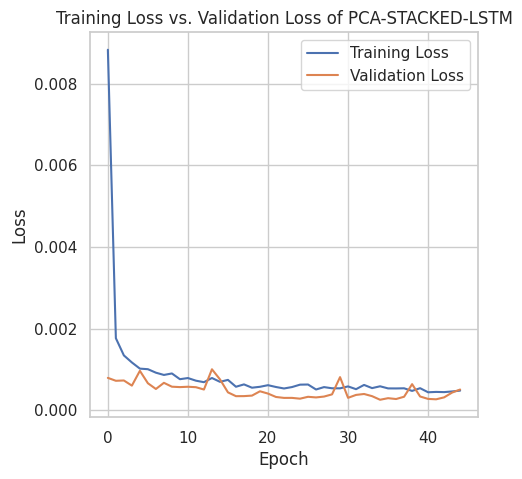

In [ ]:
# Plot the training loss and validation loss over the epochs
plt.figure(figsize=(5, 5))
plt.plot(history_pb.history['loss'])
plt.plot(history_pb.history['val_loss'])
plt.title('Training Loss vs. Validation Loss of PCA-STACKED-LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# SHAP of PCA LSTM

In [ ]:
# Use the training data for deep explainer => can use fewer instances
explainer_stock_pca = shap.DeepExplainer(stacked_lstm_model, X_p_train)
shap_values_stock_pca = explainer_stock_pca.shap_values(X_p_test)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
# Use the training data for deep explainer => can use fewer instances
shap_values_stock_pca[0][0].shape

(10, 6)

In [ ]:
shap_values_2D_pca = shap_values_stock_pca[0].reshape(-1,6)
X_p_test_2D = X_p_test.reshape(-1,6)

shap_values_2D_pca.shape, X_p_test_2D.shape

((1000, 6), (1000, 6))

In [ ]:
features = ['Principal_Component_' + str(i) for i in range(1, X_p_test.shape[-1]+1)]
features

['Principal_Component_1',
 'Principal_Component_2',
 'Principal_Component_3',
 'Principal_Component_4',
 'Principal_Component_5',
 'Principal_Component_6']

In [ ]:
X_p_test_2D = pd.DataFrame(data=X_p_test_2D, columns = features)

In [ ]:
X_p_test_2D

Principal_Component_1  Principal_Component_2  Principal_Component_3  \
0                 0.352377               0.478230               0.260271   
1                 0.347659               0.475518               0.267268   
2                 0.342478               0.487892               0.290912   
3                 0.329933               0.489987               0.293007   
4                 0.327817               0.502632               0.281112   
..                     ...                    ...                    ...   
995               0.248723               0.477154               0.160707   
996               0.248388               0.476336               0.159907   
997               0.248045               0.474705               0.159642   
998               0.247416               0.473842               0.155390   
999               0.245731               0.472956               0.146458   

     Principal_Component_4  Principal_Component_5  Principal_Component_6  
0                 0.379024               0.315419               0.255562  
1                 0.382096               0.346074               0.272878  
2                 0.362685               0.414024               0.271792  
3                 0.372905               0.272426               0.360655  
4                 0.372338               0.454400               0.318372  
..                     ...                    ...                    ...  
995               0.415675               0.315337               0.345947  
996               0.416590               0.318623               0.344306  
997               0.416592               0.308008               0.346792  
998               0.419067               0.332471               0.341804  
999               0.425009               0.342233               0.342156  

[1000 rows x 6 columns]

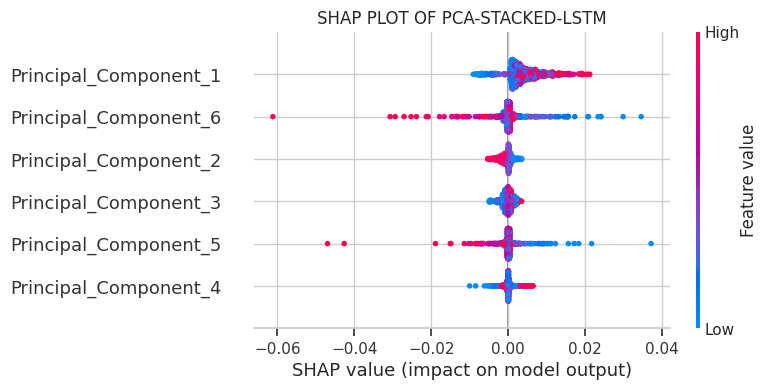

In [ ]:
shap.summary_plot(shap_values_2D_pca, X_p_test_2D, show = False)
plt.title("SHAP PLOT OF PCA-STACKED-LSTM", loc='center')
plt.show()

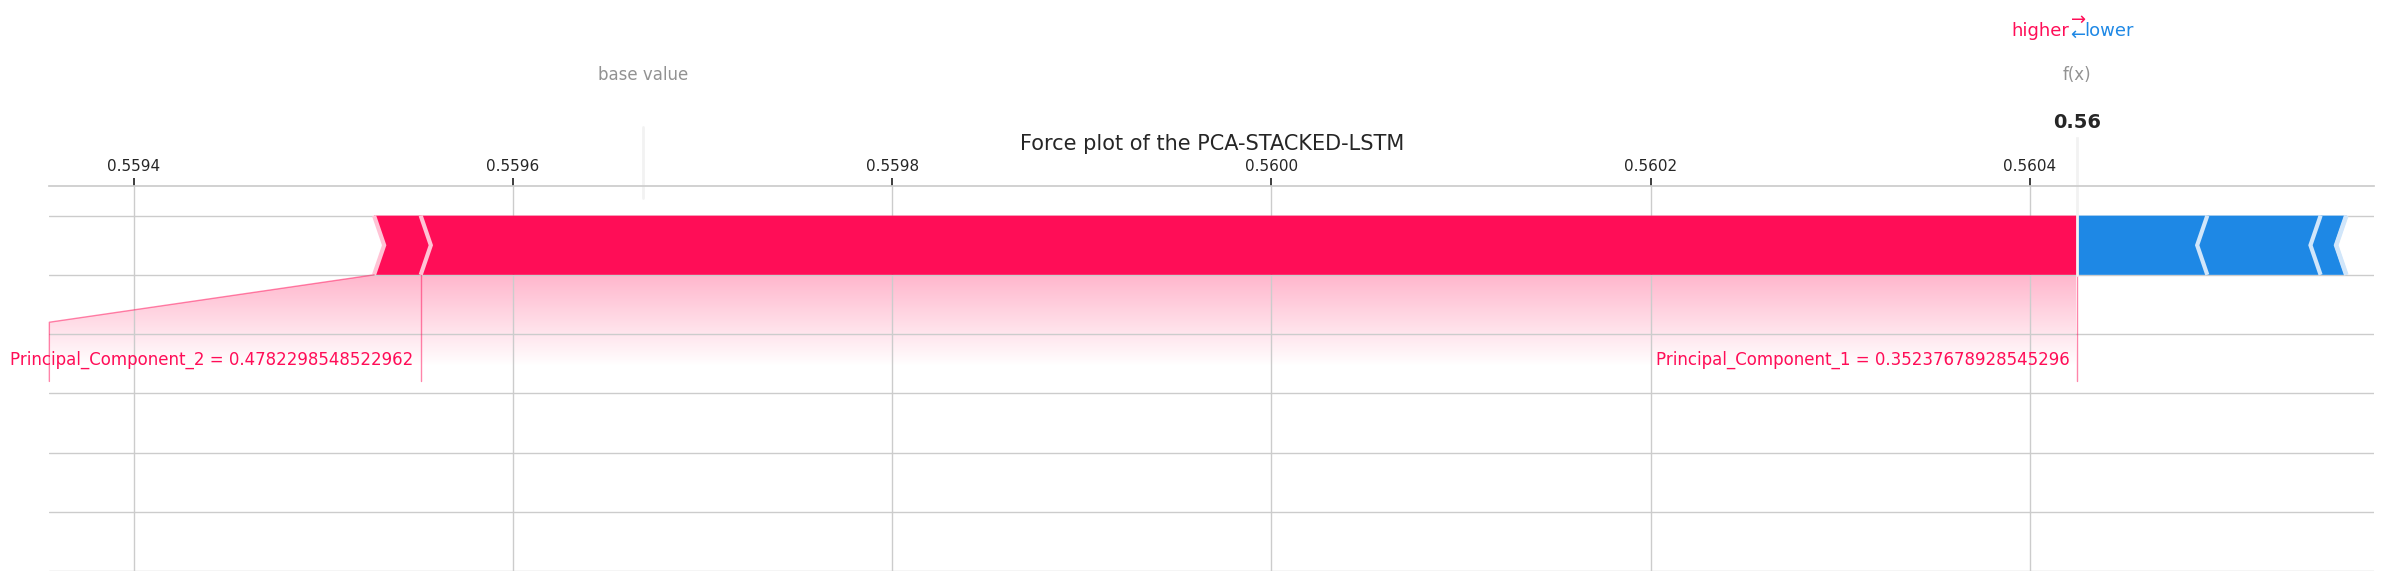

In [ ]:
#Force_plot of the PCA-LSTM
expected_value_stock_pca = explainer_stock_pca.expected_value[0]

instance_index = 0
shap.force_plot(expected_value_stock_pca, shap_values_2D_pca[instance_index], X_p_test_2D.iloc[instance_index],
                link='logit', matplotlib=True,show = False,figsize=(30,5))

plt.title("Force plot of the PCA-STACKED-LSTM",fontsize=15)
plt.show()


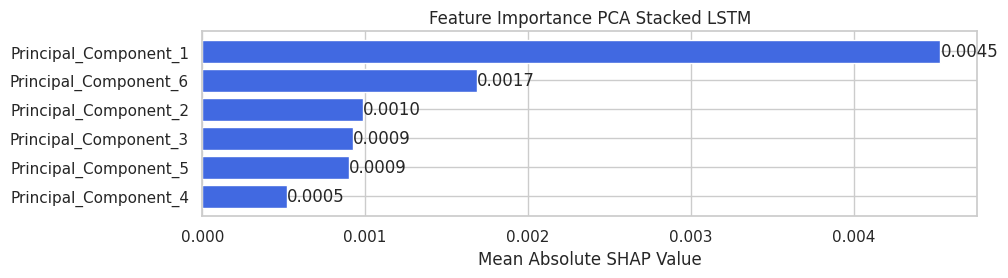

In [ ]:
# Compute the mean absolute SHAP values for each feature
mean_shap_values_pc = np.abs(shap_values_2D_pca).mean(axis=0)

# Sorting the features based on their mean absolute SHAP values
sorted_indices_pc = np.argsort(mean_shap_values_pc)[::-1]
sorted_features_pc = X_p_test_2D.columns[sorted_indices_pc]
sorted_shap_values_pc = mean_shap_values_pc[sorted_indices_pc]

# Create the bar plot
plt.figure(figsize=(10, len(sorted_features_pc) * 0.4))
plt.barh(sorted_features_pc, sorted_shap_values_pc, color='royalblue')
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance PCA Stacked LSTM')

# Annotate each bar with its exact value
for index, value in enumerate(sorted_shap_values_pc):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Regular Stacked LSTM Model

> บล็อกที่มีการเยื้อง



In [ ]:
def build_stacked_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2])  # Assuming X_p_train has the correct shape
normal_stacked_lstm_model = build_stacked_lstm_model(input_shape)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
# Train the model
history_RS = normal_stacked_lstm_model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])
#RS=Regular Stacked

Train on 1747 samples, validate on 100 samples
Epoch 1/50
1747/1747 [==============================] - ETA: 0s - loss: 0.0104

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1747/1747 [==============================] - 3s 2ms/sample - loss: 0.0104 - val_loss: 0.0012
Epoch 2/50
1747/1747 [==============================] - 1s 756us/sample - loss: 0.0017 - val_loss: 7.1912e-04
Epoch 3/50
1747/1747 [==============================] - 1s 655us/sample - loss: 0.0016 - val_loss: 0.0014
Epoch 4/50
1747/1747 [==============================] - 1s 650us/sample - loss: 0.0016 - val_loss: 5.6232e-04
Epoch 5/50
1747/1747 [==============================] - 1s 648us/sample - loss: 0.0014 - val_loss: 6.4568e-04
Epoch 6/50
1747/1747 [==============================] - 1s 638us/sample - loss: 0.0016 - val_loss: 5.4139e-04
Epoch 7/50
1747/1747 [==============================] - 1s 644us/sample - loss: 0.0012 - val_loss: 5.3189e-04
Epoch 8/50
1747/1747 [==============================] - 1s 642us/sample - loss: 0.0012 - val_loss: 6.1495e-04
Epoch 9/50
1747/1747 [==============================] - 1s 640us/sample - loss: 0.0010 - val_loss: 5.3950e-04
Epoch 10/50
1747/1747 [========

In [ ]:
normal_stacked_lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 128)           71680     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 25)                1625      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 122739 (479.45 KB)
Trainable params: 122739 (479.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
normal_stacked_pred = normal_stacked_lstm_model.predict(X_test)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


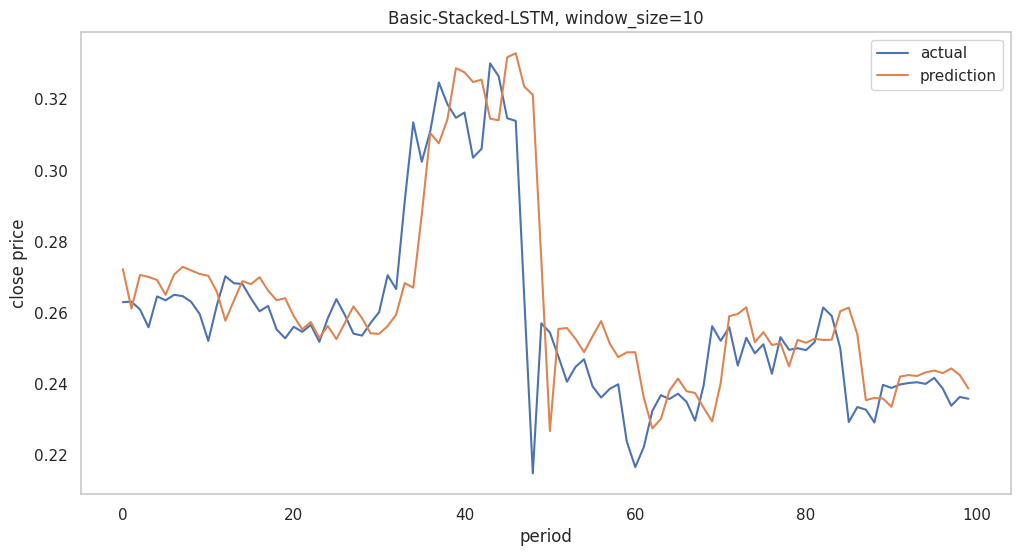

In [ ]:
#stacked_pred = stacked_lstm_model.predict(X_p_test)
plt.figure(figsize=(12, 6))
plt.title('Basic-Stacked-LSTM, window_size=10')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(normal_stacked_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [ ]:
y_nstacked_pred_original = y_scaler.inverse_transform(normal_stacked_pred)
y_nstacked_test_original = y_scaler.inverse_transform(y_test)

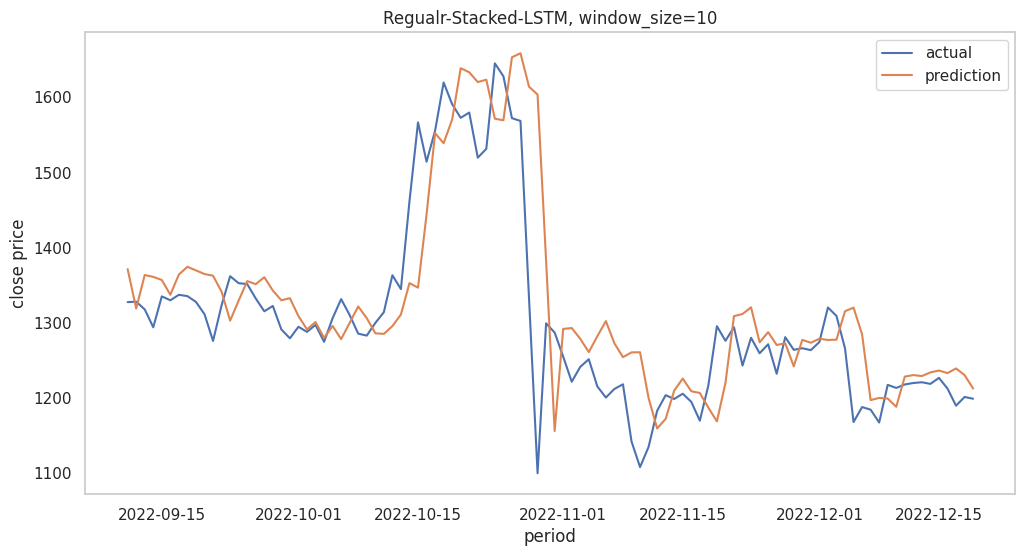

In [ ]:
#Real values of prediction
plt.figure(figsize=(12, 6))
plt.title('Regualr-Stacked-LSTM, window_size=10')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(date_values_bi,y_nstacked_test_original, label='actual')
plt.plot(date_values_bi,y_nstacked_pred_original, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

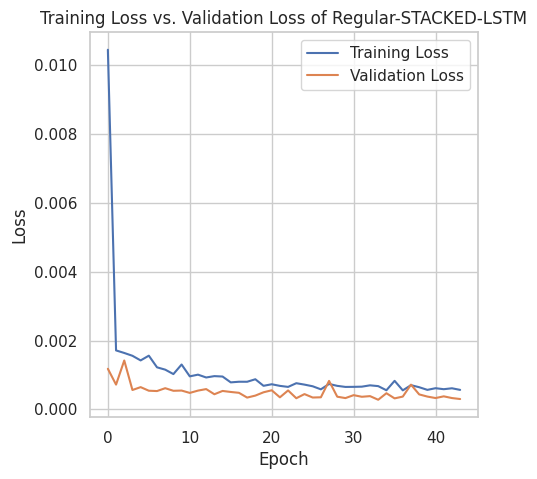

In [ ]:
# Plot the training loss and validation loss over the epochs
plt.figure(figsize=(5, 5))
plt.plot(history_RS.history['loss'])
plt.plot(history_RS.history['val_loss'])
plt.title('Training Loss vs. Validation Loss of Regular-STACKED-LSTM')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [ ]:
# Calculate error metrics
real_rmse_rstacked = np.sqrt(mean_squared_error(y_nstacked_test_original, y_nstacked_pred_original))
real_mae_rstacked = mean_absolute_error(y_nstacked_test_original, y_nstacked_pred_original)
real_mape_rstacked = mean_absolute_percentage_error(y_nstacked_test_original, y_nstacked_pred_original)

# Print each value
print("RMSE of Regular-Stacked-LSTM :", real_rmse_rstacked)
print("MAE of Regular-Stacked-LSTM :", real_mae_rstacked)
print("MAPE of Regular-Stacked-LSTM :", real_mape_rstacked)

RMSE of Regular-Stacked-LSTM : 81.93747657313074
MAE of Regular-Stacked-LSTM : 51.2630224609375
MAPE of Regular-Stacked-LSTM : 0.03973510659982456


# SHAP of Regular Stacked LSTM

In [ ]:
# Use the training data for deep explainer
explainer_stock_RS = shap.DeepExplainer(normal_stacked_lstm_model, X_train)
shap_values_stock_RS = explainer_stock_RS.shap_values(X_test)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
shap_values_stock_RS[0][0].shape

(10, 11)

In [ ]:
shap_values_RS_2D = shap_values_stock_RS[0].reshape(-1,11)
X_test_RS_2D = X_test.reshape(-1,11)

shap_values_RS_2D.shape, X_test_RS_2D.shape

((1000, 11), (1000, 11))

In [ ]:
X_test_RS_2D = pd.DataFrame(data=X_test_RS_2D, columns = actual_column_names)

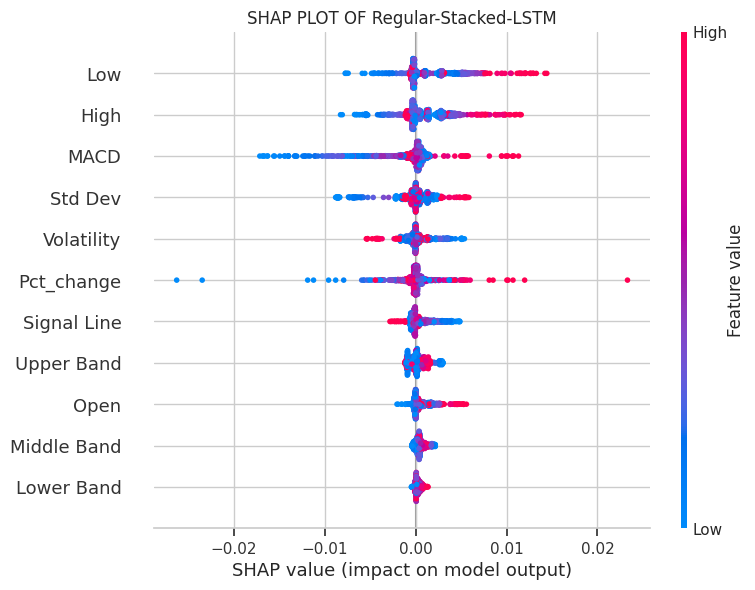

In [ ]:
shap.summary_plot(shap_values_RS_2D, X_test_RS_2D, show = False)
plt.title("SHAP PLOT OF Regular-Stacked-LSTM", loc='center')
plt.show()

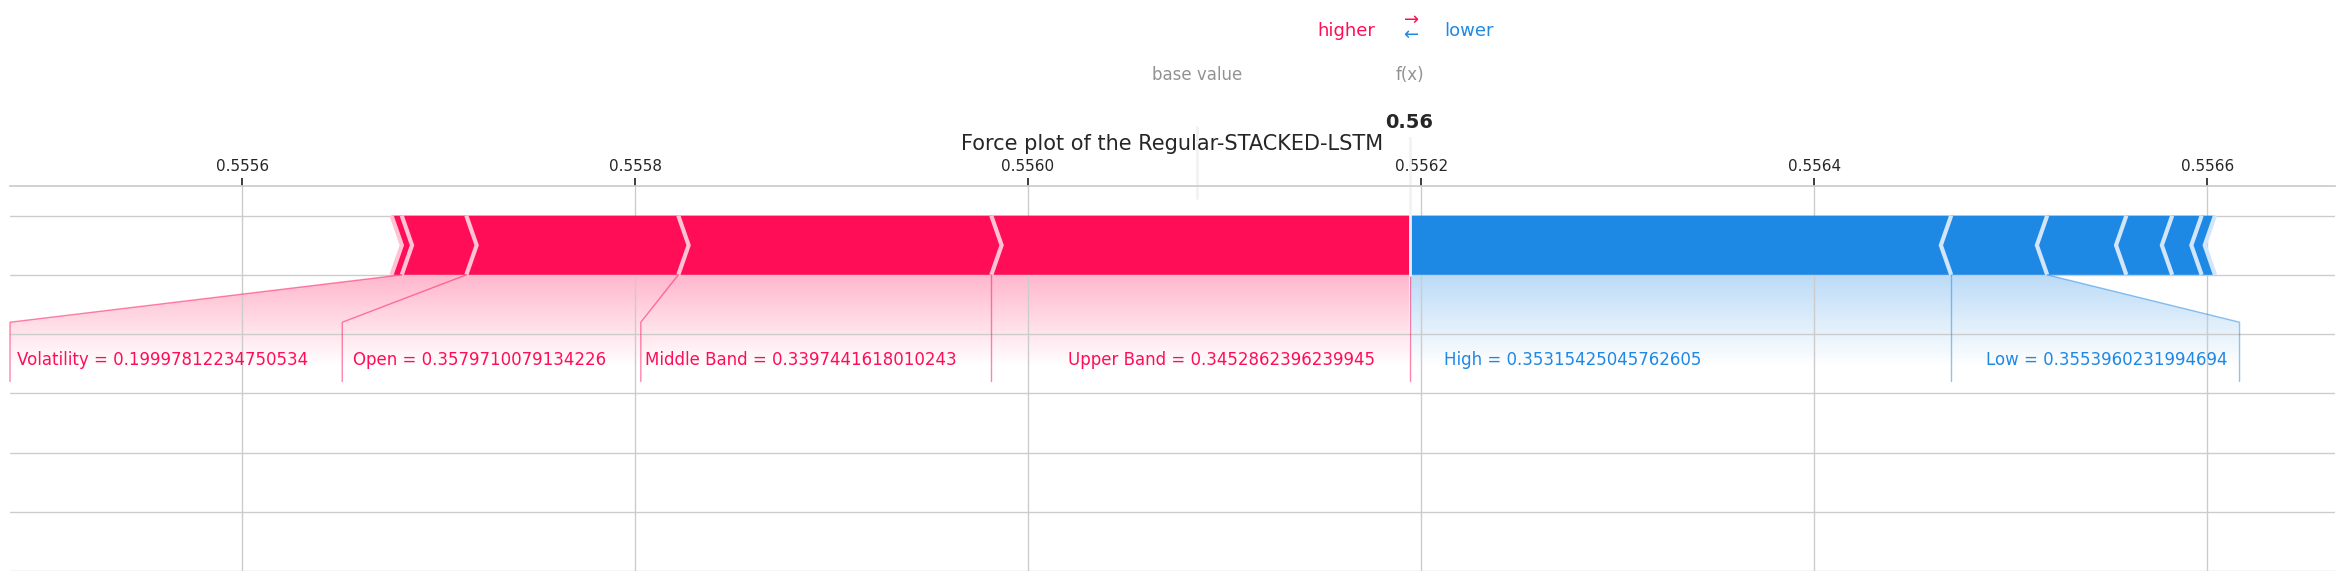

In [ ]:
#Force_plot of the PCA-LSTM
expected_value_stock_RS = explainer_stock_RS.expected_value[0]

instance_index = 0
shap.force_plot(expected_value_stock_RS, shap_values_RS_2D[instance_index], X_test_RS_2D.iloc[instance_index],
                link='logit', matplotlib=True,show = False,figsize=(30,5))

plt.title("Force plot of the Regular-STACKED-LSTM",fontsize=15)
plt.show()

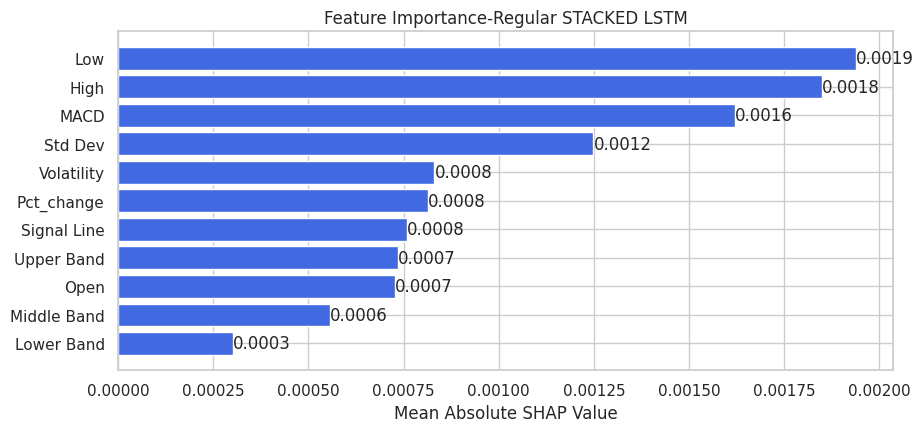

In [ ]:
# Compute the mean absolute SHAP values for each feature
mean_shap_values_rs = np.abs(shap_values_RS_2D).mean(axis=0)

# Sort the features based on their mean absolute SHAP values
sorted_indices_rs = np.argsort(mean_shap_values_rs)[::-1]
sorted_features_rs = X_test_RS_2D.columns[sorted_indices_rs]
sorted_shap_values_rs = mean_shap_values_rs[sorted_indices_rs]

# Create the bar plot
plt.figure(figsize=(10, len(sorted_features_rs) * 0.4))
plt.barh(sorted_features_rs, sorted_shap_values_rs, color='royalblue')
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance-Regular STACKED LSTM')

# Annotate each bar with its exact value
for index, value in enumerate(sorted_shap_values_rs):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Normal GRU Model

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)


# Importing libraries
from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.optimizers import Adam
from keras.layers import Dropout

# The GRU architecture
GRU_model = Sequential()

# First GRU layer with Dropout regularisation
GRU_model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], 11), activation='tanh'))
GRU_model.add(Dropout(0.3))

# Second GRU layer
GRU_model.add(GRU(units=64, return_sequences=True, activation='tanh'))
GRU_model.add(Dropout(0.3))

# Third GRU layer
GRU_model.add(GRU(units=64, return_sequences=True, activation='tanh'))
GRU_model.add(Dropout(0.3))

# Fourth GRU layer
GRU_model.add(GRU(units=64, activation='tanh'))
GRU_model.add(Dropout(0.3))

# The output layer
GRU_model.add(Dense(units=1))

# Compiling the RNN
#GRU_model.compile(optimizer=SGD(learning_rate=0.001, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')
GRU_model.compile(optimizer=SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=False), loss='mean_squared_error')

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

# Fitting to the training set
gru_history = GRU_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

Train on 1747 samples, validate on 100 samples
Epoch 1/50
1747/1747 [==============================] - ETA: 0s - loss: 0.0173

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1747/1747 [==============================] - 3s 2ms/sample - loss: 0.0173 - val_loss: 7.4425e-04
Epoch 2/50
1747/1747 [==============================] - 1s 710us/sample - loss: 0.0050 - val_loss: 0.0021
Epoch 3/50
1747/1747 [==============================] - 1s 713us/sample - loss: 0.0043 - val_loss: 6.9400e-04
Epoch 4/50
1747/1747 [==============================] - 1s 733us/sample - loss: 0.0031 - val_loss: 0.0011
Epoch 5/50
1747/1747 [==============================] - 1s 720us/sample - loss: 0.0032 - val_loss: 6.8682e-04
Epoch 6/50
1747/1747 [==============================] - 1s 718us/sample - loss: 0.0036 - val_loss: 6.9934e-04
Epoch 7/50
1747/1747 [==============================] - 2s 1ms/sample - loss: 0.0035 - val_loss: 8.0565e-04
Epoch 8/50
1747/1747 [==============================] - 2s 965us/sample - loss: 0.0029 - val_loss: 0.0014
Epoch 9/50
1747/1747 [==============================] - 1s 737us/sample - loss: 0.0029 - val_loss: 5.5428e-04
Epoch 10/50
1747/1747 [==============

In [ ]:
GRU_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 64)            14784     
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 gru_1 (GRU)                 (None, 10, 64)            24960     
                                                                 
 dropout_1 (Dropout)         (None, 10, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 10, 64)            24960     
                                                                 
 dropout_2 (Dropout)         (None, 10, 64)            0         
                                                                 
 gru_3 (GRU)                 (None, 64)               

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


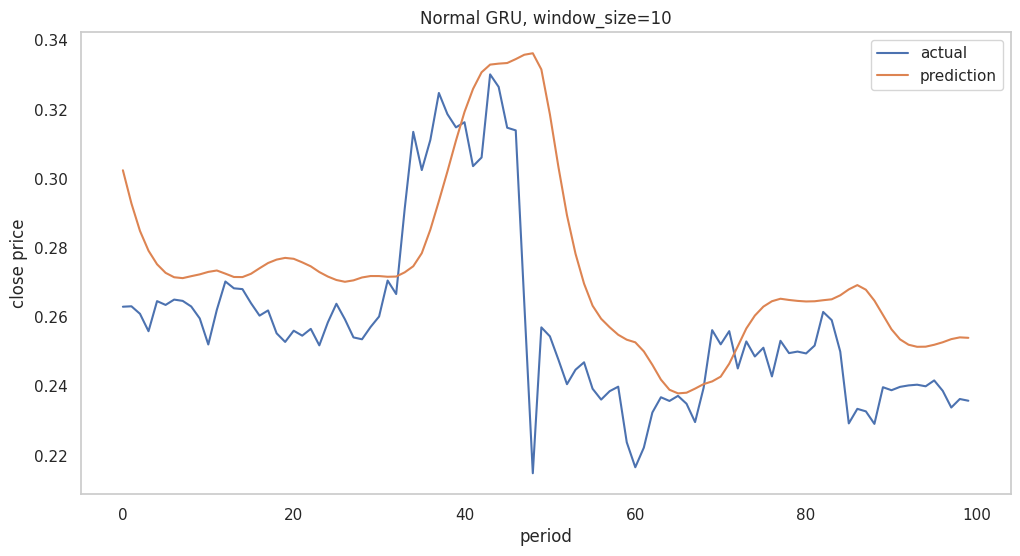

In [ ]:
gru_pred = GRU_model.predict(X_test)
plt.figure(figsize=(12, 6))
plt.title('Normal GRU, window_size=10')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(y_test, label='actual')
plt.plot(gru_pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()


In [ ]:
y_pred_gru_original = y_scaler.inverse_transform(gru_pred)
y_test_gru_original = y_scaler.inverse_transform(y_test)

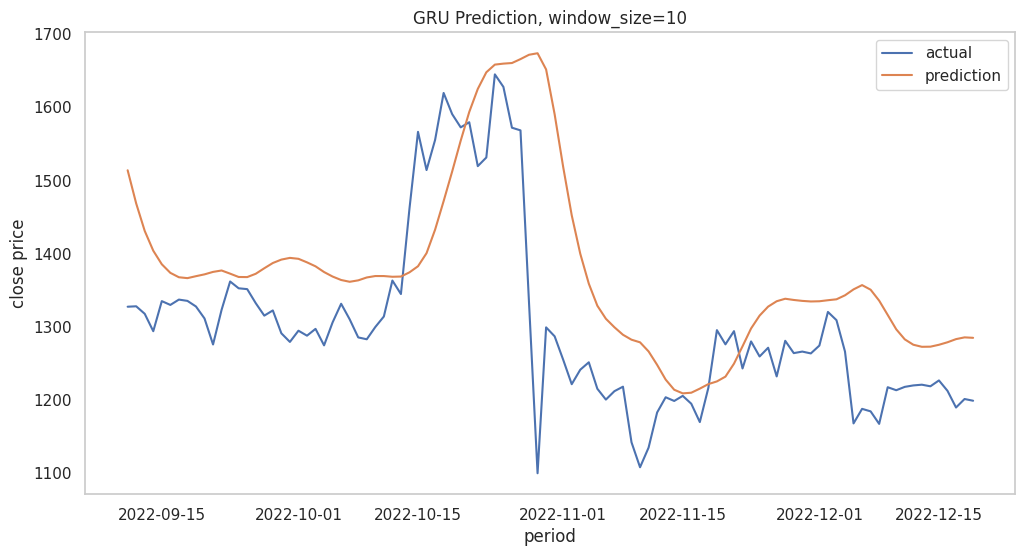

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('GRU Prediction, window_size=10')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(date_values_bi,y_test_gru_original, label='actual')
plt.plot(date_values_bi,y_pred_gru_original, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

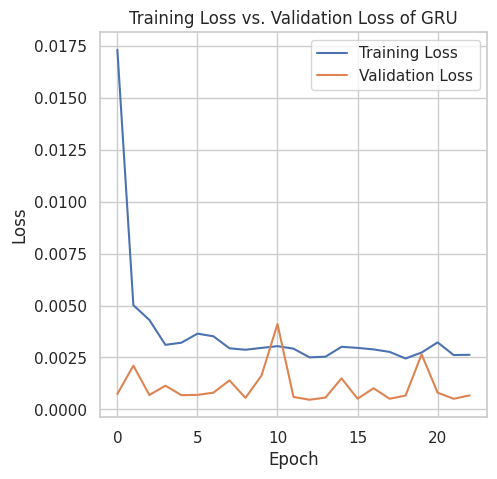

In [ ]:
# Plot the training loss and validation loss over the epochs
plt.figure(figsize=(5, 5))
plt.plot(gru_history.history['loss'])
plt.plot(gru_history.history['val_loss'])
plt.title('Training Loss vs. Validation Loss of GRU')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [ ]:
# Calculate metrics with the real number value
real_rmse_gru = np.sqrt(mean_squared_error(y_test_gru_original, y_pred_gru_original))
real_mae_gru = mean_absolute_error(y_test_gru_original, y_pred_gru_original)
real_mape_gru = mean_absolute_percentage_error(y_test_gru_original, y_pred_gru_original)
#Print each value
print("RMSE of GRU:", real_rmse_gru)
print("MAE of GRU:",real_mae_gru)
print("MAPE of GRU:", real_mape_gru)

RMSE of GRU: 122.85285200092518
MAE of GRU: 91.265390625
MAPE of GRU: 0.07163414846378377


# SHAP GRU

In [ ]:
# Use the training data for deep explainer
explainer_stock_gru = shap.DeepExplainer(GRU_model, X_train)
shap_values_stock_gru = explainer_stock_gru.shap_values(X_test)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [ ]:
shap_values_stock_gru[0][0].shape

(10, 11)

In [ ]:
shap_values_stock_gru_2D = shap_values_stock_gru[0].reshape(-1,11)
X_test_gru_2D = X_test.reshape(-1,11)

shap_values_stock_gru_2D.shape, X_test_gru_2D.shape

((1000, 11), (1000, 11))

In [ ]:
X_test_gru_2D = pd.DataFrame(data=X_test_gru_2D, columns = actual_column_names)

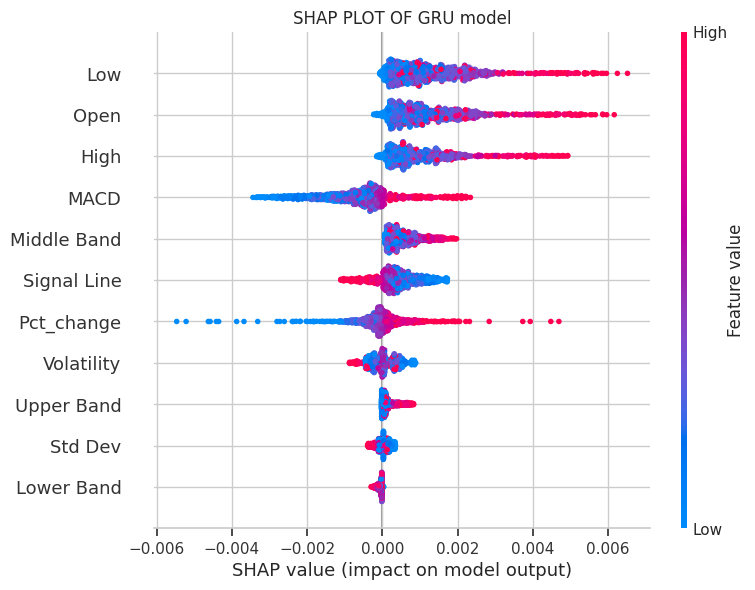

In [ ]:
shap.summary_plot(shap_values_stock_gru_2D, X_test_gru_2D, show = False)
plt.title("SHAP PLOT OF GRU model", loc='center')
plt.show()

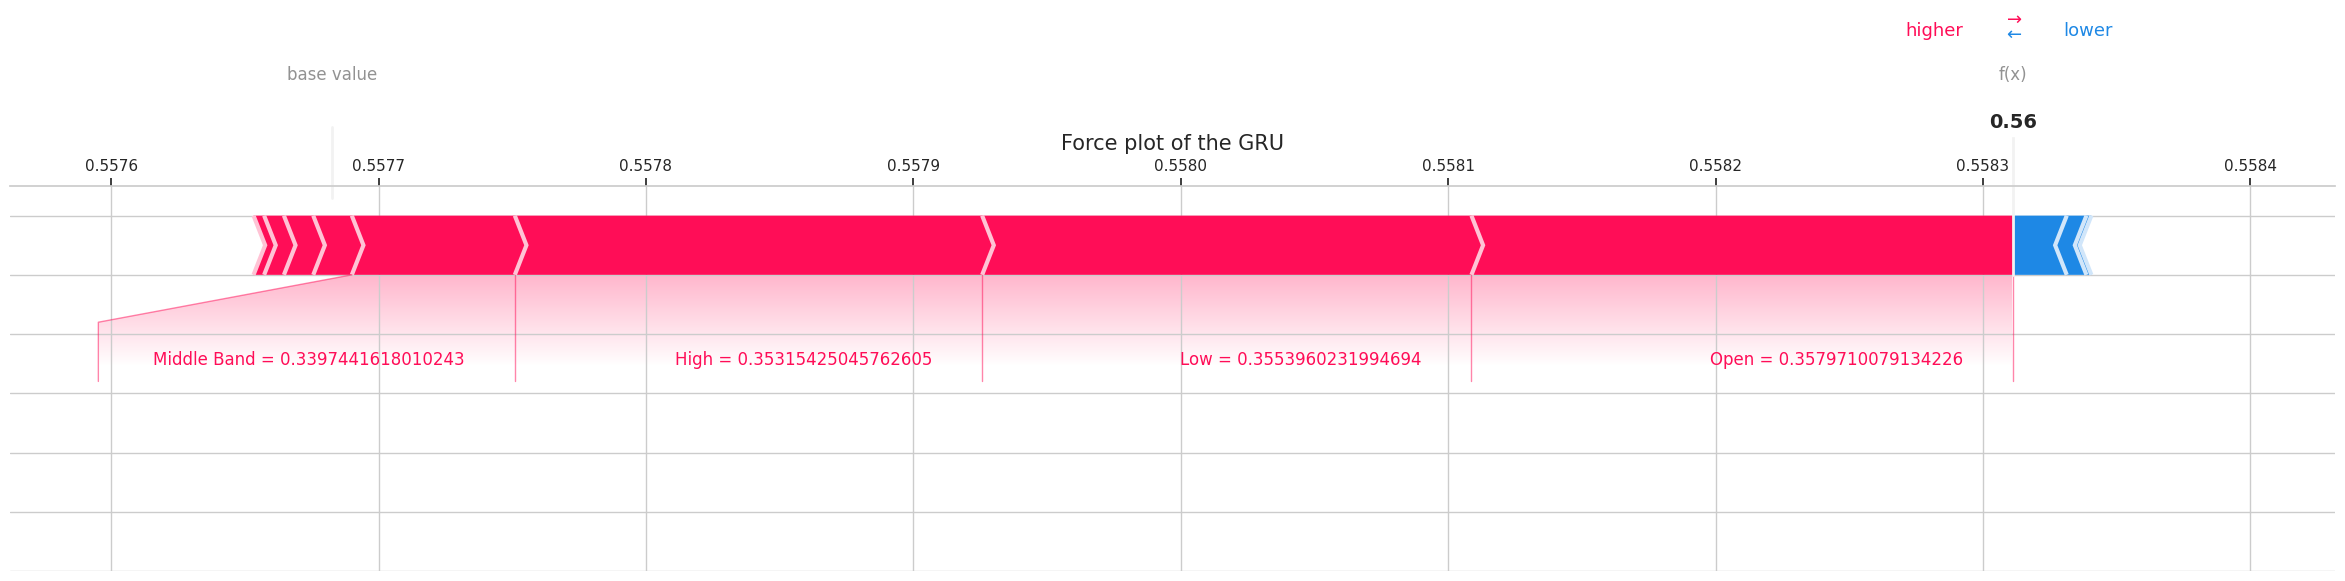

In [ ]:
#Force_plot of the GRU
expected_value_stock_GRU = explainer_stock_gru.expected_value[0]

instance_index = 0
shap.force_plot(expected_value_stock_GRU, shap_values_stock_gru_2D[instance_index], X_test_gru_2D.iloc[instance_index],
                link='logit', matplotlib=True,show = False,figsize=(30,5))

plt.title("Force plot of the GRU",fontsize=15)
plt.show()

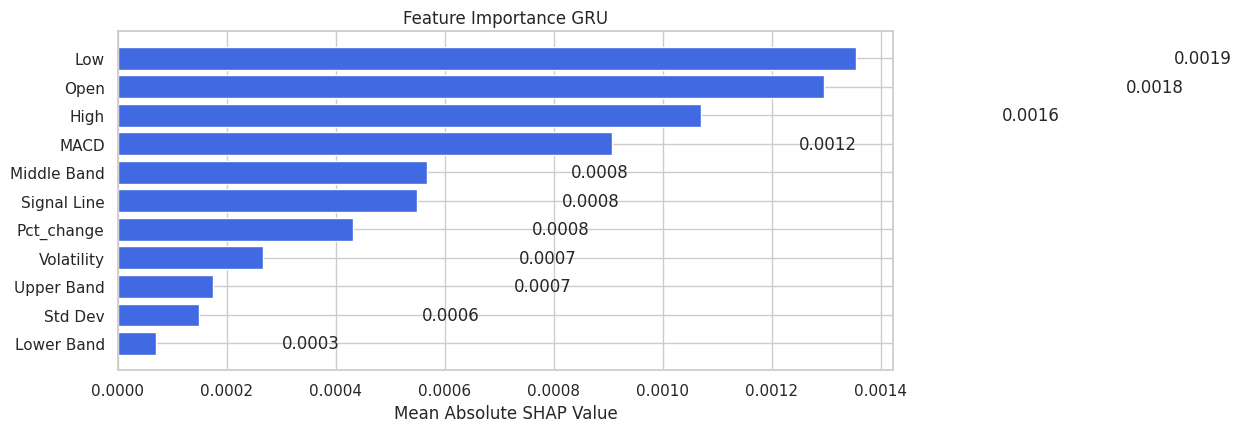

In [ ]:
# Compute the mean absolute SHAP values for each feature
mean_shap_values_gru = np.abs(shap_values_stock_gru_2D).mean(axis=0)

# Sort the features based on their mean absolute SHAP values
sorted_indices_gru = np.argsort(mean_shap_values_gru)[::-1]
sorted_features_gru = X_test_gru_2D.columns[sorted_indices_gru]
sorted_shap_values_gru = mean_shap_values_gru[sorted_indices_gru]

# Create the bar plot
plt.figure(figsize=(10, len(sorted_features_gru) * 0.4))
plt.barh(sorted_features_gru, sorted_shap_values_gru, color='royalblue')
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance GRU')

# Annotate each bar with its exact value
for index, value in enumerate(sorted_shap_values_rs):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Machine Learning model, Voting Regressor with TPOT

In [ ]:
import pandas as pd
from sklearn.metrics import precision_score,accuracy_score
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import yfinance as yf
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor,VotingRegressor,RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, Sum,Product,Matern
from xgboost import XGBRegressor
import shap
from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
dfm = yf.download('ETH-USD', start='2012-01-01', end='2022-12-31')
dfm

[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-09   308.644989   329.451996   307.056000   320.884003   320.884003   
2017-11-10   320.670990   324.717987   294.541992   299.252991   299.252991   
2017-11-11   298.585999   319.453003   298.191986   314.681000   314.681000   
2017-11-12   314.690002   319.153015   298.513000   307.907990   307.907990   
2017-11-13   307.024994   328.415009   307.024994   316.716003   316.716003   
...                 ...          ...          ...          ...          ...   
2022-12-26  1218.920166  1226.974365  1214.335938  1226.974365  1226.974365   
2022-12-27  1226.987061  1230.418091  1205.895630  1212.791626  1212.791626   
2022-12-28  1212.736572  1213.128906  1185.702148  1189.986084  1189.986084   
2022-12-29  1190.010132  1204.141602  1188.360229  1201.595337  1201.595337   
2022-12-30  1201.569580  1202.034668  1187.462524  1199.232788  1199.232788   

                Volume  
Date                    
2017-11-09   893249984  
2017-11-10   885985984  
2017-11-11   842300992  
2017-11-12  1613479936  
2017-11-13  1041889984  
...                ...  
2022-12-26  3282098400  
2022-12-27  4091530737  
2022-12-28  4991669631  
2022-12-29  4132233940  
2022-12-30  4055668253  

[1878 rows x 6 columns]

In [ ]:
dfm_reset = dfm.reset_index()

In [ ]:
# Making the percentage changes in each day
dfm['Pct_change'] = dfm['Close'].pct_change()
dfm['Pct_change'] = np.log1p(dfm['Pct_change'])

# Choose the desired time periods for the moving averages
short_period = 12  # Short-term EMA period
long_period = 26  # Long-term EMA period
signal_period = 9  # Signal line EMA period

# Calculate the short-term EMA
dfm['Short EMA'] = dfm['Close'].ewm(span=short_period, adjust=False).mean()

# Calculate the long-term EMA
dfm['Long EMA'] = dfm['Close'].ewm(span=long_period, adjust=False).mean()

# Calculate the MACD line
dfm['MACD'] = dfm['Short EMA'] - dfm['Long EMA']

# Calculate the signal line
dfm['Signal Line'] = dfm['MACD'].ewm(span=signal_period, adjust=False).mean()

# Calculate the MACD histogram
dfm['MACD Histogram'] = dfm['MACD'] - dfm['Signal Line']

# Calculate the logarithmic returns
dfm['Log Returns'] = np.log(dfm['Close'] / dfm['Close'].shift(1))

# Calculate the volatility
dfm['Volatility'] = dfm['Log Returns'].rolling(window=20).std() * np.sqrt(252)

# desired tDme period for the moving average and standard deviation
window = 20  # Number of Trading days in a month
num_std = 2
# 2 standard deviations above and below the middle band provides
# a range that encompasses a large portion of typical price movements

# Calculate the middle band (simple moving average)
dfm['Middle Band'] = dfm['Close'].rolling(window=window).mean()

# Calculate the standard deviation of the closing prices
dfm['Std Dev'] = dfm['Close'].rolling(window=window).std()

# Calculate the upper band and lower band
dfm['Upper Band'] = dfm['Middle Band'] + (num_std * dfm['Std Dev'])
dfm['Lower Band'] = dfm['Middle Band'] - (num_std * dfm['Std Dev'])

# Making Next day's close price column in each date.
dfm['Next_day'] = dfm['Close'].shift(-1)


In [ ]:
dfm

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-09   308.644989   329.451996   307.056000   320.884003   320.884003   
2017-11-10   320.670990   324.717987   294.541992   299.252991   299.252991   
2017-11-11   298.585999   319.453003   298.191986   314.681000   314.681000   
2017-11-12   314.690002   319.153015   298.513000   307.907990   307.907990   
2017-11-13   307.024994   328.415009   307.024994   316.716003   316.716003   
...                 ...          ...          ...          ...          ...   
2022-12-26  1218.920166  1226.974365  1214.335938  1226.974365  1226.974365   
2022-12-27  1226.987061  1230.418091  1205.895630  1212.791626  1212.791626   
2022-12-28  1212.736572  1213.128906  1185.702148  1189.986084  1189.986084   
2022-12-29  1190.010132  1204.141602  1188.360229  1201.595337  1201.595337   
2022-12-30  1201.569580  1202.034668  1187.462524  1199.232788  1199.232788   

                Volume  Pct_change    Short EMA     Long EMA       MACD  \
Date                                                                      
2017-11-09   893249984         NaN   320.884003   320.884003   0.000000   
2017-11-10   885985984   -0.069790   317.556155   319.281706  -1.725551   
2017-11-11   842300992    0.050270   317.113823   318.940912  -1.827089   
2017-11-12  1613479936   -0.021758   315.697541   318.123659  -2.426118   
2017-11-13  1041889984    0.028204   315.854228   318.019388  -2.165161   
...                ...         ...          ...          ...        ...   
2022-12-26  3282098400    0.006552  1222.485810  1234.654119 -12.168309   
2022-12-27  4091530737   -0.011626  1220.994397  1233.034675 -12.040278   
2022-12-28  4991669631   -0.018983  1216.223888  1229.845890 -13.622003   
2022-12-29  4132233940    0.009709  1213.973341  1227.753257 -13.779915   
2022-12-30  4055668253   -0.001968  1211.705564  1225.640629 -13.935066   

            Signal Line  MACD Histogram  Log Returns  Volatility  Middle Band  \
Date                                                                            
2017-11-09     0.000000        0.000000          NaN         NaN          NaN   
2017-11-10    -0.345110       -1.380441    -0.069790         NaN          NaN   
2017-11-11    -0.641506       -1.185583     0.050270         NaN          NaN   
2017-11-12    -0.998428       -1.427690    -0.021758         NaN          NaN   
2017-11-13    -1.231775       -0.933386     0.028204         NaN          NaN   
...                 ...             ...          ...         ...          ...   
2022-12-26   -13.313787        1.145479     0.006552    0.430237  1236.220313   
2022-12-27   -13.059085        1.018808    -0.011626    0.417804  1235.238019   
2022-12-28   -13.171669       -0.450334    -0.018983    0.394964  1230.681506   
2022-12-29   -13.293318       -0.486597     0.009709    0.396009  1227.547034   
2022-12-30   -13.421668       -0.513398    -0.001968    0.395707  1224.189465   

              Std Dev   Upper Band   Lower Band     Next_day  
Date                                                          
2017-11-09        NaN          NaN          NaN   299.252991  
2017-11-10        NaN          NaN          NaN   314.681000  
2017-11-11        NaN          NaN          NaN   307.907990  
2017-11-12        NaN          NaN          NaN   316.716003  
2017-11-13        NaN          NaN          NaN   337.631012  
...               ...          ...          ...          ...  
2022-12-26  43.327745  1322.875803  1149.564822  1212.791626  
2022-12-27  43.639596  1322.517211  1147.958827  1189.986084  
2022-12-28  43.353841  1317.389188  1143.973825  1201.595337  
2022-12-29  43.061694  1313.670422  1141.423645  1199.232788  
2022-12-30  42.488258  1309.165982  1139.212949          NaN  

[1878 rows x 19 columns]

In [ ]:
dfm.isnull().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Pct_change         1
Short EMA          0
Long EMA           0
MACD               0
Signal Line        0
MACD Histogram     0
Log Returns        1
Volatility        20
Middle Band       19
Std Dev           19
Upper Band        19
Lower Band        19
Next_day           1
dtype: int64

In [ ]:
dfm = dfm.dropna()

# Drop unimportant features for VR

In [ ]:
dfm = dfm.drop(["Adj Close","Volume","Close",'Short EMA','Log Returns', 'Long EMA', 'MACD Histogram'],axis = 1)

In [ ]:
features_v = dfm.columns[:-1]
#features_v = dfm.columns

In [ ]:
scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Pct_change', 'MACD','Signal Line','Volatility','Middle Band', 'Std Dev',
       'Upper Band', 'Lower Band']

scaled_df_v = scaler.fit_transform(dfm[scale_cols])

scaled_df_v = pd.DataFrame(scaled_df_v, columns=scale_cols)

print(scaled_df_v)

          Open      High       Low  Pct_change      MACD  Signal Line  \
0     0.082315  0.090914  0.073835    0.572715  0.463765     0.465773   
1     0.073413  0.079094  0.068694    0.758190  0.462639     0.468150   
2     0.076374  0.080574  0.074534    0.755293  0.463217     0.470183   
3     0.080954  0.081329  0.080649    0.692684  0.462815     0.471717   
4     0.080288  0.082697  0.079613    0.707734  0.462212     0.472807   
...        ...       ...       ...         ...       ...          ...   
1852  0.240572  0.236806  0.241821    0.698866  0.398494     0.404301   
1853  0.240095  0.237525  0.244111    0.709488  0.400333     0.404722   
1854  0.241802  0.238242  0.242290    0.686345  0.400497     0.405096   
1855  0.238787  0.234644  0.237934    0.676979  0.398464     0.404931   
1856  0.233978  0.232775  0.238507    0.713507  0.398261     0.404752   

      Volatility  Middle Band   Std Dev  Upper Band  Lower Band  
0       0.290080     0.063604  0.091845    0.080644    0.

In [ ]:
# PCA
n_components_v = 11
pca_v = PCA(n_components=n_components_v)
X_pca_v = pca_v.fit_transform(scaled_df_v)

In [ ]:
X_pca_v.shape

(1857, 11)

In [ ]:
X_pca_df_v = pd.DataFrame(X_pca_v)
X_pca_df_v

0         1         2         3         4         5         6   \
0    -0.378212 -0.051469  0.075839  0.001829  0.128558 -0.029031  0.001877   
1    -0.387003 -0.061352  0.054081  0.025654 -0.052150  0.006325  0.005553   
2    -0.380869 -0.063890  0.052631  0.024956 -0.049508  0.004784  0.002224   
3    -0.374700 -0.065264  0.047517  0.018884  0.012040 -0.004287 -0.003827   
4    -0.373367 -0.065775  0.046533  0.016506 -0.002754  0.000099 -0.001880   
...        ...       ...       ...       ...       ...       ...       ...   
1852  0.030406 -0.020740 -0.179887 -0.013780  0.002914  0.005130 -0.003903   
1853  0.030602 -0.023027 -0.180226 -0.013809 -0.007933  0.004686 -0.004846   
1854  0.030720 -0.024497 -0.184683 -0.012205  0.015362  0.001975 -0.003577   
1855  0.025055 -0.025230 -0.193747 -0.007307  0.025537  0.004599 -0.003306   
1856  0.021641 -0.025409 -0.193356 -0.004884 -0.010683  0.010250 -0.004439   

            7         8             9             10  
0     0.010931 -0.003108  3.899921e-15 -1.408397e-17  
1    -0.001658  0.002693  8.724209e-17  4.012464e-16  
2    -0.002359  0.001383  1.869056e-16  5.474837e-17  
3    -0.000675 -0.000165  5.216262e-17  4.586155e-17  
4    -0.000462 -0.000364  5.830184e-16  3.331371e-16  
...        ...       ...           ...           ...  
1852 -0.001982  0.001643  4.685233e-18 -1.390483e-17  
1853 -0.001549  0.001648 -3.704044e-17  2.360061e-17  
1854 -0.001170  0.001288 -8.350757e-18 -1.881916e-17  
1855 -0.000904  0.001862 -1.098390e-17  1.180226e-17  
1856 -0.000621  0.002422 -2.304534e-17 -6.826149e-18  

[1857 rows x 11 columns]

## Split into X and y for ML Model

In [ ]:
X_v = X_pca_v
# For the target variable, assume you still want to predict 'Next_day'
y_v = dfm['Next_day'].values

# Convert to numpy arrays
X_v = np.array(X_v)
y_v = np.array(y_v)

X_v.shape, y_v.shape

((1857, 11), (1857,))

In [ ]:
# Access the principal components
principal_components = pca_v.components_

# Access the explained variance of each principal component
explained_variances = pca_v.explained_variance_ratio_

# Print the explained variance of each principal component
for i, explained_variance in enumerate(explained_variances):
    print(f"Principal Component {i+1}: {explained_variance:.4f}")

# Print the loadings of the original features on each principal component
features_v = scaled_df_v.columns  # Assuming features_v are the columns of scaled_df_v
for i, pc in enumerate(principal_components):
    print(f"Principal Component {i+1} Loadings:")
    for feature, loading in zip(features_v, pc):
        print(f"{feature}: {loading:.4f}")

Principal Component 1: 0.8647
Principal Component 2: 0.0582
Principal Component 3: 0.0494
Principal Component 4: 0.0146
Principal Component 5: 0.0090
Principal Component 6: 0.0037
Principal Component 7: 0.0002
Principal Component 8: 0.0001
Principal Component 9: 0.0000
Principal Component 10: 0.0000
Principal Component 11: 0.0000
Principal Component 1 Loadings:
Open: 0.3893
High: 0.3946
Low: 0.3821
Pct_change: -0.0017
MACD: 0.0235
Signal Line: 0.0313
Volatility: 0.0029
Middle Band: 0.4121
Std Dev: 0.2095
Upper Band: 0.4369
Lower Band: 0.3750
Principal Component 2 Loadings:
Open: -0.0787
High: -0.0828
Low: -0.0823
Pct_change: -0.0223
MACD: -0.6418
Signal Line: -0.6721
Volatility: 0.2762
Middle Band: 0.0843
Std Dev: 0.1317
Upper Band: 0.1140
Lower Band: 0.0479
Principal Component 3 Loadings:
Open: -0.0248
High: -0.0076
Low: -0.0473
Pct_change: 0.0006
MACD: 0.1920
Signal Line: 0.2387
Volatility: 0.8394
Middle Band: -0.0547
Std Dev: 0.3963
Upper Band: 0.0596
Lower Band: -0.1871
Principal C

In [ ]:
# Scale the input sequences (X)
scaler = MinMaxScaler()
X_v = scaler.fit_transform(X_v.reshape(X_v.shape[0], -1))

# Scale the target variable (y)
y_scaler = MinMaxScaler()
y_v = y_scaler.fit_transform(y_v.reshape(-1, 1))


In [ ]:
y_v

array([[0.07673914],
       [0.08084805],
       [0.08019425],
       ...,
       [0.23386833],
       [0.23632387],
       [0.23582415]])

In [ ]:
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=100)
for train_index, test_index in tscv.split(X, y):
    X_vtrain, X_vtest = X_v[train_index], X_v[test_index]
    y_vtrain, y_vtest = y_v[train_index], y_v[test_index]

In [ ]:
print(X_vtrain.shape, X_vtest.shape,y_vtrain.shape, y_vtest.shape)

(1747, 11) (100, 11) (1747, 1) (100, 1)


In [ ]:
y_train

array([[0.07559844],
       [0.09112687],
       [0.11995542],
       ...,
       [0.27353924],
       [0.26229649],
       [0.24711381]])

In [ ]:
X_vtrain_2d = X_train.reshape((X_train.shape[0], -1))
X_vtest_2d = X_test.reshape((X_test.shape[0], -1))
# Fit the PCA on your training data and apply the dimensionality reduction
X_vtrain_pca = pca_v.fit_transform(X_vtrain_2d)

# Apply the same transformation to your test data
X_vtest_pca = pca_v.transform(X_vtest_2d)

# Voting Regressor Ensemble

In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11937 sha256=acbbb1a2cd46d5570edf927a5a86847148ac6b85803819253fef836fe8e870fe
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from tpot.config import regressor_config_dict
from tpot import TPOTRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.ensemble import VotingRegressor

In [ ]:
cv_split = TimeSeriesSplit(n_splits=10, test_size=100)

models = [
     (GaussianProcessRegressor(), {
        "kernel": [DotProduct(),WhiteKernel()],
        "n_restarts_optimizer": [2,5],
        "alpha": [1e-10, 1e-5, 1e-1]
    })
]

vr_estimators = {}
for model, parameters in models:
    grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
    grid_search.fit(X_vtrain_pca, y_train)
    vr_estimators.update([(model.__class__.__name__, grid_search.best_estimator_)])

In [ ]:
# Define the TPOT configurations for each model
tpot_config = {
    'xgboost.XGBRegressor': {
        "max_depth": [3, 10,20],
        "learning_rate": [0.01, 0.1],
        "n_estimators": [100, 300],
        "colsample_bytree": [0.5, 1]
    },
    'lightgbm.LGBMRegressor': {
        "max_depth": [3, 10,20],
        "num_leaves": [10,30,50],
        "learning_rate": [0.01, 0.1],
        "n_estimators": [100, 300],
        "colsample_bytree": [0.5, 1]
    },
    'sklearn.svm.SVR': {
        "epsilon": [0.1, 0.2, 0.5],
        "kernel": ['linear', 'poly', 'rbf'],
        "gamma": ['scale', 'auto']
    }

}

best_models = {}

# Loop through the model configurations and find the best model for each
for model_name, config in tpot_config.items():
    tpot = TPOTRegressor(generations=2, population_size=10, verbosity=2, config_dict={model_name: config})
    tpot.fit(X_vtrain_pca, y_train)

    # Get the best model from TPOT
    best_model = tpot.fitted_pipeline_

    # Store the best model in the dictionary
    best_models[model_name] = best_model

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.004417796296061375

Generation 2 - Current best internal CV score: -0.004417796296061375

Best pipeline: XGBRegressor(input_matrix, colsample_bytree=1, learning_rate=0.1, max_depth=3, n_estimators=100)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 11
[LightGBM] [Info] Start training from score 0.174956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.002481783958137904

Generation 2 - Current best internal CV score: -0.002481783958137904

Best pipeline: SVR(CombineDFs(input_matrix, input_matrix), epsilon=0.1, gamma=scale, kernel=linear)


In [ ]:
vr_estimators.update(best_models)

In [ ]:
vr_estimators = [(model_name, model) for model_name, model in vr_estimators.items()]
vr = VotingRegressor(estimators=vr_estimators)
vr.fit(X_vtrain_pca, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 1747, number of used features: 22
[LightGBM] [Info] Start training from score 0.221771
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

VotingRegressor(estimators=[('GaussianProcessRegressor',
                             GaussianProcessRegressor(alpha=1e-05,
                                                      kernel=DotProduct(sigma_0=1),
                                                      n_restarts_optimizer=5)),
                            ('xgboost.XGBRegressor',
                             Pipeline(steps=[('xgbregressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=1,
                                                           device=None,
                                                           early_stopping...
                                              LGBMRegressor(colsample_bytree=0.5,
                                                            max_depth=3,
                                                            n_estimators=300,
                                                            num_leaves=50))])),
                            ('sklearn.svm.SVR',
                             Pipeline(steps=[('featureunion',
                                              FeatureUnion(transformer_list=[('functiontransformer-1',
                                                                              FunctionTransformer(func=<function copy at 0x7ab979755a20>)),
                                                                             ('functiontransformer-2',
                                                                              FunctionTransformer(func=<function copy at 0x7ab979755a20>))])),
                                             ('svr', SVR(kernel='linear'))]))])

In [ ]:
y_pred_reg = vr.predict(X_vtest_pca)

In [ ]:
y_pred_inv = y_scaler.inverse_transform(y_pred_reg.reshape(-1,1))
#y_test_originalv = y_scaler.inverse_transform(y_vtest)
y_test_originalv = y_scaler.inverse_transform(y_test)

In [ ]:
# Calculate metrics
rmse_vr = np.sqrt(mean_squared_error(y_test_originalv, y_pred_inv))
mae_vr = mean_absolute_error(y_test_originalv, y_pred_inv)
mape_vr = mean_absolute_percentage_error(y_test_originalv, y_pred_inv)

print("RMSE of Voting Regressor:", rmse_vr)
print("MAE of Voting Regressor:", mae_vr)
print("MAPE of Voting Regressor:", mape_vr)

RMSE of Voting Regressor: 108.16075704716141
MAE of Voting Regressor: 76.13972396477885
MAPE of Voting Regressor: 0.058974363352293224


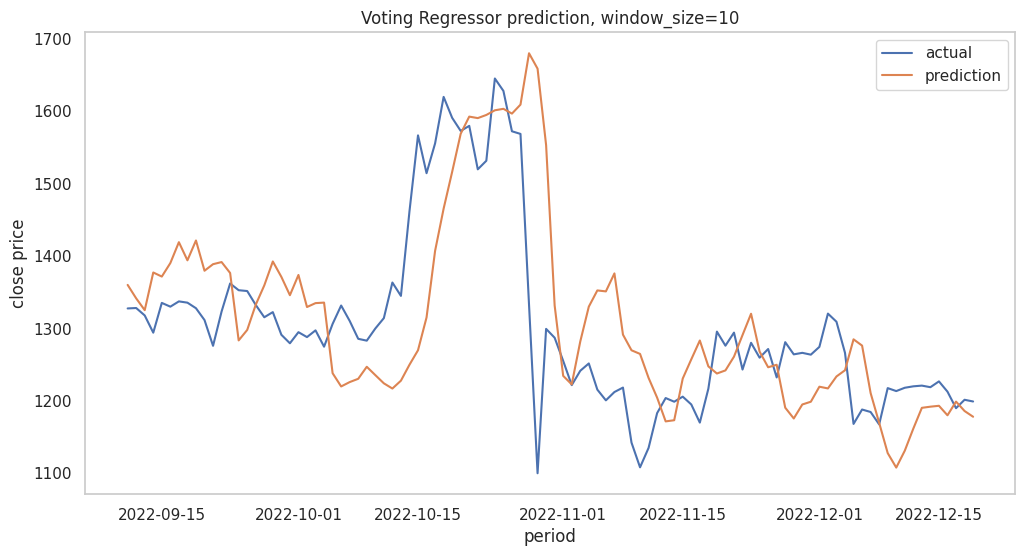

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Voting Regressor prediction, window_size=10')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(date_values_bi,y_test_originalv, label='actual')
plt.plot(date_values_bi,y_pred_inv, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# SHAP of Voting Regressor

In [ ]:
features_vt = ['Principal_Component_' + str(i) for i in range(1, X_vtest_pca.shape[-1]+1)]
features_vt

['Principal_Component_1',
 'Principal_Component_2',
 'Principal_Component_3',
 'Principal_Component_4',
 'Principal_Component_5',
 'Principal_Component_6',
 'Principal_Component_7',
 'Principal_Component_8',
 'Principal_Component_9',
 'Principal_Component_10',
 'Principal_Component_11']

In [ ]:
explainer = shap.KernelExplainer(vr.predict, shap.sample(X_pca_v, 10))  # Using 100 background samples for better performance
x_vtest_2d = np.reshape(X_vtest_pca, (X_vtest_pca.shape[0], X_vtest_pca.shape[1]))
shap_values_vr = explainer.shap_values(x_vtest_2d)

  0%|          | 0/100 [00:00<?, ?it/s]

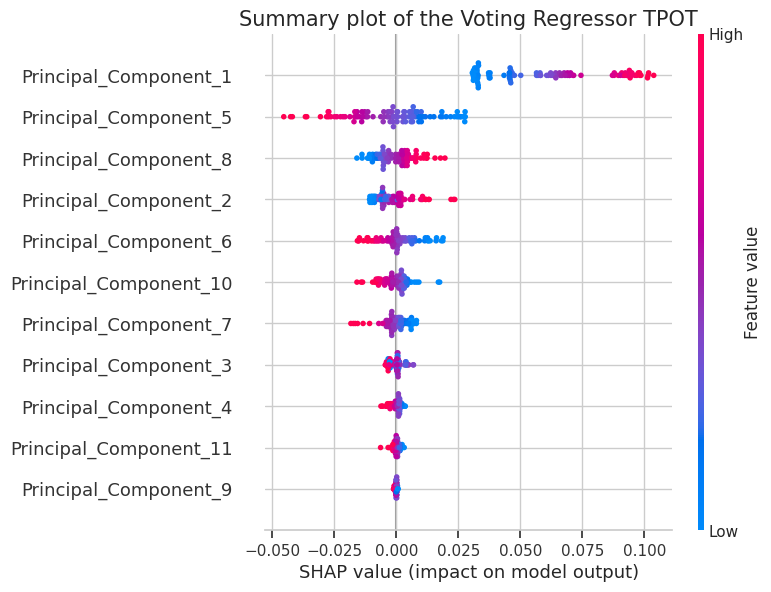

In [ ]:
# Plot the SHAP values
#shap.summary_plot(shap_values_vr, x_vtest_2d,feature_names=actual_column_names)
shap.summary_plot(shap_values_vr, x_vtest_2d,feature_names=features_vt,show = False)
plt.title("Summary plot of the Voting Regressor TPOT",fontsize=15)
plt.show()
#shap.summary_plot(shap_values_vr, x_vtest_2d,feature_names=features_vt,title='Summary plot of Voting Regressor')


In [ ]:
x_vtest_2d

array([[ 7.28995371e-01, -1.29480794e-01, -1.76124709e-01, ...,
         3.73517493e-03, -2.36402975e-02, -9.89446320e-02],
       [ 6.93857974e-01, -1.76559512e-01, -1.55139983e-01, ...,
         7.00453893e-03, -3.97230113e-02,  3.88457838e-02],
       [ 6.55978137e-01, -2.29665680e-01, -1.29022398e-01, ...,
        -2.42838380e-02,  2.87144272e-04, -7.28777756e-03],
       ...,
       [ 1.08870683e-01, -3.04277557e-02, -5.33869168e-01, ...,
        -2.43202228e-02,  1.59316671e-02,  1.71403354e-02],
       [ 1.10505777e-01, -3.04508315e-02, -5.48802851e-01, ...,
         3.26127821e-02,  2.76583482e-02,  1.20475860e-02],
       [ 1.09591041e-01, -2.88370397e-02, -5.64993466e-01, ...,
        -2.66981179e-02,  3.54228063e-02, -2.65919393e-02]])

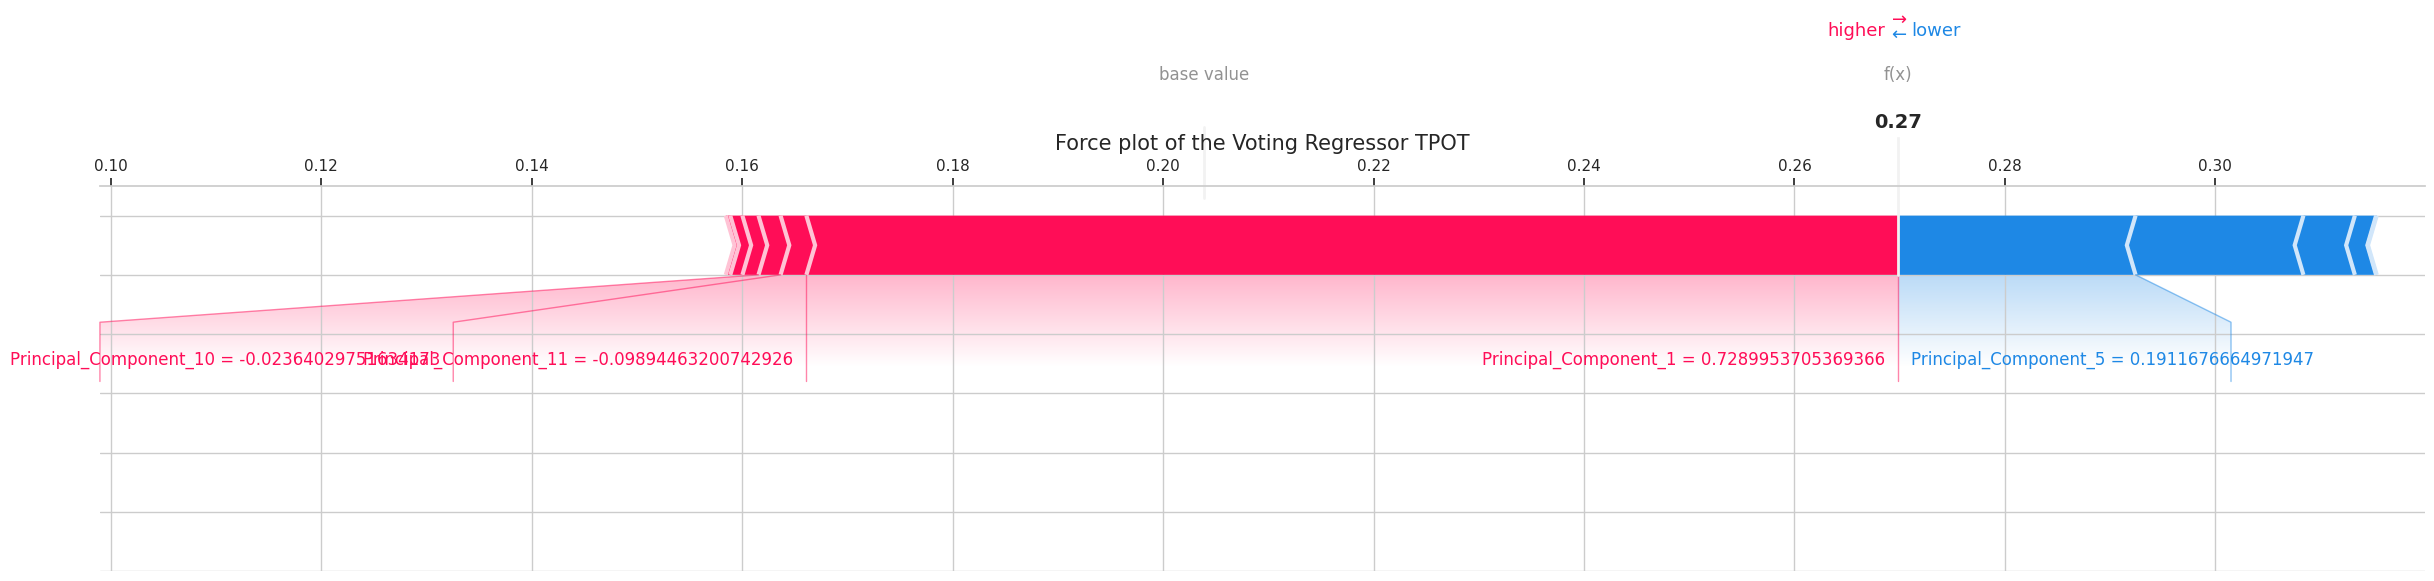

In [ ]:
#Force_plot of the Voting Regressor
expected_value_vr = explainer.expected_value

instance_index = 0

shap.force_plot(expected_value_vr, shap_values_vr[instance_index], x_vtest_2d[instance_index],
                feature_names=features_vt,matplotlib=True,show = False,figsize=(30,5))

plt.title("Force plot of the Voting Regressor TPOT",fontsize=15)
plt.show()

In [ ]:
X.shape

(1847, 110)

In [ ]:
x_vtest_2d_df = pd.DataFrame(x_vtest_2d, columns = features_vt)

In [ ]:
x_vtest_2d_df

Principal_Component_1  Principal_Component_2  Principal_Component_3  \
0                0.728995              -0.129481              -0.176125   
1                0.693858              -0.176560              -0.155140   
2                0.655978              -0.229666              -0.129022   
3                0.626838              -0.279965              -0.109633   
4                0.604711              -0.334178              -0.090044   
..                    ...                    ...                    ...   
95               0.119916              -0.022592              -0.519504   
96               0.112115              -0.030158              -0.520705   
97               0.108871              -0.030428              -0.533869   
98               0.110506              -0.030451              -0.548803   
99               0.109591              -0.028837              -0.564993   

    Principal_Component_4  Principal_Component_5  Principal_Component_6  \
0               -0.094747               0.191168              -0.017646   
1               -0.066455               0.222527              -0.034592   
2               -0.034915               0.239440              -0.060285   
3                0.005022               0.238124              -0.088143   
4                0.046691               0.230600              -0.108076   
..                    ...                    ...                    ...   
95              -0.089399               0.050045               0.004018   
96              -0.086898               0.026205               0.017255   
97              -0.077838               0.008536               0.018723   
98              -0.069485               0.004193               0.019566   
99              -0.059660               0.002400               0.024413   

    Principal_Component_7  Principal_Component_8  Principal_Component_9  \
0                0.025177              -0.136761               0.003735   
1               -0.013819              -0.122355               0.007005   
2               -0.049024              -0.102390              -0.024284   
3               -0.064954              -0.079261               0.004775   
4               -0.087941              -0.029372               0.018774   
..                    ...                    ...                    ...   
95              -0.042116               0.050180               0.008288   
96              -0.053667               0.046324              -0.001314   
97              -0.038847               0.027287              -0.024320   
98              -0.030828               0.024157               0.032613   
99              -0.019907               0.013791              -0.026698   

    Principal_Component_10  Principal_Component_11  
0                -0.023640               -0.098945  
1                -0.039723                0.038846  
2                 0.000287               -0.007288  
3                -0.036031                0.000652  
4                 0.008976               -0.011910  
..                     ...                     ...  
95               -0.015071                0.039366  
96                0.055457               -0.023217  
97                0.015932                0.017140  
98                0.027658                0.012048  
99                0.035423               -0.026592  

[100 rows x 11 columns]

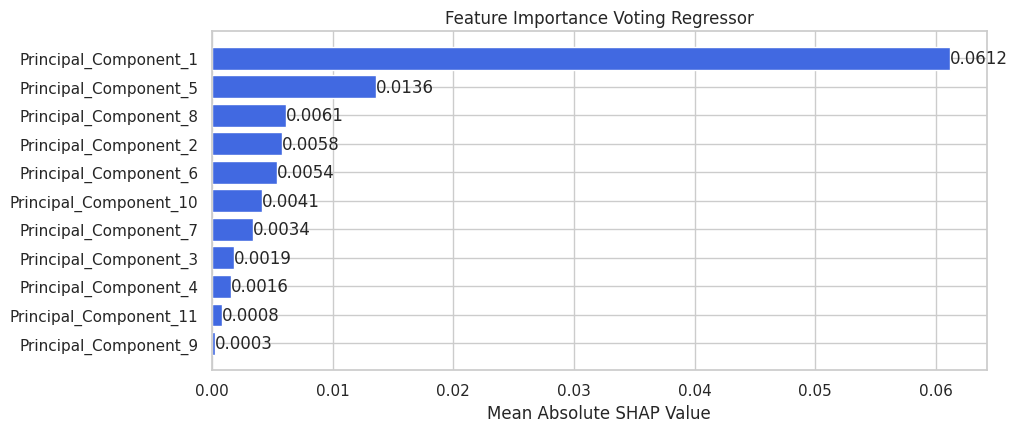

In [ ]:
# Compute the mean absolute SHAP values for each feature
mean_shap_values_vr = np.abs(shap_values_vr).mean(axis=0)

# Sort the features based on their mean absolute SHAP values
sorted_indices_vr = np.argsort(mean_shap_values_vr)[::-1]

# If x_vtest_2d is a DataFrame, you can get the column names directly.
# Otherwise, replace `x_vtest_2d.columns` with appropriate column names.
sorted_features_vr = x_vtest_2d_df.columns[sorted_indices_vr]
sorted_shap_values_vr = mean_shap_values_vr[sorted_indices_vr]

# Create the bar plot
plt.figure(figsize=(10, len(sorted_features_vr) * 0.4))
plt.barh(sorted_features_vr, sorted_shap_values_vr, color='royalblue')
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance Voting Regressor')

# Annotate each bar with its exact value
for index, value in enumerate(sorted_shap_values_vr):
    plt.text(value, index, f'{value:.4f}', va='center')

plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


# Summary of whole model

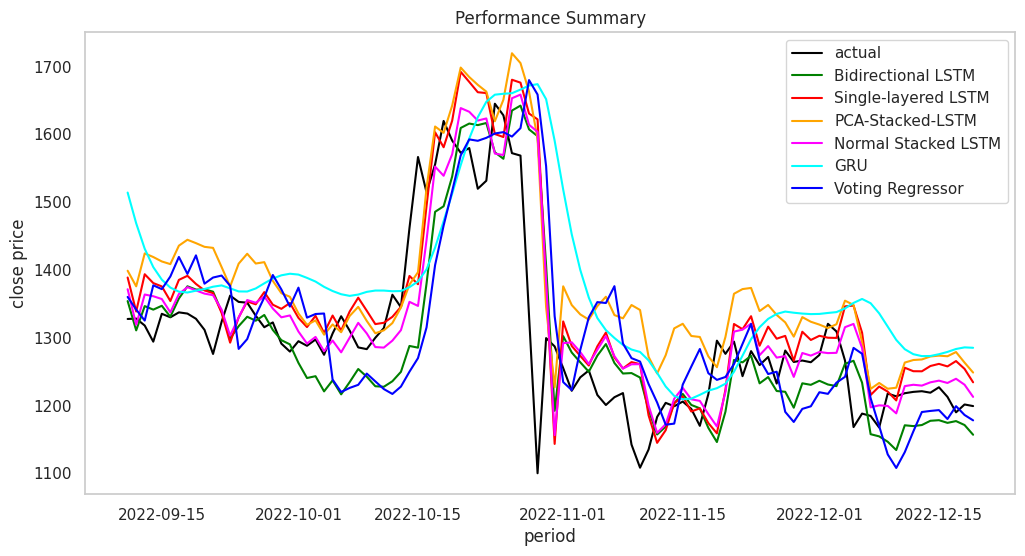

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Performance Summary')
plt.ylabel('close price')
plt.xlabel('period')

plt.plot(date_values_bi,y_test_original, label='actual', color='black')
plt.plot(date_values_bi,y_pred_original, label='Bidirectional LSTM', color='green')
plt.plot(date_values_bi,y_single_pred_original, label='Single-layered LSTM', color='red')
plt.plot(date_values_bi,y_pca_pred_original, label='PCA-Stacked-LSTM', color='orange')
plt.plot(date_values_bi,y_nstacked_pred_original, label='Normal Stacked LSTM', color='magenta')
plt.plot(date_values_bi,y_pred_gru_original, label='GRU', color='cyan')
plt.plot(date_values_bi,y_pred_inv, label='Voting Regressor',color = 'blue')

plt.grid()
plt.legend(loc='best')

plt.show()


In [ ]:
#Performance Evaluations
#1. Bidirectional-LSTM
real_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
real_mae = mean_absolute_error(y_test_original, y_pred_original)
real_mape = mean_absolute_percentage_error(y_test_original, y_pred_original)

print("RMSE of Bidirectional-LSTM:", real_rmse)
print("MAE of Bidirectional-LSTM:",real_mae)
print("MAPE of Bidirectional-LSTM:", real_mape)


#2. Single-Layered LSTM
real_rmse_single = np.sqrt(mean_squared_error(y_single_test_original, y_single_pred_original))
real_mae_single = mean_absolute_error(y_single_test_original, y_single_pred_original)
real_mape_single = mean_absolute_percentage_error(y_single_test_original, y_single_pred_original)

print("RMSE of Single-Layered-LSTM :", real_rmse_single)
print("MAE of Single-Layered-LSTM :", real_mae_single)
print("MAPE of Single-Layered-LSTM :", real_mape_single)



#3. PCA-Stacked-LSTM
real_rmse_stacked = np.sqrt(mean_squared_error(y_pca_test_original, y_pca_pred_original))
real_mae_stacked = mean_absolute_error(y_pca_test_original, y_pca_pred_original)
real_mape_stacked = mean_absolute_percentage_error(y_pca_test_original, y_pca_pred_original)

print("RMSE of PCA-Stacked-LSTM :", real_rmse_stacked)
print("MAE of PCA-Stacked-LSTM :", real_mae_stacked)
print("MAPE of PCA-Stacked-LSTM :", real_mape_stacked)



#4. Regular Stacked LSTM
real_rmse_rstacked = np.sqrt(mean_squared_error(y_nstacked_test_original, y_nstacked_pred_original))
real_mae_rstacked = mean_absolute_error(y_nstacked_test_original, y_nstacked_pred_original)
real_mape_rstacked = mean_absolute_percentage_error(y_nstacked_test_original, y_nstacked_pred_original)

print("RMSE of Regular-Stacked-LSTM :", real_rmse_rstacked)
print("MAE of Regular-Stacked-LSTM :", real_mae_rstacked)
print("MAPE of Regular-Stacked-LSTM :", real_mape_rstacked)


#5. GRU
# Calculate metrics with the real number value
real_rmse_gru = np.sqrt(mean_squared_error(y_test_gru_original, y_pred_gru_original))
real_mae_gru = mean_absolute_error(y_test_gru_original, y_pred_gru_original)
real_mape_gru = mean_absolute_percentage_error(y_test_gru_original, y_pred_gru_original)

print("RMSE of GRU:", real_rmse_gru)
print("MAE of GRU:",real_mae_gru)
print("MAPE of GRU:", real_mape_gru)

#6. Voting Regressor
rmse_vr = np.sqrt(mean_squared_error(y_test_originalv, y_pred_inv))
mae_vr = mean_absolute_error(y_test_originalv, y_pred_inv)
mape_vr = mean_absolute_percentage_error(y_test_originalv, y_pred_inv)

print("RMSE of Voting Regressor:", rmse_vr)
print("MAE of Voting Regressor:", mae_vr)
print("MAPE of Voting Regressor:", mape_vr)

RMSE of Bidirectional-LSTM: 88.76718568176402
MAE of Bidirectional-LSTM: 60.808076171874994
MAPE of Bidirectional-LSTM: 0.04669170141632491
RMSE of Single-Layered-LSTM : 88.685034818599
MAE of Single-Layered-LSTM : 59.65566772460937
MAPE of Single-Layered-LSTM : 0.04637761381057635
RMSE of PCA-Stacked-LSTM : 106.70180657698542
MAE of PCA-Stacked-LSTM : 82.65448486328125
MAPE of PCA-Stacked-LSTM : 0.06487013844200461
RMSE of Regular-Stacked-LSTM : 81.93747657313074
MAE of Regular-Stacked-LSTM : 51.2630224609375
MAPE of Regular-Stacked-LSTM : 0.03973510659982456
RMSE of GRU: 122.85285200092518
MAE of GRU: 91.265390625
MAPE of GRU: 0.07163414846378377
RMSE of Voting Regressor: 108.16075704716141
MAE of Voting Regressor: 76.13972396477885
MAPE of Voting Regressor: 0.058974363352293224


In [ ]:
# Define the evaluation metrics and results
models = [
    "Bidirectional-LSTM",
    "Single-Layered-LSTM",
    "PCA-Stacked-LSTM",
    "Regular-Stacked-LSTM",
    "GRU",
    "Voting Regressor"
]



rmse_values = [
    real_rmse,
    real_rmse_single,
    real_rmse_stacked,
    real_rmse_rstacked,
    real_rmse_gru,
    rmse_vr
]



mae_values = [
    real_mae,
    real_mae_single,
    real_mae_stacked,
    real_mae_rstacked,
    real_mae_gru,
    mae_vr
]



mape_values = [
    real_mape,
    real_mape_single,
    real_mape_stacked,
    real_mape_rstacked,
    real_mape_gru,
    mape_vr
]



# Create a DataFrame
results_df = pd.DataFrame({
    "Model": models,
    "RMSE": rmse_values,
    "MAE": mae_values,
    "MAPE": mape_values
})



# Display the DataFrame
print(results_df)

                  Model        RMSE        MAE      MAPE
0    Bidirectional-LSTM   88.767186  60.808076  0.046692
1   Single-Layered-LSTM   88.685035  59.655668  0.046378
2      PCA-Stacked-LSTM  106.701807  82.654485  0.064870
3  Regular-Stacked-LSTM   81.937477  51.263022  0.039735
4                   GRU  122.852852  91.265391  0.071634
5      Voting Regressor  108.160757  76.139724  0.058974


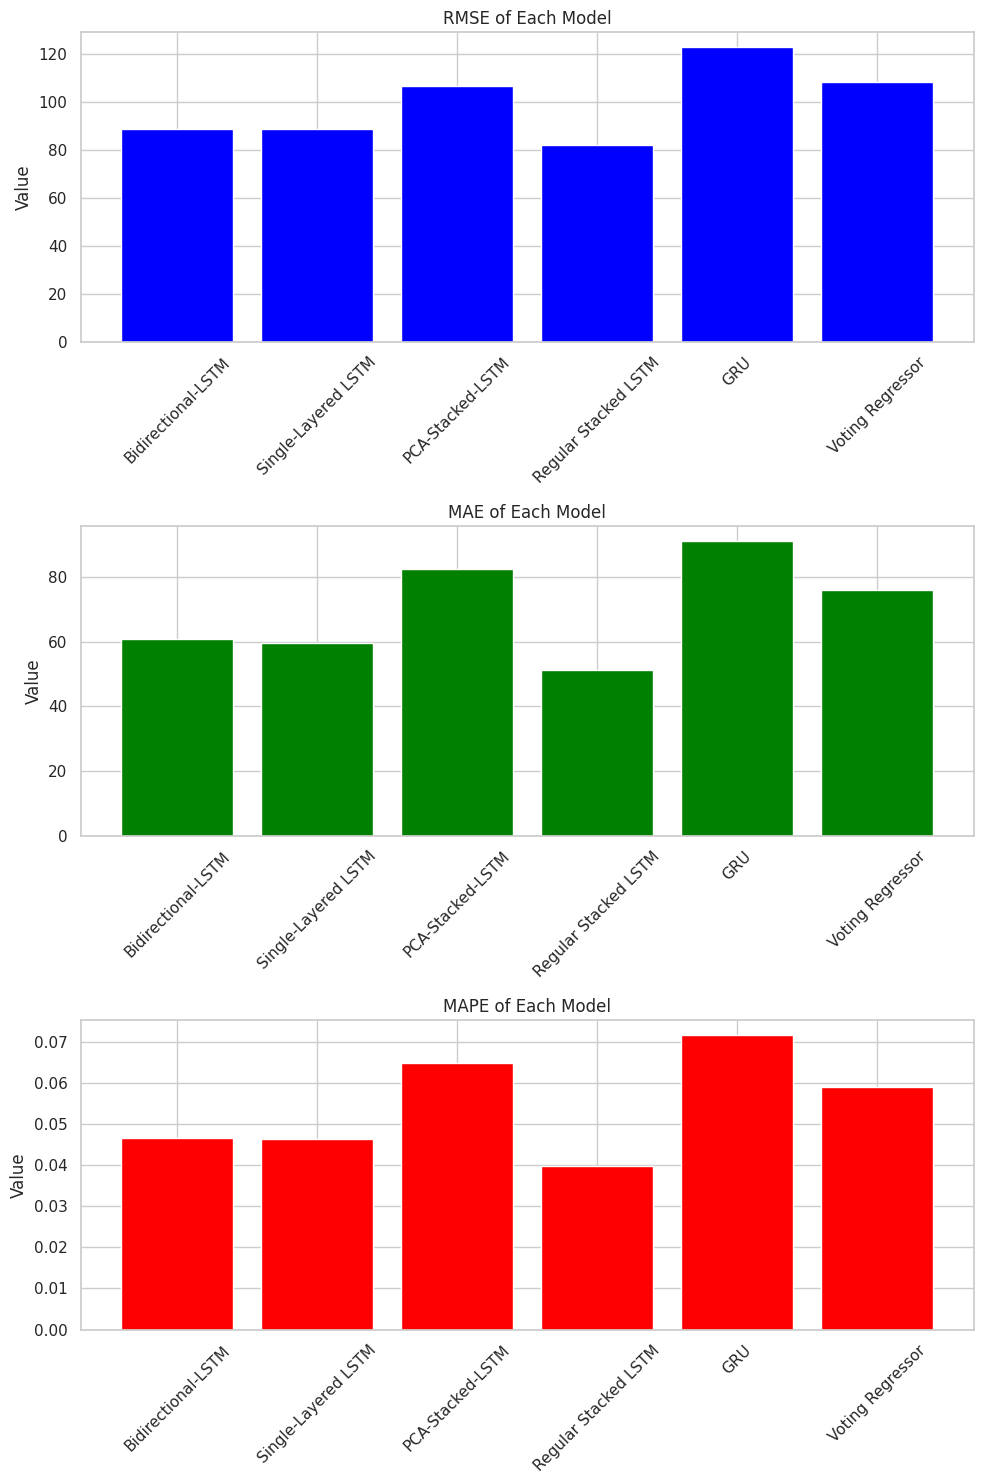

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Bidirectional-LSTM', 'Single-Layered LSTM', 'PCA-Stacked-LSTM', 'Regular Stacked LSTM', 'GRU', 'Voting Regressor']

# RMSE values
rmse_values = [real_rmse, real_rmse_single, real_rmse_stacked, real_rmse_rstacked, real_rmse_gru, rmse_vr]

# MAE values
mae_values = [real_mae, real_mae_single, real_mae_stacked, real_mae_rstacked, real_mae_gru, mae_vr]

# MAPE values
mape_values = [real_mape, real_mape_single, real_mape_stacked, real_mape_rstacked, real_mape_gru, mape_vr]

# Create subplots
fig, axs = plt.subplots(3, figsize=(10, 15))

# Create RMSE bar chart
axs[0].bar(models, rmse_values, color='blue')
axs[0].set_title('RMSE of Each Model')
axs[0].set_ylabel('Value')

# Create MAE bar chart
axs[1].bar(models, mae_values, color='green')
axs[1].set_title('MAE of Each Model')
axs[1].set_ylabel('Value')

# Create MAPE bar chart
axs[2].bar(models, mape_values, color='red')
axs[2].set_title('MAPE of Each Model')
axs[2].set_ylabel('Value')

# Rotate x-axis labels for readability
for ax in axs:
    plt.sca(ax)
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Testing with unseen data

In [ ]:
df_unseen = yf.download('ETH-USD', start='2010-01-01', end='2023-06-30')
#df = pd.read_csv("/Users/parkjs9416/Documents/Dissertation/Dissertation_project_code_and_data/Dataset/sp500_10year_data.csv")
df_unseen

[*********************100%%**********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-09   308.644989   329.451996   307.056000   320.884003   320.884003   
2017-11-10   320.670990   324.717987   294.541992   299.252991   299.252991   
2017-11-11   298.585999   319.453003   298.191986   314.681000   314.681000   
2017-11-12   314.690002   319.153015   298.513000   307.907990   307.907990   
2017-11-13   307.024994   328.415009   307.024994   316.716003   316.716003   
...                 ...          ...          ...          ...          ...   
2023-06-25  1875.849121  1929.079102  1870.850098  1900.506104  1900.506104   
2023-06-26  1900.050293  1905.360474  1840.215088  1859.432861  1859.432861   
2023-06-27  1859.346191  1911.311157  1856.838379  1889.703369  1889.703369   
2023-06-28  1889.906494  1890.208984  1822.102783  1827.971191  1827.971191   
2023-06-29  1828.059326  1876.530273  1828.059326  1852.227295  1852.227295   

                Volume  
Date                    
2017-11-09   893249984  
2017-11-10   885985984  
2017-11-11   842300992  
2017-11-12  1613479936  
2017-11-13  1041889984  
...                ...  
2023-06-25  6937581709  
2023-06-26  8619702292  
2023-06-27  7686042202  
2023-06-28  7135265016  
2023-06-29  5677228612  

[2059 rows x 6 columns]

In [ ]:
#Making the percentage changes in each day
df_unseen['Pct_change'] = df_unseen['Close'].pct_change()
# data['Pct_change'] = np.log(1+data['Pct_change'])
df_unseen['Pct_change'] = np.log1p(df_unseen['Pct_change'])
# Choose the desired time periods for the moving averages
short_period = 12  # Short-term EMA period
long_period = 26  # Long-term EMA period
signal_period = 9  # Signal line EMA period

# Calculate the short-term EMA
df_unseen['Short EMA'] = df_unseen['Close'].ewm(span=short_period, adjust=False).mean()

# Calculate the long-term EMA
df_unseen['Long EMA'] = df_unseen['Close'].ewm(span=long_period, adjust=False).mean()

# Calculate the MACD line
df_unseen['MACD'] = df_unseen['Short EMA'] - df_unseen['Long EMA']

# Calculate the signal line
df_unseen['Signal Line'] = df_unseen['MACD'].ewm(span=signal_period, adjust=False).mean()

# Calculate the MACD histogram
df_unseen['MACD Histogram'] = df_unseen['MACD'] - df_unseen['Signal Line']
# Choose the desired time period for the moving average and standard deviation
window = 20  # Number of Trading days in a month
num_std = 2
# 2 standard deviations above and below the middle band provides
#a range that encompasses a large portion of typical price movements

# Calculate the logarithmic returns
df_unseen['Log Returns'] = np.log(df_unseen['Close'] / df_unseen['Close'].shift(1))

# Calculate the volatility
df_unseen['Volatility'] = df_unseen['Log Returns'].rolling(window=20).std() * np.sqrt(252)

# Calculate the middle band (simple moving average)
df_unseen['Middle Band'] = df_unseen['Close'].rolling(window=window).mean()

# Calculate the standard deviation of the closing prices
df_unseen['Std Dev'] = df_unseen['Close'].rolling(window=window).std()

# Calculate the upper band and lower band
df_unseen['Upper Band'] = df_unseen['Middle Band'] + (num_std * df_unseen['Std Dev'])
df_unseen['Lower Band'] = df_unseen['Middle Band'] - (num_std * df_unseen['Std Dev'])

#Making Next day's close price column in each date.
df_unseen['Next_day'] = df_unseen['Close'].shift(-1)


# Display the updated DataFrame with the Bollinger Bands columns
df_unseen

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-09   308.644989   329.451996   307.056000   320.884003   320.884003   
2017-11-10   320.670990   324.717987   294.541992   299.252991   299.252991   
2017-11-11   298.585999   319.453003   298.191986   314.681000   314.681000   
2017-11-12   314.690002   319.153015   298.513000   307.907990   307.907990   
2017-11-13   307.024994   328.415009   307.024994   316.716003   316.716003   
...                 ...          ...          ...          ...          ...   
2023-06-25  1875.849121  1929.079102  1870.850098  1900.506104  1900.506104   
2023-06-26  1900.050293  1905.360474  1840.215088  1859.432861  1859.432861   
2023-06-27  1859.346191  1911.311157  1856.838379  1889.703369  1889.703369   
2023-06-28  1889.906494  1890.208984  1822.102783  1827.971191  1827.971191   
2023-06-29  1828.059326  1876.530273  1828.059326  1852.227295  1852.227295   

                Volume  Pct_change    Short EMA     Long EMA       MACD  \
Date                                                                      
2017-11-09   893249984         NaN   320.884003   320.884003   0.000000   
2017-11-10   885985984   -0.069790   317.556155   319.281706  -1.725551   
2017-11-11   842300992    0.050270   317.113823   318.940912  -1.827089   
2017-11-12  1613479936   -0.021758   315.697541   318.123659  -2.426118   
2017-11-13  1041889984    0.028204   315.854228   318.019388  -2.165161   
...                ...         ...          ...          ...        ...   
2023-06-25  6937581709    0.012947  1828.694681  1816.193733  12.500949   
2023-06-26  8619702292   -0.021849  1833.423632  1819.396631  14.027001   
2023-06-27  7686042202    0.016148  1842.082053  1824.604537  17.477516   
2023-06-28  7135265016   -0.033213  1839.911151  1824.853919  15.057232   
2023-06-29  5677228612    0.013182  1841.805943  1826.881577  14.924366   

            Signal Line  MACD Histogram  Log Returns  Volatility  Middle Band  \
Date                                                                            
2017-11-09     0.000000        0.000000          NaN         NaN          NaN   
2017-11-10    -0.345110       -1.380441    -0.069790         NaN          NaN   
2017-11-11    -0.641506       -1.185583     0.050270         NaN          NaN   
2017-11-12    -0.998428       -1.427690    -0.021758         NaN          NaN   
2017-11-13    -1.231775       -0.933386     0.028204         NaN          NaN   
...                 ...             ...          ...         ...          ...   
2023-06-25    -9.002319       21.503268     0.012947    0.413407  1791.721564   
2023-06-26    -4.396455       18.423456    -0.021849    0.397647  1790.468463   
2023-06-27    -0.021661       17.499176     0.016148    0.388132  1793.333832   
2023-06-28     2.994118       12.063114    -0.033213    0.406303  1792.417297   
2023-06-29     5.380167        9.544198     0.013182    0.409000  1793.017401   

              Std Dev   Upper Band   Lower Band     Next_day  
Date                                                          
2017-11-09        NaN          NaN          NaN   299.252991  
2017-11-10        NaN          NaN          NaN   314.681000  
2017-11-11        NaN          NaN          NaN   307.907990  
2017-11-12        NaN          NaN          NaN   316.716003  
2017-11-13        NaN          NaN          NaN   337.631012  
...               ...          ...          ...          ...  
2023-06-25  80.485011  1952.691585  1630.751543  1859.432861  
2023-06-26  79.148571  1948.765605  1632.171321  1889.703369  
2023-06-27  81.741206  1956.816244  1629.851419  1827.971191  
2023-06-28  81.217124  1954.851545  1629.983050  1852.227295  
2023-06-29  81.632243  1956.281887  1629.752915          NaN  

[2059 rows x 19 columns]

In [ ]:
df_unseen.isnull().sum()

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Pct_change         1
Short EMA          0
Long EMA           0
MACD               0
Signal Line        0
MACD Histogram     0
Log Returns        1
Volatility        20
Middle Band       19
Std Dev           19
Upper Band        19
Lower Band        19
Next_day           1
dtype: int64

In [ ]:
df_unseen = df_unseen.dropna()
df_unseen

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-11-29   473.281006   522.307007   425.071014   427.523010   427.523010   
2017-11-30   431.214996   465.497009   401.243011   447.114014   447.114014   
2017-12-01   445.209015   472.609009   428.312012   466.540009   466.540009   
2017-12-02   466.851013   476.239014   456.653015   463.449005   463.449005   
2017-12-03   463.704987   482.813995   451.851990   465.852997   465.852997   
...                 ...          ...          ...          ...          ...   
2023-06-24  1893.771973  1905.227417  1867.811523  1876.059692  1876.059692   
2023-06-25  1875.849121  1929.079102  1870.850098  1900.506104  1900.506104   
2023-06-26  1900.050293  1905.360474  1840.215088  1859.432861  1859.432861   
2023-06-27  1859.346191  1911.311157  1856.838379  1889.703369  1889.703369   
2023-06-28  1889.906494  1890.208984  1822.102783  1827.971191  1827.971191   

                Volume  Pct_change    Short EMA     Long EMA       MACD  \
Date                                                                      
2017-11-29  2675940096   -0.100880   423.561942   386.376159  37.185784   
2017-11-30  1903040000    0.044806   427.185338   390.875259  36.310079   
2017-12-01  1247879936    0.042530   433.239903   396.480055  36.759847   
2017-12-02   943649984   -0.006647   437.887457   401.440718  36.446739   
2017-12-03   990556992    0.005174   442.189848   406.211998  35.977849   
...                ...         ...          ...          ...        ...   
2023-06-24  5026191704   -0.008916  1815.638059  1809.448743   6.189316   
2023-06-25  6937581709    0.012947  1828.694681  1816.193733  12.500949   
2023-06-26  8619702292   -0.021849  1833.423632  1819.396631  14.027001   
2023-06-27  7686042202    0.016148  1842.082053  1824.604537  17.477516   
2023-06-28  7135265016   -0.033213  1839.911151  1824.853919  15.057232   

            Signal Line  MACD Histogram  Log Returns  Volatility  Middle Band  \
Date                                                                            
2017-11-29    28.226306        8.959477    -0.100880    0.846353   379.305402   
2017-11-30    29.843061        6.467018     0.044806    0.791214   386.698453   
2017-12-01    31.226418        5.533429     0.042530    0.787766   394.291403   
2017-12-02    32.270482        4.176256    -0.006647    0.778998   402.068454   
2017-12-03    33.011956        2.965894     0.005174    0.780244   409.525304   
...                 ...             ...          ...         ...          ...   
2023-06-24   -14.378136       20.567452    -0.008916    0.440599  1787.287677   
2023-06-25    -9.002319       21.503268     0.012947    0.413407  1791.721564   
2023-06-26    -4.396455       18.423456    -0.021849    0.397647  1790.468463   
2023-06-27    -0.021661       17.499176     0.016148    0.388132  1793.333832   
2023-06-28     2.994118       12.063114    -0.033213    0.406303  1792.417297   

              Std Dev   Upper Band   Lower Band     Next_day  
Date                                                          
2017-11-29  63.888660   507.082721   251.528082   447.114014  
2017-11-30  62.681287   512.061027   261.335879   466.540009  
2017-12-01  62.696023   519.683448   268.899358   463.449005  
2017-12-02  61.041859   524.152173   279.984735   465.852997  
2017-12-03  59.146294   527.817892   291.232715   470.204010  
...               ...          ...          ...          ...  
2023-06-24  76.521728  1940.331133  1634.244221  1900.506104  
2023-06-25  80.485011  1952.691585  1630.751543  1859.432861  
2023-06-26  79.148571  1948.765605  1632.171321  1889.703369  
2023-06-27  81.741206  1956.816244  1629.851419  1827.971191  
2023-06-28  81.217124  1954.851545  1629.983050  1852.227295  

[2038 rows x 19 columns]

In [ ]:
df_unseen.isnull().sum()

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Pct_change        0
Short EMA         0
Long EMA          0
MACD              0
Signal Line       0
MACD Histogram    0
Log Returns       0
Volatility        0
Middle Band       0
Std Dev           0
Upper Band        0
Lower Band        0
Next_day          0
dtype: int64

In [ ]:
df_unseen[["Close","Short EMA", "Long EMA","Middle Band", 'Upper Band', 'Lower Band']].plot(figsize=(10,7))
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Close Price trend with BollingerBand and the EMA")

Text(0.5, 1.0, 'Close Price trend with BollingerBand and the EMA')

### Preprocessing

In [ ]:
scaler = MinMaxScaler()

scale_cols = ['Open', 'High', 'Low', 'Pct_change', 'MACD','Signal Line','Volatility','Middle Band', 'Std Dev',
       'Upper Band', 'Lower Band', 'Next_day']

scaled_df_unseen = scaler.fit_transform(df_unseen[scale_cols])

scaled_df_unseen = pd.DataFrame(scaled_df_unseen, columns=scale_cols)

print(scaled_df_unseen)

          Open      High       Low  Pct_change      MACD  Signal Line  \
0     0.082315  0.090914  0.073835    0.572715  0.463765     0.465773   
1     0.073413  0.079094  0.068694    0.758190  0.462639     0.468150   
2     0.076374  0.080574  0.074534    0.755293  0.463217     0.470183   
3     0.080954  0.081329  0.080649    0.692684  0.462815     0.471717   
4     0.080288  0.082697  0.079613    0.707734  0.462212     0.472807   
...        ...       ...       ...         ...       ...          ...   
2033  0.382897  0.378641  0.385092    0.689796  0.423927     0.403158   
2034  0.379105  0.383603  0.385747    0.717630  0.432039     0.411058   
2035  0.384226  0.378668  0.379138    0.673331  0.434000     0.417828   
2036  0.375613  0.379907  0.382725    0.721706  0.438435     0.424257   
2037  0.382079  0.375516  0.375231    0.658863  0.435324     0.428690   

      Volatility  Middle Band   Std Dev  Upper Band  Lower Band  Next_day  
0       0.301020     0.063604  0.091845    0.08

In [ ]:
pca = PCA()
X_pca_unseen = pca.fit_transform(scaled_df_unseen)
# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

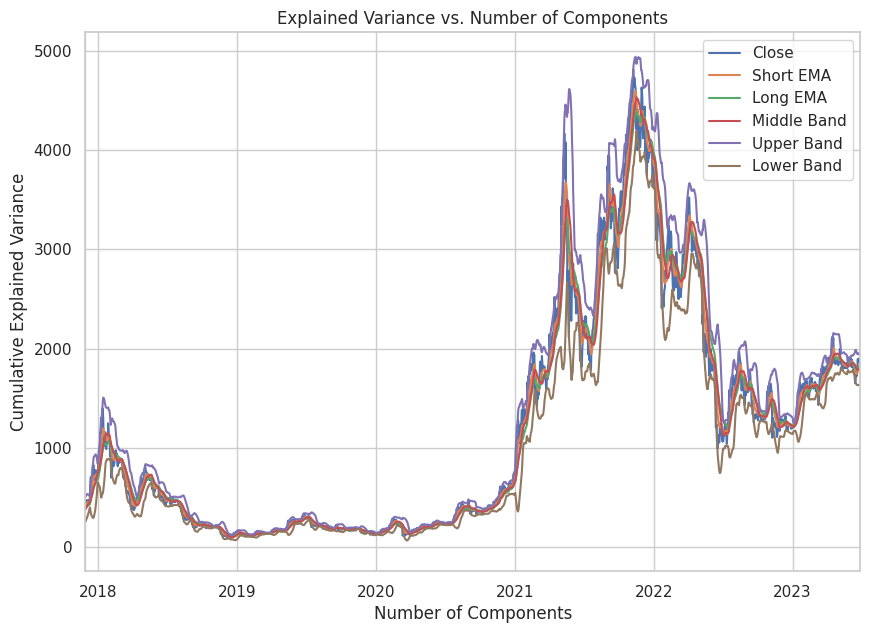

In [ ]:
# Plot the cumulative explained variance against the number of components
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
n_components = 6
pca = PCA(n_components=n_components)
X_pca_unseen = pca.fit_transform(scaled_df_unseen)

In [ ]:
# Access the principal components
principal_components = pca.components_

# Access the explained variance of each principal component
explained_variances = pca.explained_variance_ratio_

# Print the explained variance of each principal component
for i, explained_variance in enumerate(explained_variances):
    print(f"Principal Component {i+1}: {explained_variance:.4f}")



Principal Component 1: 0.8752
Principal Component 2: 0.0526
Principal Component 3: 0.0467
Principal Component 4: 0.0130
Principal Component 5: 0.0081
Principal Component 6: 0.0037


In [ ]:
X_pca_df_unseen = pd.DataFrame(X_pca_unseen)
X_pca_df_unseen

0         1         2         3         4         5
0    -0.433932 -0.018174  0.096919  0.001397  0.126064 -0.037489
1    -0.440286 -0.034736  0.079665  0.024765 -0.052230  0.008585
2    -0.434773 -0.037294  0.079096  0.024261 -0.049177  0.007919
3    -0.428794 -0.039846  0.074716  0.018694  0.011670 -0.005019
4    -0.427192 -0.040728  0.073822  0.016278 -0.002815  0.000240
...        ...       ...       ...       ...       ...       ...
2033  0.366307 -0.072711 -0.149450 -0.026708  0.003341 -0.037106
2034  0.366588 -0.086078 -0.149186 -0.013436 -0.021099 -0.026088
2035  0.366257 -0.094293 -0.151611 -0.014553  0.022745 -0.032031
2036  0.361874 -0.101189 -0.148529 -0.005394 -0.021901 -0.014959
2037  0.361478 -0.096507 -0.142568 -0.014253  0.039453 -0.024769

[2038 rows x 6 columns]

In [ ]:
# Split x_pca into input sequences and target values
lookback = 10 #Using past 10 days'daily data of below columns'data to predict the 'Next_day' price
data_columns = [ 'Open', 'High', 'Low', 'Pct_change', 'MACD','Signal Line','Volatility' ,'Middle Band', 'Std Dev',
                'Upper Band', 'Lower Band']
target_columns = ['Next_day']

X_unseen = []
y_unseen = []
for i in range(len(X_pca_unseen) - lookback):
    X_unseen.append(X_pca_unseen[i:i+lookback])
    y_unseen.append(df_unseen['Next_day'].values[i+lookback])

# Convert to numpy arrays
X_unseen = np.array(X_unseen)
y_unseen = np.array(y_unseen)

In [ ]:
# Scale the input sequences (X)
scaler = MinMaxScaler()
#X = scaler.fit_transform(X_pca.reshape(X.shape[0], -1))
X_unseen = scaler.fit_transform(X_unseen.reshape(X_unseen.shape[0], -1))

# Scale the target variable (y)
y_scaler = MinMaxScaler()
y_unseen = y_scaler.fit_transform(y_unseen.reshape(-1, 1))

In [ ]:
X_unseen = X_unseen.reshape((X_unseen.shape[0], lookback, -1))

In [ ]:
#Predict the KOSPI value
y_pred_unseen = stacked_lstm_model.predict(X_unseen)

In [ ]:
# Calculate error metrics
real_rmse_unseen = np.sqrt(mean_squared_error(y_unseen, y_pred_unseen))
real_mse_unseen = mean_squared_error(y_unseen, y_pred_unseen)
real_mae_unseen = mean_absolute_error(y_unseen, y_pred_unseen)
real_mape_unseen = mean_absolute_percentage_error(y_unseen, y_pred_unseen)

# Print each value
print("RMSE (unseen data):", real_rmse_unseen)
print("MSE (unseen data):", real_mse_unseen)
print("MAE (unseen data):", real_mae_unseen)
print("MAPE (unseen data):", real_mape_unseen)

RMSE (unseen data): 0.04116121393208793
MSE (unseen data): 0.0016942455323631094
MAE (unseen data): 0.037832282792844805
MAPE (unseen data): 81008787457.71107


In [ ]:
y_pred_unseen

array([[0.11439677],
       [0.11802706],
       [0.11118144],
       ...,
       [0.4256236 ],
       [0.42022166],
       [0.42226803]], dtype=float32)

In [ ]:
y_unseen

array([[0.07559844],
       [0.09112687],
       [0.11995542],
       ...,
       [0.38186959],
       [0.36881226],
       [0.37394281]])

In [ ]:
y_pred_unseen_original = y_scaler.inverse_transform(y_pred_unseen)
y_unseen_original = y_scaler.inverse_transform(y_unseen)

In [ ]:
y_pred_unseen_original

array([[ 625.15094],
       [ 642.31415],
       [ 609.9495 ],
       ...,
       [2096.5627 ],
       [2071.0234 ],
       [2080.6982 ]], dtype=float32)

In [ ]:
y_unseen_original

array([[ 441.7210083 ],
       [ 515.13598633],
       [ 651.43103027],
       ...,
       [1889.70336914],
       [1827.97119141],
       [1852.22729492]])

In [ ]:
# Calculate error metrics
real_rmse_unseen = np.sqrt(mean_squared_error(y_unseen_original, y_pred_unseen_original))
real_mae_unseen = mean_absolute_error(y_unseen_original, y_pred_unseen_original)
real_mape_unseen = mean_absolute_percentage_error(y_unseen_original, y_pred_unseen_original)

# Print each value
print("RMSE of PCA-STACKED LSTM with KOSPI:", real_rmse_unseen)
print("MAE of PCA-STACKED LSTM with KOSPI:", real_mae_unseen)
print("MAPE of PCA-STACKED LSTM with KOSPI:", real_mape_unseen)

RMSE of PCA-STACKED LSTM with KOSPI: 194.60112405264508
MAE of PCA-STACKED LSTM with KOSPI: 178.86267666562773
MAPE of PCA-STACKED LSTM with KOSPI: 0.4685011109709686


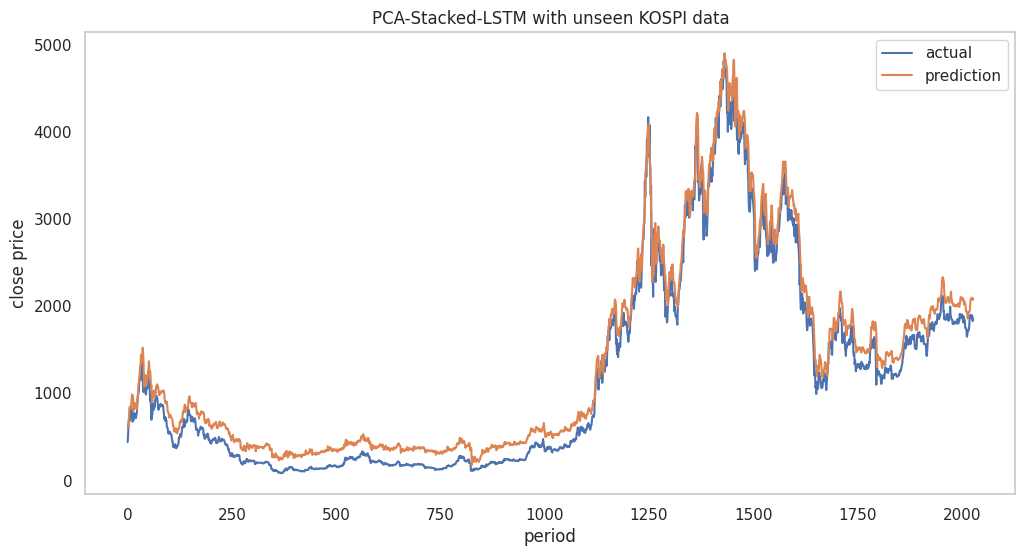

In [ ]:
#Real values of prediction
plt.figure(figsize=(12, 6))
plt.title('PCA-Stacked-LSTM with unseen KOSPI data')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(y_unseen_original, label='actual')
plt.plot(y_pred_unseen_original, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [ ]:
dates_unseen = df_unseen.index[lookback:].values

In [ ]:
df_unseen_reset = df_unseen.reset_index()
date_values_unseen = df_unseen_reset['Date'].iloc[train_index].values

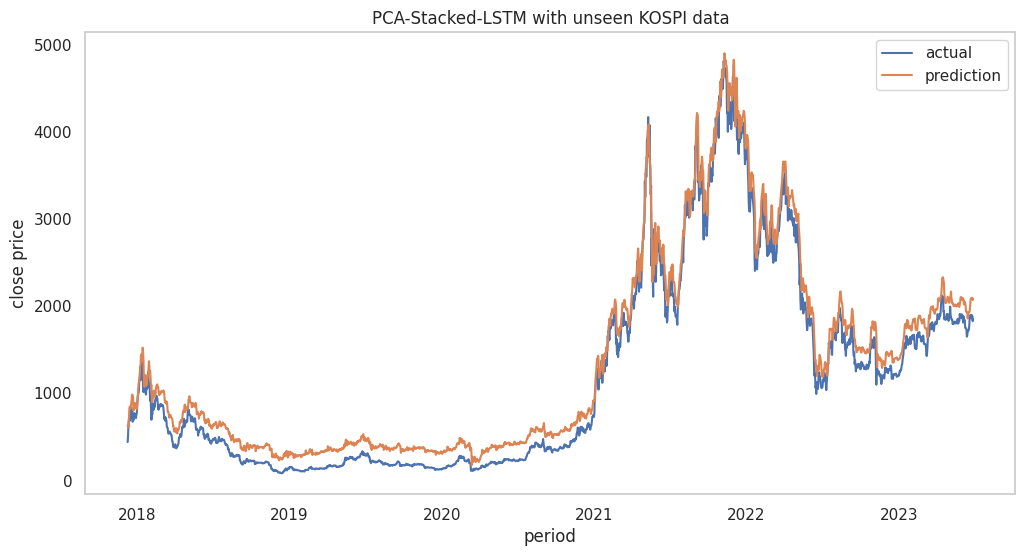

In [ ]:
#Real values of prediction
plt.figure(figsize=(12, 6))
plt.title('PCA-Stacked-LSTM with unseen KOSPI data')
plt.ylabel('close price')
plt.xlabel('period')
plt.plot(dates_unseen,y_unseen_original, label='actual')
plt.plot(dates_unseen,y_pred_unseen_original, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()